In [3]:
#from  IPython.displayIPython  import display


#import libaires
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import cython
from ripser import ripser, plot_dgms
import wfdb
import math
import pandas as pd




In [4]:
#Function to make the libary
#theDimension - what dimesnion should the perisistnce diagram go to
#numOfSec - the number of seconds should be used in the diagram
#ID - ID of the timeseries
#Path- the full path to the timeseries 

def setWindow(aStep,aListOfVals):
    theIndex = 0
    theLength = len(aListOfVals)
    theFinList = []
    for i in range(0,theLength):
        if(theIndex <len(aListOfVals)):
            theFinList.append(aListOfVals[theIndex])
            theIndex += aStep
        
    return(theFinList)   

def makePersistDiagram(theDimension,numOfSec,ID,Path,Step):
    print("starting")
    theX = []
    diagramss = ""
    x = ""
    theString = ""
    theFinData = []
    #get the timeseries to the number of seconds
    theSamp = wfdb.rdsamp(Path  + ID)
    theData = theSamp[0]
    for i in range(0,len(theSamp[0])):
    #print(theSamp[0][i][0])
        theX.append(theSamp[0][i][0])
    theData = theX[0:numOfSec]
   # print(theData)
    Delta = math.floor(Step/theDimension)
    theData = setWindow(Delta,theData)
   # print(theData)
    #theData = np.asarray(theData)
    #if even cuts :
    
    
    

        #setup set of vectors based off information given
    for i in range(0,len(theData)-theDimension):
        theFinData.append(theData[i:i+theDimension])
    theFinData = np.array(theFinData)
    print(theFinData.shape)
    print(theFinData)
    print("starting") 
        #use ripser and plot
    diagramss = ripser(theFinData,2)['dgms']
    plot_dgms(diagramss, show=True)
    x = open(ID + ".txt","w")
    theCSV = {'Dimension':[],"Birth":[],"Death":[]}
    
    for i in range(len(diagramss)):
        for j in range(len(diagramss[i])):
            theCSV["Dimension"].append(i)
            theCSV["Birth"].append(diagramss[i][j][0])
            theCSV["Death"].append(diagramss[i][j][1])
    theCSV = pd.DataFrame(theCSV)
    theCSV.to_csv(ID +'.csv')
    return(diagramss)

#rint(type(makePersistDiagram(50,3200,"A07872",'/home/dr-dunstan/Downloads/training2017/')))


#function to save from csv
def makeDiaFromCSV(dataType):
    #vairbles to deal with the csv and opening it 
    lineSkip = 0
    theCSV = open("200_set_of_Norm_AF_Rand.csv")
    
    #working the normal column of the csv
    if(dataType == "Normal"):
        #for each line in the csv
        for line in theCSV:
            #remove whitespace
            line = line.strip()
            #split up based off commas
            a,b,c,d = line.split(",")
            #if not at first line
            print("1")
            if(lineSkip != 0):
                #create plot diagram with ID at that line
                theSamp = wfdb.rdsamp("/Users/luke/Downloads/training2017/" + b)
                print("2")
                makePersistDiagram(50,3000,b,'/Users/luke/Downloads/training2017/',250)
            lineSkip += 1
#same with af & random
    elif(dataType == "AF"):
        for line in theCSV:
            line = line.strip()
            a,b,c,d = line.split(",")
            if(lineSkip != 0):
                theSamp = wfdb.rdsamp("/Users/luke/Downloads/training2017/" + c)
                theData = len(theSamp[0])
                makePersistDiagram(50,3000,c,'/Users/luke/Downloads/training2017/',250)
            lineSkip += 1
    elif(dataType == "Random"):
        for line in theCSV:
            line = line.strip()
            a,b,c,d = line.split(",")
            if(lineSkip != 0):
                theSamp = wfdb.rdsamp("/Users/luke/Downloads/training2017/"+ d)
                theData = len(theSamp[0])
                makePersistDiagram(50,3000,d,'/Users/luke/Downloads/training2017/',250)
            lineSkip += 1
    else:
        print("Datatype dosent exsit")
#

starting
(550, 50)
[[ 0.519  0.956  0.889 ...  0.013 -0.034 -0.042]
 [ 0.956  0.889  0.866 ... -0.034 -0.042 -0.048]
 [ 0.889  0.866  0.854 ... -0.042 -0.048 -0.049]
 ...
 [-0.08  -0.089 -0.1   ... -0.082 -0.08  -0.063]
 [-0.089 -0.1   -0.097 ... -0.08  -0.063  0.092]
 [-0.1   -0.097 -0.058 ... -0.063  0.092  1.067]]
starting


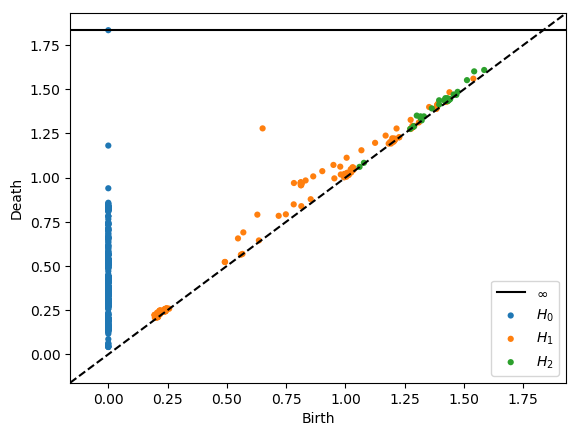

starting
(550, 50)
[[-0.188 -0.374 -0.39  ...  0.032  0.03   0.026]
 [-0.374 -0.39  -0.394 ...  0.03   0.026  0.029]
 [-0.39  -0.394 -0.4   ...  0.026  0.029  0.033]
 ...
 [ 0.084  0.118  0.104 ...  0.008  0.039  0.055]
 [ 0.118  0.104  0.066 ...  0.039  0.055  0.064]
 [ 0.104  0.066  0.051 ...  0.055  0.064  0.066]]
starting


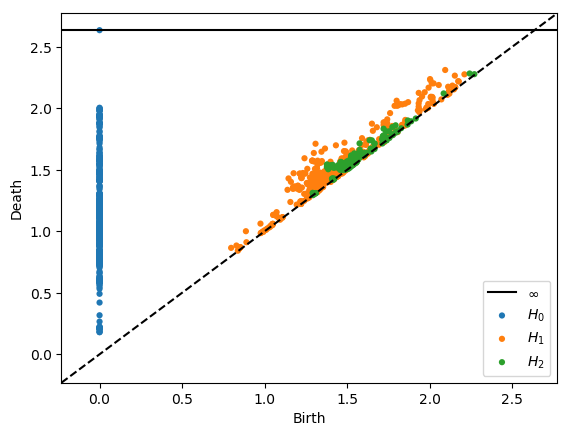

starting
(550, 50)
[[ 0.051  0.062 -0.024 ...  0.561  0.561  0.522]
 [ 0.062 -0.024 -0.135 ...  0.561  0.522  0.453]
 [-0.024 -0.135 -0.27  ...  0.522  0.453  0.392]
 ...
 [ 0.07   0.064  0.065 ...  0.086  0.061  0.015]
 [ 0.064  0.065  0.073 ...  0.061  0.015 -0.001]
 [ 0.065  0.073  0.071 ...  0.015 -0.001 -0.011]]
starting


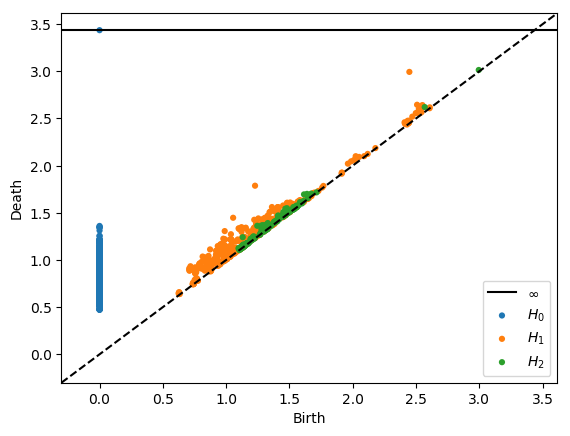

starting
(550, 50)
[[ 0.076  0.154  0.146 ... -0.041 -0.034 -0.072]
 [ 0.154  0.146  0.079 ... -0.034 -0.072 -0.113]
 [ 0.146  0.079  0.042 ... -0.072 -0.113 -0.141]
 ...
 [ 0.33   0.32   0.261 ...  0.314  0.337  0.35 ]
 [ 0.32   0.261  0.128 ...  0.337  0.35   0.355]
 [ 0.261  0.128  0.089 ...  0.35   0.355  0.359]]
starting


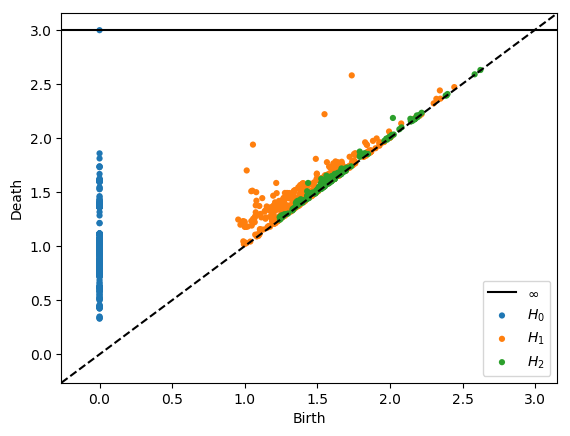

starting
(550, 50)
[[-0.39  -0.719 -0.651 ...  0.259  0.136  0.012]
 [-0.719 -0.651 -0.579 ...  0.136  0.012 -0.134]
 [-0.651 -0.579 -0.549 ...  0.012 -0.134 -0.171]
 ...
 [ 0.018  0.034  0.042 ...  0.126  0.032 -0.016]
 [ 0.034  0.042  0.05  ...  0.032 -0.016 -0.04 ]
 [ 0.042  0.05   0.064 ... -0.016 -0.04  -0.071]]
starting


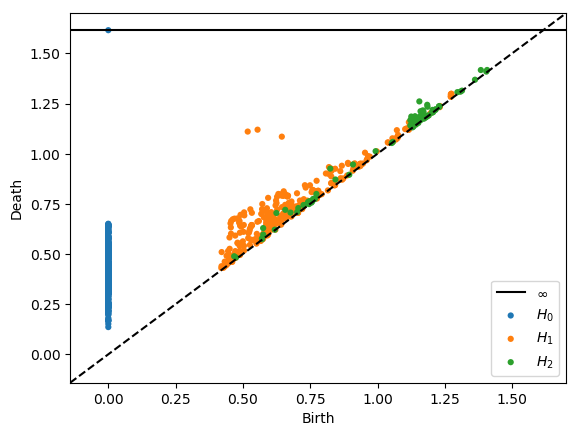

starting
(550, 50)
[[-1.697 -3.569 -3.654 ... -0.911 -0.338  0.276]
 [-3.569 -3.654 -3.343 ... -0.338  0.276  0.663]
 [-3.654 -3.343 -2.958 ...  0.276  0.663  0.772]
 ...
 [ 0.015  0.014  0.021 ... -0.141 -0.15  -0.142]
 [ 0.014  0.021  0.028 ... -0.15  -0.142 -0.142]
 [ 0.021  0.028  0.021 ... -0.142 -0.142 -0.149]]
starting


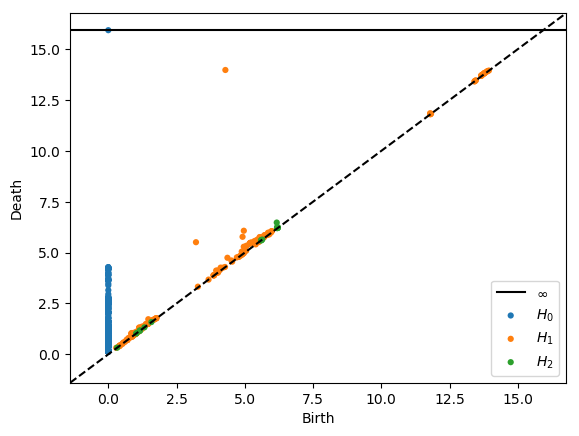

starting
(550, 50)
[[-0.281 -0.448 -0.108 ...  0.024  0.059  0.058]
 [-0.448 -0.108 -0.152 ...  0.059  0.058  0.046]
 [-0.108 -0.152 -0.419 ...  0.058  0.046  0.037]
 ...
 [-0.044 -0.017 -0.004 ...  0.025  0.055  0.12 ]
 [-0.017 -0.004 -0.002 ...  0.055  0.12   0.141]
 [-0.004 -0.002 -0.015 ...  0.12   0.141  0.179]]
starting


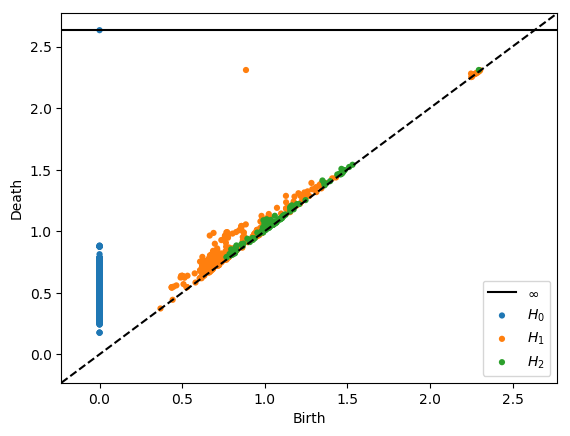

starting
(550, 50)
[[ 0.017  0.025  0.025 ... -0.023 -0.032 -0.04 ]
 [ 0.025  0.025  0.019 ... -0.032 -0.04  -0.033]
 [ 0.025  0.019  0.019 ... -0.04  -0.033  0.049]
 ...
 [-0.11  -0.1   -0.087 ...  0.068  0.069  0.072]
 [-0.1   -0.087 -0.048 ...  0.069  0.072  0.072]
 [-0.087 -0.048  0.    ...  0.072  0.072  0.065]]
starting


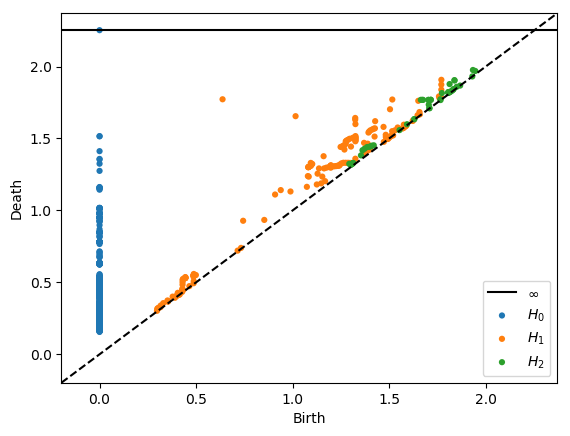

starting
(550, 50)
[[ 0.622  1.167  1.106 ... -0.196 -0.197 -0.12 ]
 [ 1.167  1.106  1.018 ... -0.197 -0.12  -0.098]
 [ 1.106  1.018  0.97  ... -0.12  -0.098 -0.265]
 ...
 [ 0.024  0.026  0.055 ... -0.003  0.03   0.01 ]
 [ 0.026  0.055  0.071 ...  0.03   0.01   0.009]
 [ 0.055  0.071  0.064 ...  0.01   0.009  0.027]]
starting


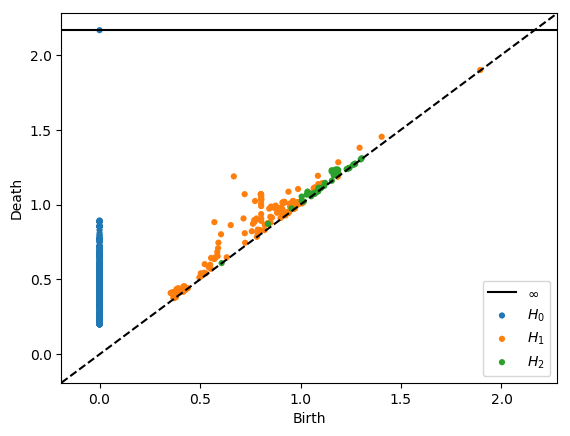

starting
(550, 50)
[[-0.093 -0.298 -0.406 ... -0.231 -0.117 -0.017]
 [-0.298 -0.406 -0.503 ... -0.117 -0.017  0.033]
 [-0.406 -0.503 -0.578 ... -0.017  0.033  0.044]
 ...
 [-0.446 -0.461 -0.465 ...  0.172  0.166  0.172]
 [-0.461 -0.465 -0.471 ...  0.166  0.172  0.185]
 [-0.465 -0.471 -0.464 ...  0.172  0.185  0.193]]
starting


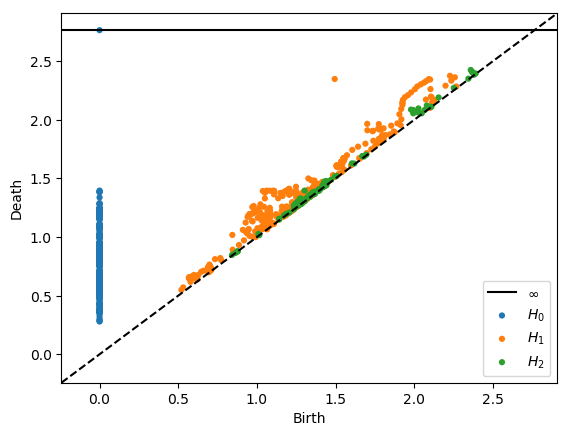

starting
(550, 50)
[[-0.023 -0.062 -0.073 ... -0.027 -0.018  0.007]
 [-0.062 -0.073 -0.078 ... -0.018  0.007  0.081]
 [-0.073 -0.078 -0.046 ...  0.007  0.081  0.104]
 ...
 [-0.073 -0.085 -0.093 ...  0.605  0.066  0.022]
 [-0.085 -0.093 -0.088 ...  0.066  0.022  0.019]
 [-0.093 -0.088 -0.085 ...  0.022  0.019  0.03 ]]
starting


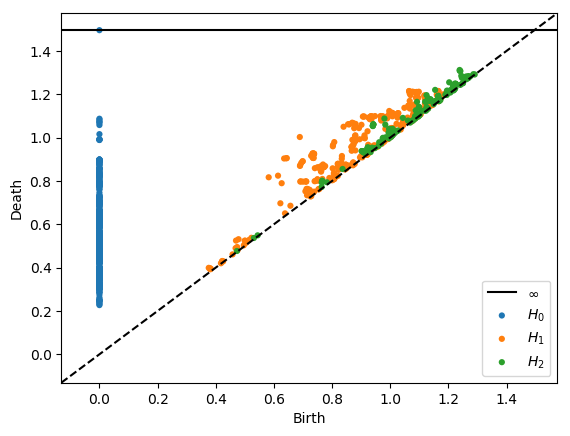

starting
(550, 50)
[[ 0.235  0.405  0.373 ... -0.053 -0.06  -0.06 ]
 [ 0.405  0.373  0.42  ... -0.06  -0.06  -0.059]
 [ 0.373  0.42   0.459 ... -0.06  -0.059 -0.056]
 ...
 [-0.083 -0.079 -0.092 ...  0.102  0.137  0.201]
 [-0.079 -0.092 -0.108 ...  0.137  0.201  0.273]
 [-0.092 -0.108 -0.116 ...  0.201  0.273  0.346]]
starting


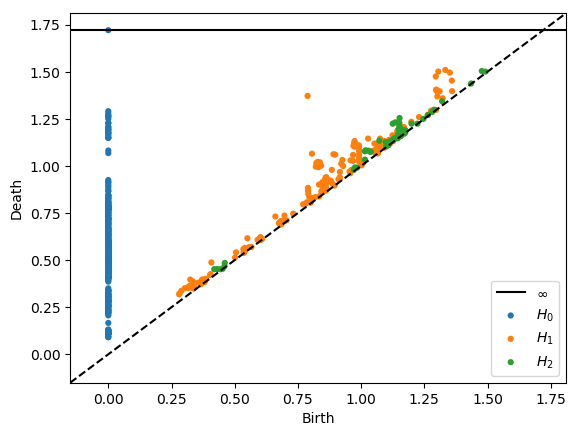

starting
(550, 50)
[[ 0.314  0.79   0.947 ...  0.043  0.081  0.45 ]
 [ 0.79   0.947  0.911 ...  0.081  0.45   0.731]
 [ 0.947  0.911  1.008 ...  0.45   0.731  0.212]
 ...
 [ 0.397  0.701 -0.268 ...  0.161  0.075  0.03 ]
 [ 0.701 -0.268 -0.34  ...  0.075  0.03  -0.021]
 [-0.268 -0.34  -0.247 ...  0.03  -0.021 -0.179]]
starting


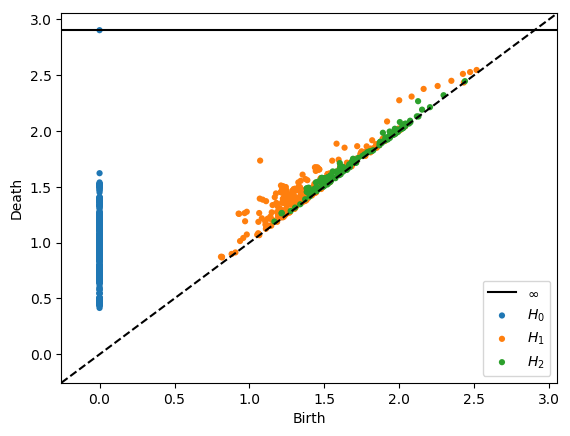

starting
(550, 50)
[[-0.001 -0.01  -0.017 ...  0.026  0.018  0.007]
 [-0.01  -0.017 -0.036 ...  0.018  0.007 -0.011]
 [-0.017 -0.036 -0.053 ...  0.007 -0.011 -0.034]
 ...
 [-0.023 -0.014 -0.005 ...  0.048  0.033  0.042]
 [-0.014 -0.005  0.025 ...  0.033  0.042  0.045]
 [-0.005  0.025  0.039 ...  0.042  0.045  0.031]]
starting


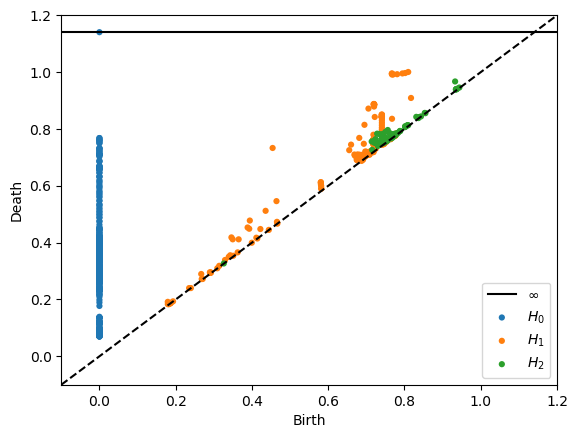

starting
(550, 50)
[[-0.123 -0.174 -0.145 ...  0.048  0.056 -0.019]
 [-0.174 -0.145 -0.123 ...  0.056 -0.019 -0.076]
 [-0.145 -0.123 -0.097 ... -0.019 -0.076 -0.107]
 ...
 [-0.082 -0.091 -0.096 ... -0.011 -0.04  -0.066]
 [-0.091 -0.096 -0.067 ... -0.04  -0.066 -0.072]
 [-0.096 -0.067 -0.066 ... -0.066 -0.072 -0.073]]
starting


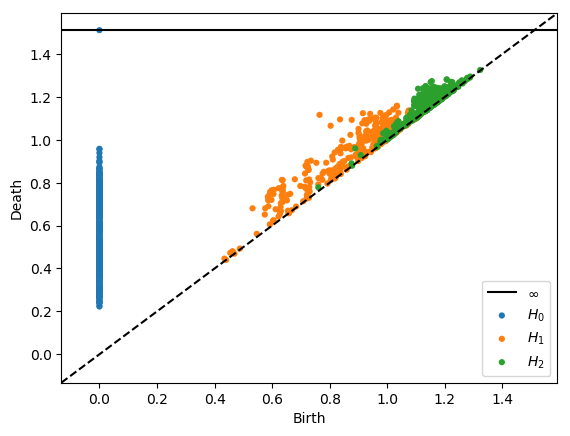

starting
(550, 50)
[[-8.850e-01 -1.617e+00 -1.696e+00 ...  3.000e-03 -2.070e-01 -2.800e-02]
 [-1.617e+00 -1.696e+00 -2.351e+00 ... -2.070e-01 -2.800e-02  2.700e-01]
 [-1.696e+00 -2.351e+00 -2.546e+00 ... -2.800e-02  2.700e-01  4.380e-01]
 ...
 [-1.790e-01 -2.440e-01 -2.280e-01 ...  4.550e-01  4.060e-01 -2.000e-03]
 [-2.440e-01 -2.280e-01 -1.790e-01 ...  4.060e-01 -2.000e-03 -3.800e-02]
 [-2.280e-01 -1.790e-01 -1.610e-01 ... -2.000e-03 -3.800e-02 -3.200e-02]]
starting


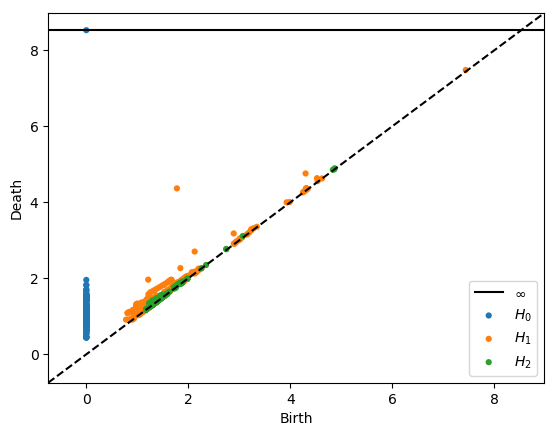

starting
(550, 50)
[[ 0.074  0.115  0.087 ... -0.172 -0.125 -0.083]
 [ 0.115  0.087  0.    ... -0.125 -0.083 -0.079]
 [ 0.087  0.    -0.095 ... -0.083 -0.079 -0.072]
 ...
 [-0.172 -0.129 -0.11  ... -0.088 -0.077 -0.068]
 [-0.129 -0.11  -0.092 ... -0.077 -0.068 -0.029]
 [-0.11  -0.092 -0.053 ... -0.068 -0.029  0.015]]
starting


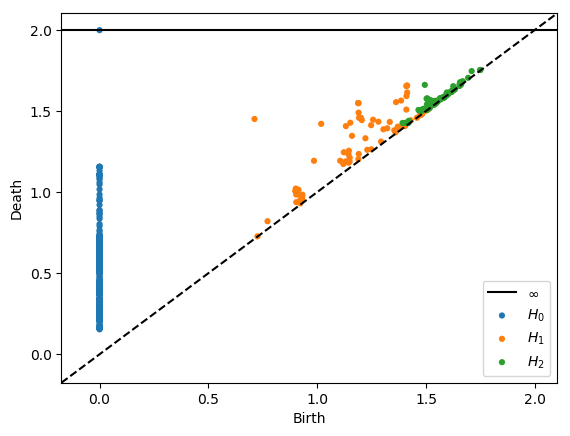

starting
(550, 50)
[[ 0.485  0.913  0.949 ...  0.445  0.591  0.013]
 [ 0.913  0.949  0.993 ...  0.591  0.013 -0.162]
 [ 0.949  0.993  1.02  ...  0.013 -0.162 -0.186]
 ...
 [ 0.087  0.131  0.139 ...  0.06   0.12   0.173]
 [ 0.131  0.139  0.132 ...  0.12   0.173  0.204]
 [ 0.139  0.132  0.077 ...  0.173  0.204  0.231]]
starting


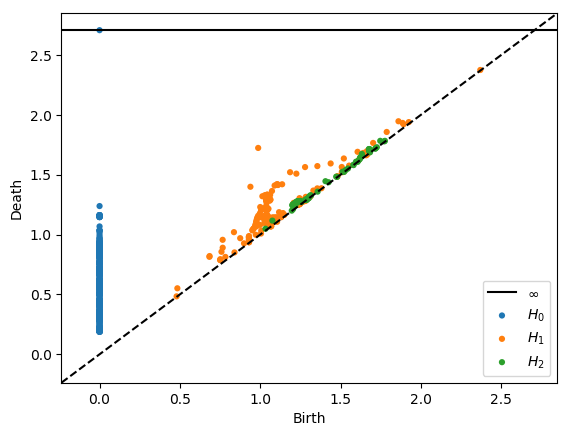

starting
(550, 50)
[[-0.102 -0.173 -0.183 ... -0.102 -0.101 -0.114]
 [-0.173 -0.183 -0.187 ... -0.101 -0.114 -0.122]
 [-0.183 -0.187 -0.191 ... -0.114 -0.122 -0.122]
 ...
 [ 0.018  0.235  0.064 ... -0.03   0.208  0.311]
 [ 0.235  0.064 -0.252 ...  0.208  0.311 -0.217]
 [ 0.064 -0.252 -0.084 ...  0.311 -0.217 -0.119]]
starting


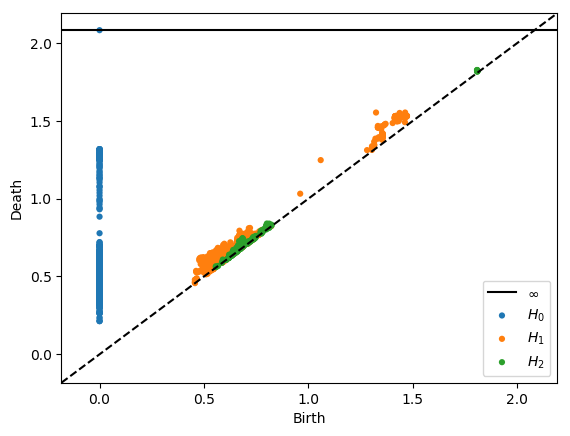

starting
(550, 50)
[[-0.691 -1.23  -1.125 ...  0.112  0.121  0.279]
 [-1.23  -1.125 -1.1   ...  0.121  0.279  0.782]
 [-1.125 -1.1   -0.906 ...  0.279  0.782  0.618]
 ...
 [-0.006  0.002  0.01  ...  0.     0.04   0.047]
 [ 0.002  0.01   0.02  ...  0.04   0.047  0.015]
 [ 0.01   0.02   0.128 ...  0.047  0.015 -0.012]]
starting


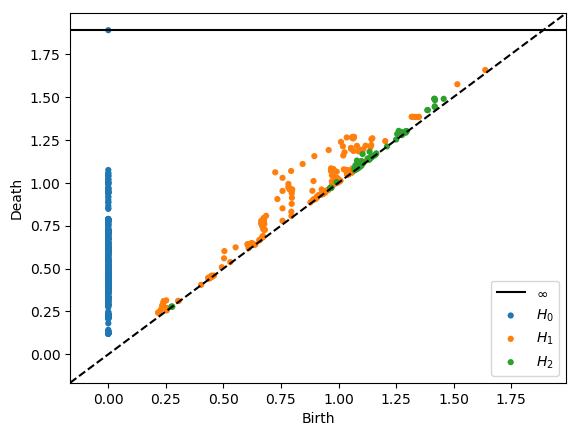

starting
(550, 50)
[[ 0.03   0.077  0.074 ... -0.031 -0.025 -0.026]
 [ 0.077  0.074  0.052 ... -0.025 -0.026 -0.03 ]
 [ 0.074  0.052  0.041 ... -0.026 -0.03  -0.042]
 ...
 [ 0.048  0.006 -0.033 ...  0.053  0.055  0.056]
 [ 0.006 -0.033 -0.062 ...  0.055  0.056  0.058]
 [-0.033 -0.062 -0.066 ...  0.056  0.058  0.062]]
starting


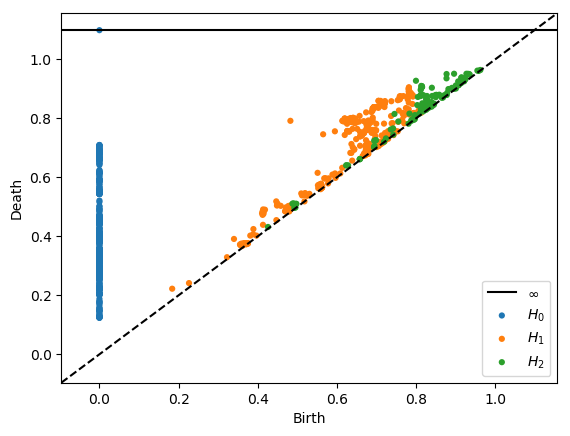

starting
(550, 50)
[[ 2.152  3.85   3.054 ...  0.895  1.834  3.333]
 [ 3.85   3.054  2.617 ...  1.834  3.333  4.158]
 [ 3.054  2.617  2.536 ...  3.333  4.158  4.438]
 ...
 [ 0.026  0.025  0.027 ... -0.01  -0.01  -0.016]
 [ 0.025  0.027  0.034 ... -0.01  -0.016  0.02 ]
 [ 0.027  0.034  0.039 ... -0.016  0.02   0.361]]
starting


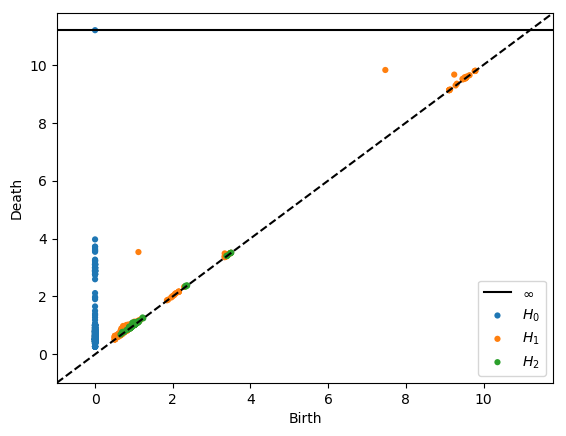

starting
(550, 50)
[[ 0.001  0.199  0.566 ...  0.009  0.025  0.042]
 [ 0.199  0.566  0.183 ...  0.025  0.042  0.033]
 [ 0.566  0.183 -0.04  ...  0.042  0.033  0.023]
 ...
 [-0.032 -0.011  0.004 ...  0.005 -0.023 -0.018]
 [-0.011  0.004  0.026 ... -0.023 -0.018 -0.006]
 [ 0.004  0.026  0.069 ... -0.018 -0.006 -0.022]]
starting


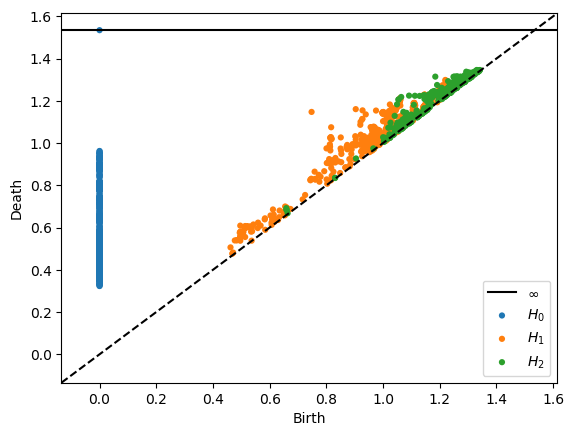

starting
(550, 50)
[[-0.136 -0.257 -0.264 ... -0.062 -0.059 -0.053]
 [-0.257 -0.264 -0.25  ... -0.059 -0.053 -0.047]
 [-0.264 -0.25  -0.223 ... -0.053 -0.047 -0.039]
 ...
 [-0.069 -0.059 -0.054 ... -0.299 -0.216 -0.089]
 [-0.059 -0.054 -0.049 ... -0.216 -0.089 -0.046]
 [-0.054 -0.049 -0.043 ... -0.089 -0.046 -0.02 ]]
starting


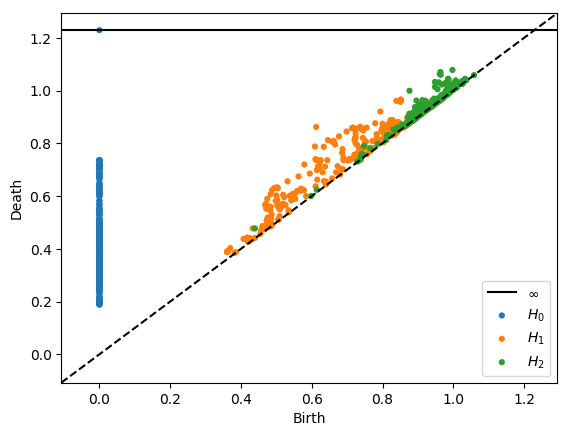

starting
(550, 50)
[[ 0.017  0.025  0.028 ... -0.014 -0.019 -0.037]
 [ 0.025  0.028  0.022 ... -0.019 -0.037 -0.038]
 [ 0.028  0.022  0.022 ... -0.037 -0.038 -0.001]
 ...
 [-0.023 -0.025 -0.022 ... -0.01  -0.007  0.   ]
 [-0.025 -0.022 -0.025 ... -0.007  0.     0.   ]
 [-0.022 -0.025 -0.025 ...  0.     0.    -0.018]]
starting


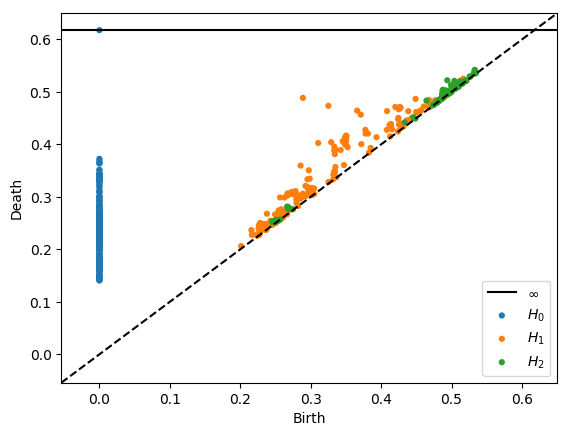

starting
(550, 50)
[[ 0.07   0.098  0.066 ...  0.052  0.043  0.025]
 [ 0.098  0.066  0.033 ...  0.043  0.025  0.004]
 [ 0.066  0.033  0.014 ...  0.025  0.004  0.004]
 ...
 [ 0.011  0.05   0.067 ...  0.734 -0.277 -0.089]
 [ 0.05   0.067  0.318 ... -0.277 -0.089 -0.081]
 [ 0.067  0.318  0.725 ... -0.089 -0.081 -0.078]]
starting


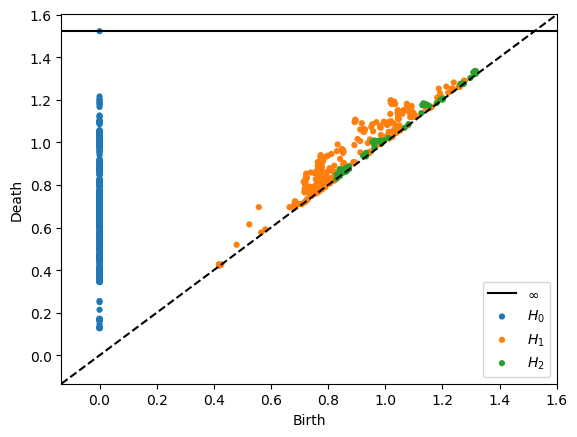

starting
(550, 50)
[[ 0.13   0.193  0.198 ...  0.146  0.203  0.211]
 [ 0.193  0.198  0.18  ...  0.203  0.211  0.189]
 [ 0.198  0.18   0.167 ...  0.211  0.189  0.096]
 ...
 [ 0.067  0.108  0.162 ...  0.009  0.007  0.049]
 [ 0.108  0.162  0.148 ...  0.007  0.049  0.037]
 [ 0.162  0.148  0.1   ...  0.049  0.037 -0.02 ]]
starting


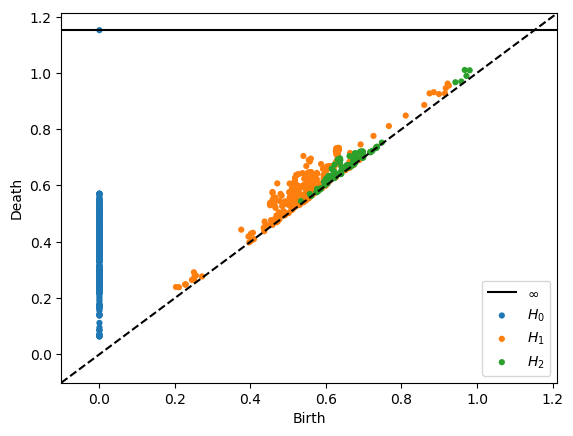

starting
(550, 50)
[[ 0.053  0.069  0.073 ...  0.011  0.027  0.036]
 [ 0.069  0.073  0.062 ...  0.027  0.036  0.033]
 [ 0.073  0.062  0.051 ...  0.036  0.033  0.022]
 ...
 [-0.024 -0.015 -0.005 ...  0.006  0.016  0.019]
 [-0.015 -0.005  0.034 ...  0.016  0.019  0.025]
 [-0.005  0.034  0.028 ...  0.019  0.025  0.057]]
starting


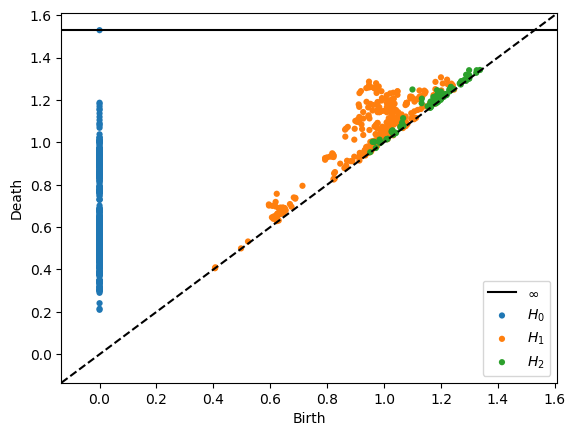

starting
(550, 50)
[[ 0.012 -0.019 -0.012 ... -0.056 -0.056 -0.053]
 [-0.019 -0.012 -0.065 ... -0.056 -0.053 -0.023]
 [-0.012 -0.065 -0.045 ... -0.053 -0.023  0.432]
 ...
 [-0.032  0.007  0.    ... -0.016 -0.005  0.08 ]
 [ 0.007  0.    -0.008 ... -0.005  0.08   0.182]
 [ 0.    -0.008  0.006 ...  0.08   0.182  0.222]]
starting


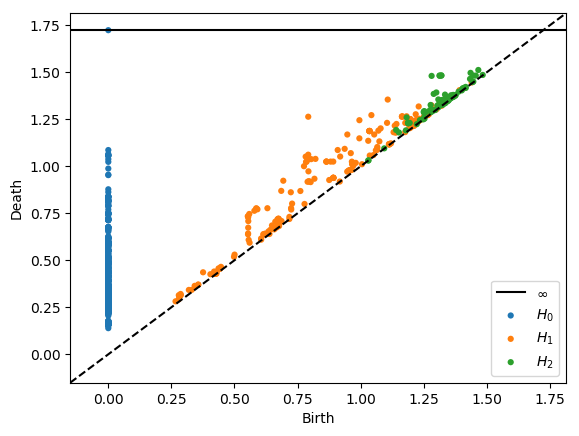

starting
(550, 50)
[[ 0.039  0.423  0.303 ... -0.103 -0.038  0.031]
 [ 0.423  0.303 -0.242 ... -0.038  0.031  0.14 ]
 [ 0.303 -0.242 -0.32  ...  0.031  0.14   0.204]
 ...
 [ 0.     0.02   0.344 ... -0.013  0.043  0.095]
 [ 0.02   0.344  0.872 ...  0.043  0.095  0.124]
 [ 0.344  0.872  0.207 ...  0.095  0.124  0.129]]
starting


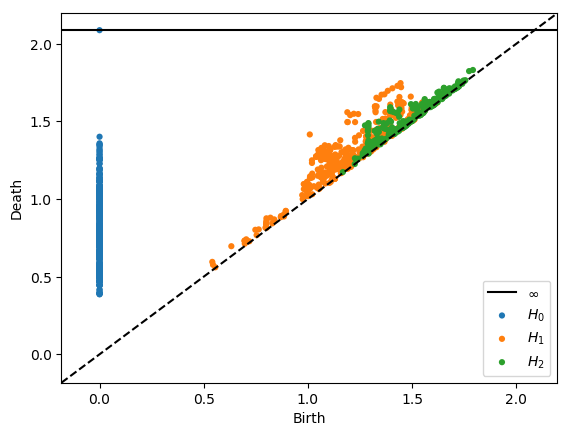

starting
(550, 50)
[[ 0.222  0.319  0.257 ...  0.043  0.025  0.011]
 [ 0.319  0.257  0.224 ...  0.025  0.011 -0.003]
 [ 0.257  0.224  0.196 ...  0.011 -0.003 -0.009]
 ...
 [-0.012 -0.011  0.008 ... -0.079 -0.057 -0.032]
 [-0.011  0.008  0.018 ... -0.057 -0.032 -0.009]
 [ 0.008  0.018  0.021 ... -0.032 -0.009  0.023]]
starting


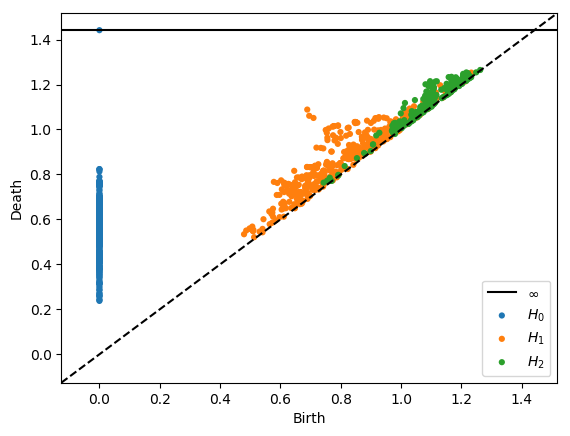

starting
(550, 50)
[[-0.375 -0.688 -0.564 ... -0.062 -0.085 -0.105]
 [-0.688 -0.564 -0.486 ... -0.085 -0.105 -0.037]
 [-0.564 -0.486 -0.449 ... -0.105 -0.037  0.406]
 ...
 [-0.008  0.669  0.473 ...  0.145  0.193  0.176]
 [ 0.669  0.473  0.036 ...  0.193  0.176  0.08 ]
 [ 0.473  0.036 -0.008 ...  0.176  0.08   0.024]]
starting


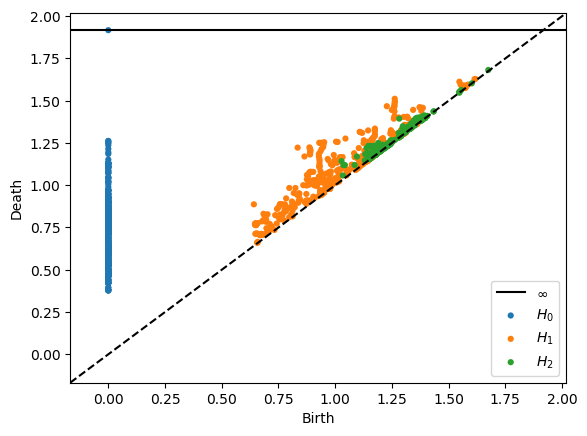

starting
(550, 50)
[[ 0.384  0.658  0.679 ... -0.39  -0.199 -0.121]
 [ 0.658  0.679  0.688 ... -0.199 -0.121 -0.189]
 [ 0.679  0.688  0.611 ... -0.121 -0.189 -0.269]
 ...
 [-0.731 -0.908 -0.883 ... -0.027 -0.028 -0.002]
 [-0.908 -0.883 -0.777 ... -0.028 -0.002  0.007]
 [-0.883 -0.777 -0.65  ... -0.002  0.007 -0.01 ]]
starting


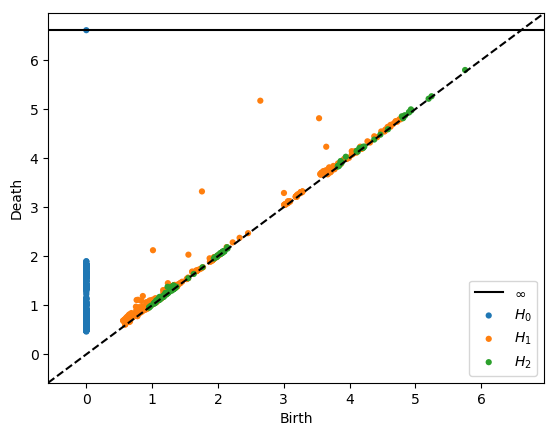

starting
(550, 50)
[[ 0.155  0.269  0.276 ...  0.064  0.081  0.087]
 [ 0.269  0.276  0.277 ...  0.081  0.087  0.096]
 [ 0.276  0.277  0.272 ...  0.087  0.096  0.108]
 ...
 [-0.035 -0.051 -0.061 ... -0.012  0.023  0.038]
 [-0.051 -0.061 -0.063 ...  0.023  0.038  0.056]
 [-0.061 -0.063 -0.051 ...  0.038  0.056  0.113]]
starting


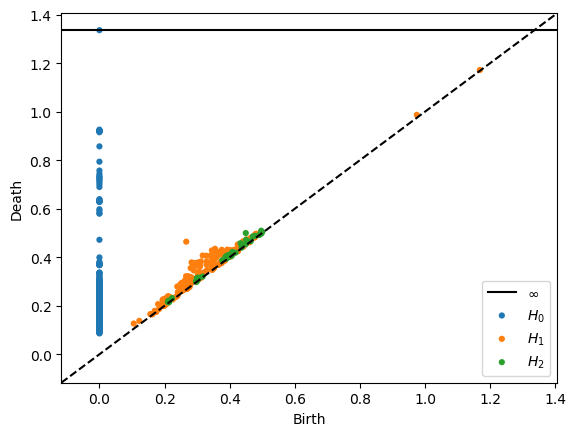

starting
(550, 50)
[[ 0.122  0.224  0.229 ... -0.085 -0.07  -0.053]
 [ 0.224  0.229  0.168 ... -0.07  -0.053 -0.029]
 [ 0.229  0.168  0.103 ... -0.053 -0.029 -0.004]
 ...
 [ 0.023  0.017  0.012 ...  0.131  0.149  0.156]
 [ 0.017  0.012  0.008 ...  0.149  0.156  0.155]
 [ 0.012  0.008  0.004 ...  0.156  0.155  0.145]]
starting


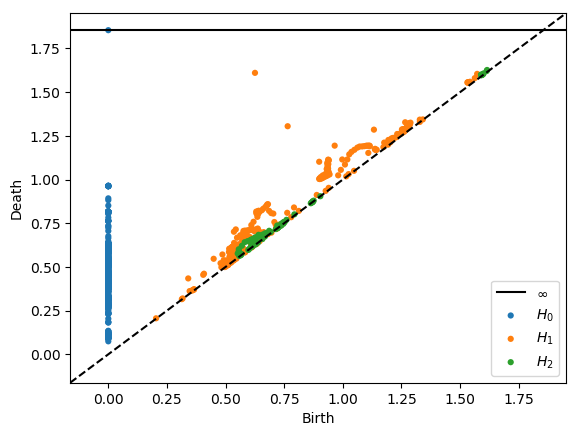

starting
(550, 50)
[[ 0.515  0.955  0.902 ... -0.02  -0.019 -0.019]
 [ 0.955  0.902  0.874 ... -0.019 -0.019 -0.019]
 [ 0.902  0.874  0.848 ... -0.019 -0.019 -0.002]
 ...
 [-0.036 -0.031  0.281 ... -0.12  -0.051  0.029]
 [-0.031  0.281  0.23  ... -0.051  0.029 -0.003]
 [ 0.281  0.23   0.224 ...  0.029 -0.003 -0.008]]
starting


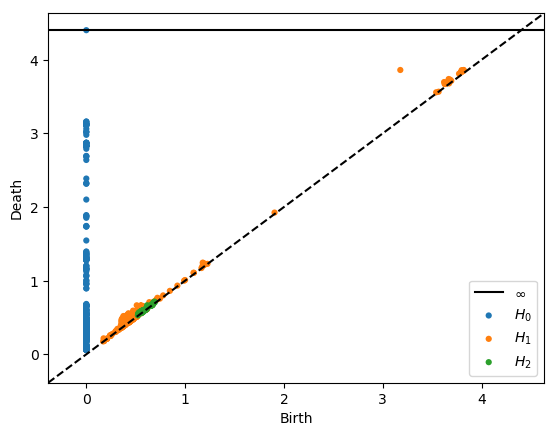

starting
(550, 50)
[[-0.001 -0.008 -0.016 ...  0.01  -0.052 -0.066]
 [-0.008 -0.016 -0.084 ... -0.052 -0.066 -0.076]
 [-0.016 -0.084 -0.149 ... -0.066 -0.076 -0.077]
 ...
 [-0.037 -0.029 -0.029 ... -0.018 -0.029 -0.041]
 [-0.029 -0.029 -0.024 ... -0.029 -0.041 -0.048]
 [-0.029 -0.024 -0.019 ... -0.041 -0.048 -0.05 ]]
starting


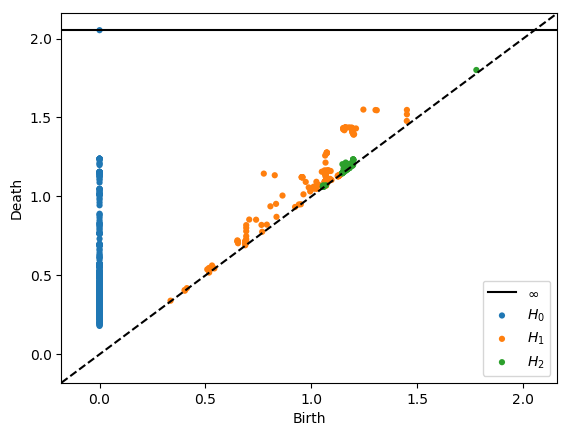

starting
(550, 50)
[[-0.022 -0.039 -0.011 ...  0.022  0.033  0.046]
 [-0.039 -0.011  0.008 ...  0.033  0.046  0.053]
 [-0.011  0.008  0.024 ...  0.046  0.053  0.055]
 ...
 [-0.036 -0.021 -0.015 ...  0.037  0.036  0.027]
 [-0.021 -0.015 -0.004 ...  0.036  0.027  0.   ]
 [-0.015 -0.004  0.287 ...  0.027  0.    -0.016]]
starting


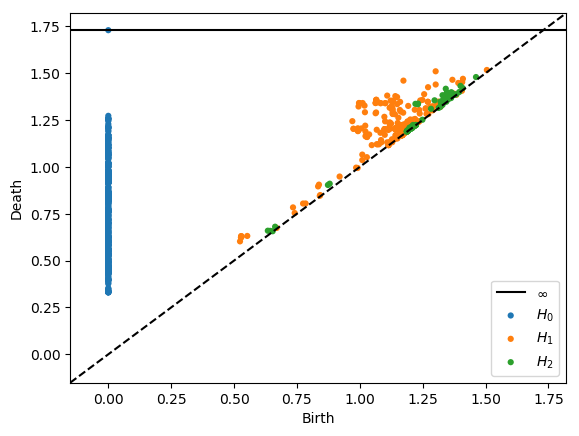

starting
(550, 50)
[[-0.049 -0.062 -0.042 ...  0.018  0.045  0.047]
 [-0.062 -0.042 -0.032 ...  0.045  0.047  0.049]
 [-0.042 -0.032 -0.03  ...  0.047  0.049  0.044]
 ...
 [-0.013  0.022 -0.165 ... -0.045 -0.067 -0.117]
 [ 0.022 -0.165 -0.749 ... -0.067 -0.117 -0.163]
 [-0.165 -0.749 -0.384 ... -0.117 -0.163 -0.177]]
starting


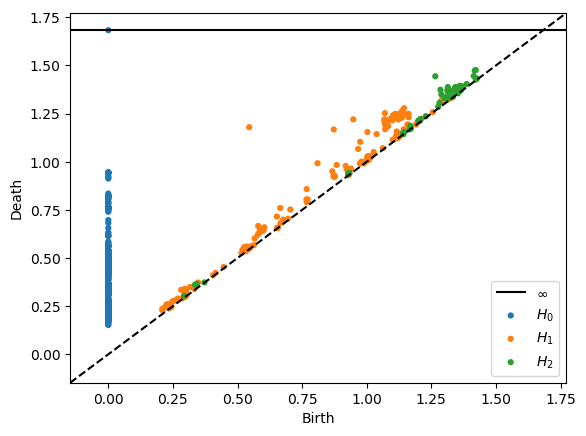

starting
(550, 50)
[[ 0.661  1.236  1.166 ... -0.22  -0.216 -0.203]
 [ 1.236  1.166  1.119 ... -0.216 -0.203 -0.204]
 [ 1.166  1.119  1.095 ... -0.203 -0.204 -0.231]
 ...
 [ 0.02   0.     0.038 ...  0.194  0.243  0.307]
 [ 0.     0.038  0.073 ...  0.243  0.307  0.322]
 [ 0.038  0.073  0.144 ...  0.307  0.322  0.261]]
starting


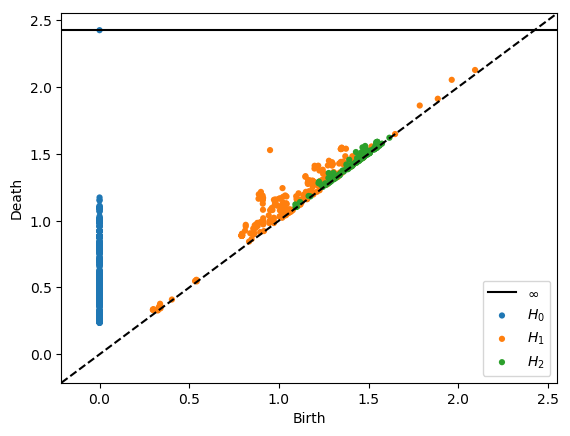

starting
(550, 50)
[[ 0.223  0.346  0.292 ... -0.116 -0.164 -0.206]
 [ 0.346  0.292  0.279 ... -0.164 -0.206 -0.213]
 [ 0.292  0.279  0.298 ... -0.206 -0.213 -0.189]
 ...
 [ 0.048  0.057  0.071 ...  0.101  0.097  0.098]
 [ 0.057  0.071  0.087 ...  0.097  0.098  0.094]
 [ 0.071  0.087  0.093 ...  0.098  0.094  0.089]]
starting


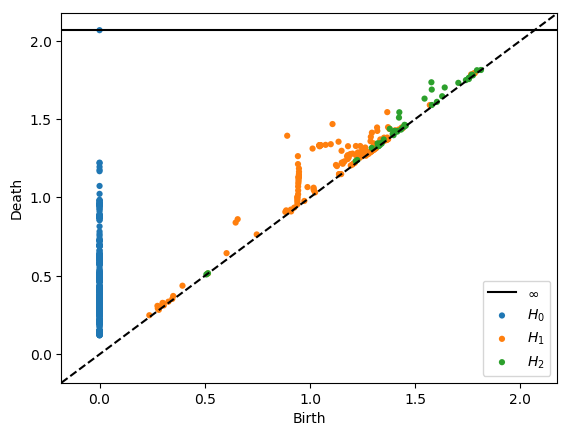

starting
(550, 50)
[[-0.557 -1.013 -0.998 ... -0.156 -0.123 -0.086]
 [-1.013 -0.998 -0.981 ... -0.123 -0.086 -0.069]
 [-0.998 -0.981 -0.96  ... -0.086 -0.069 -0.063]
 ...
 [-0.013 -0.012 -0.006 ... -0.004  0.002  0.002]
 [-0.012 -0.006 -0.002 ...  0.002  0.002  0.387]
 [-0.006 -0.002  0.006 ...  0.002  0.387  1.074]]
starting


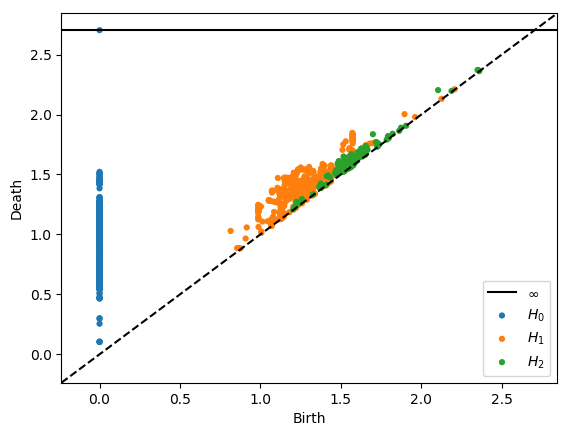

starting
(550, 50)
[[ 0.444  0.91   0.999 ...  0.417  0.505  0.557]
 [ 0.91   0.999  1.006 ...  0.505  0.557  0.519]
 [ 0.999  1.006  0.961 ...  0.557  0.519  0.504]
 ...
 [-0.065 -0.107 -0.09  ... -0.06  -0.007 -0.003]
 [-0.107 -0.09  -0.024 ... -0.007 -0.003 -0.021]
 [-0.09  -0.024  0.027 ... -0.003 -0.021 -0.047]]
starting


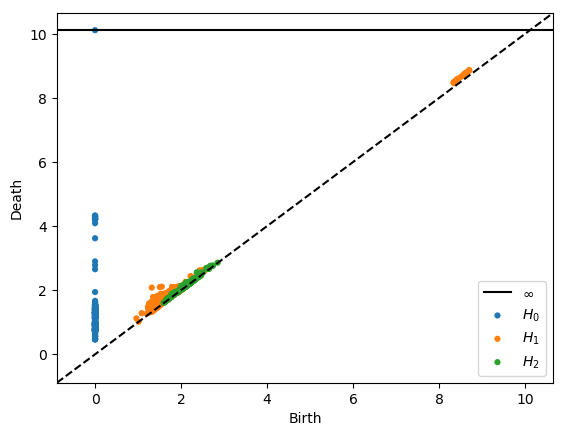

starting
(550, 50)
[[ 0.577  1.064  0.991 ... -0.074 -0.078 -0.082]
 [ 1.064  0.991  0.962 ... -0.078 -0.082 -0.083]
 [ 0.991  0.962  0.933 ... -0.082 -0.083 -0.083]
 ...
 [-0.007 -0.013 -0.02  ... -0.002  0.129  0.303]
 [-0.013 -0.02  -0.023 ...  0.129  0.303  0.179]
 [-0.02  -0.023 -0.02  ...  0.303  0.179  0.031]]
starting


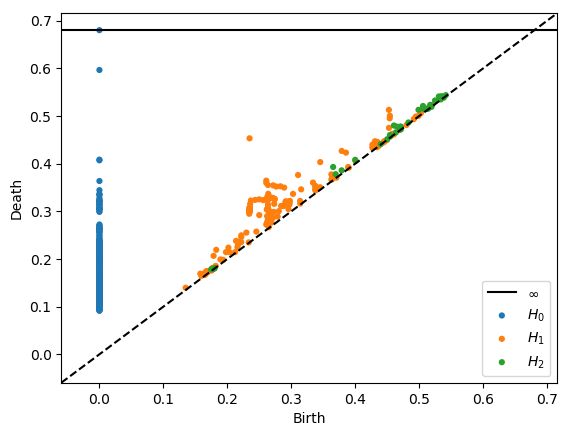

starting
(550, 50)
[[-0.013 -0.021 -0.061 ...  0.105  0.104  0.099]
 [-0.021 -0.061 -0.103 ...  0.104  0.099  0.083]
 [-0.061 -0.103 -0.134 ...  0.099  0.083  0.075]
 ...
 [-0.237 -0.305 -0.328 ...  0.038  0.033  0.034]
 [-0.305 -0.328 -0.275 ...  0.033  0.034  0.041]
 [-0.328 -0.275 -0.197 ...  0.034  0.041  0.028]]
starting


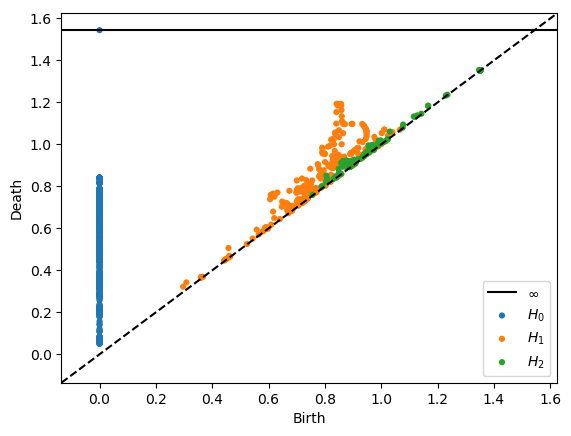

starting
(550, 50)
[[-0.489 -0.889 -0.803 ... -0.259 -0.008  0.027]
 [-0.889 -0.803 -0.774 ... -0.008  0.027  0.036]
 [-0.803 -0.774 -0.815 ...  0.027  0.036  0.028]
 ...
 [-0.013  0.002  0.003 ...  0.033 -0.009 -0.056]
 [ 0.002  0.003 -0.013 ... -0.009 -0.056 -0.085]
 [ 0.003 -0.013 -0.038 ... -0.056 -0.085 -0.114]]
starting


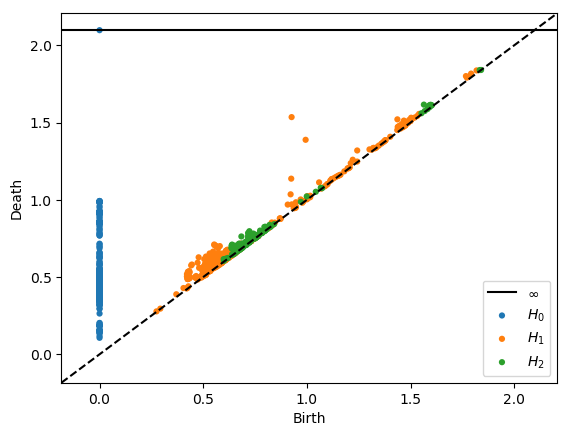

starting
(550, 50)
[[-0.01  -0.006  0.009 ... -0.264 -0.241 -0.22 ]
 [-0.006  0.009  0.067 ... -0.241 -0.22  -0.21 ]
 [ 0.009  0.067  0.12  ... -0.22  -0.21  -0.202]
 ...
 [ 0.029  0.008  0.008 ...  0.029  0.051  0.056]
 [ 0.008  0.008  0.007 ...  0.051  0.056  0.046]
 [ 0.008  0.007  0.011 ...  0.056  0.046  0.041]]
starting


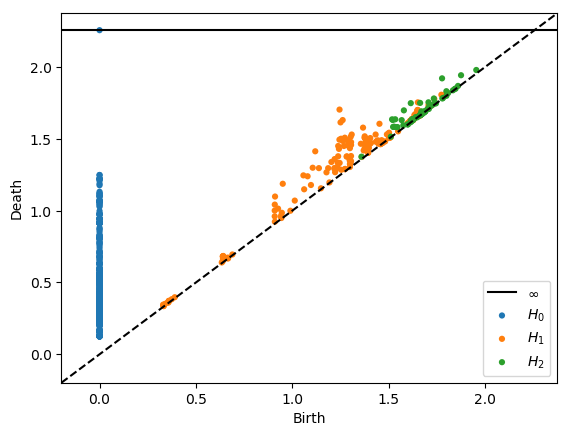

starting
(550, 50)
[[ 0.464  0.87   0.918 ...  0.052  0.024 -0.028]
 [ 0.87   0.918  1.144 ...  0.024 -0.028 -0.073]
 [ 0.918  1.144  0.9   ... -0.028 -0.073 -0.095]
 ...
 [-0.09  -0.088  0.056 ...  0.053  0.066  0.06 ]
 [-0.088  0.056  0.341 ...  0.066  0.06   0.044]
 [ 0.056  0.341 -0.154 ...  0.06   0.044 -0.012]]
starting


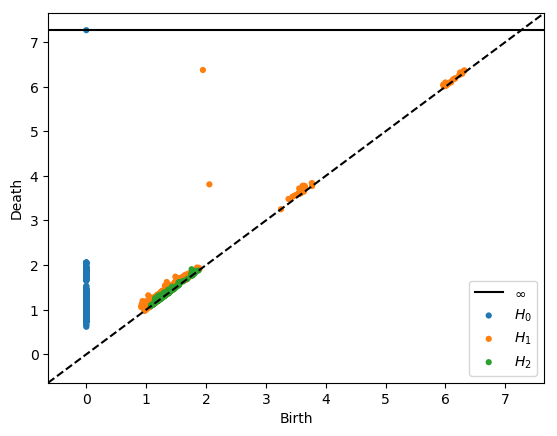

starting
(550, 50)
[[ 0.134  0.192  0.181 ...  0.031  0.022  0.026]
 [ 0.192  0.181  0.164 ...  0.022  0.026  0.125]
 [ 0.181  0.164  0.147 ...  0.026  0.125  0.37 ]
 ...
 [ 0.033 -0.004 -0.007 ... -0.049  0.137  0.396]
 [-0.004 -0.007 -0.002 ...  0.137  0.396  0.336]
 [-0.007 -0.002 -0.014 ...  0.396  0.336  0.093]]
starting


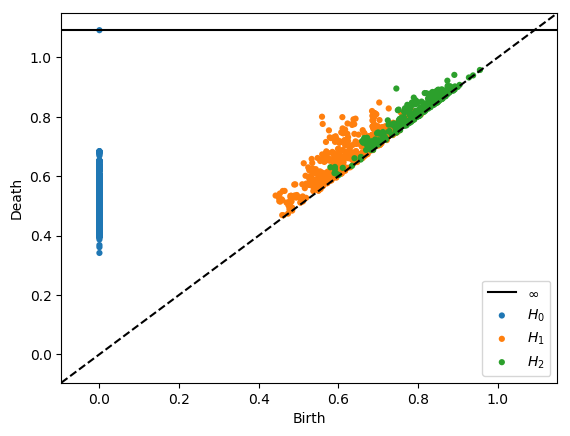

starting
(550, 50)
[[ 0.433  0.792  0.749 ... -0.018 -0.06  -0.076]
 [ 0.792  0.749  0.698 ... -0.06  -0.076 -0.085]
 [ 0.749  0.698  0.661 ... -0.076 -0.085 -0.092]
 ...
 [-0.078 -0.047 -0.001 ...  0.002  0.002 -0.005]
 [-0.047 -0.001  0.009 ...  0.002 -0.005 -0.013]
 [-0.001  0.009  0.013 ... -0.005 -0.013 -0.024]]
starting


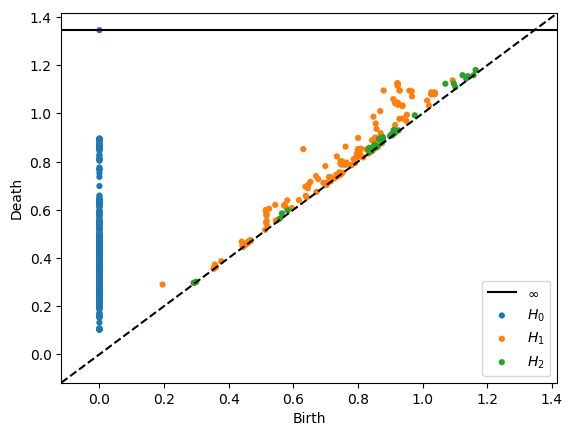

starting
(550, 50)
[[ 0.019  0.114  0.586 ...  0.037  0.024  0.017]
 [ 0.114  0.586  0.484 ...  0.024  0.017  0.009]
 [ 0.586  0.484 -0.162 ...  0.017  0.009 -0.005]
 ...
 [ 0.616  0.843 -0.125 ...  0.008  0.026  0.046]
 [ 0.843 -0.125 -0.005 ...  0.026  0.046  0.06 ]
 [-0.125 -0.005  0.002 ...  0.046  0.06   0.064]]
starting


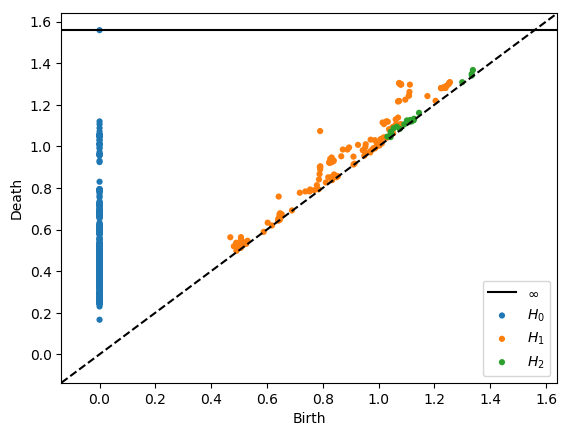

starting
(550, 50)
[[-0.617 -1.155 -1.133 ...  0.059  0.045  0.031]
 [-1.155 -1.133 -1.089 ...  0.045  0.031  0.055]
 [-1.133 -1.089 -1.044 ...  0.031  0.055  0.08 ]
 ...
 [ 0.027  0.037  0.021 ... -0.062 -0.106 -0.12 ]
 [ 0.037  0.021  0.003 ... -0.106 -0.12  -0.136]
 [ 0.021  0.003 -0.018 ... -0.12  -0.136 -0.146]]
starting


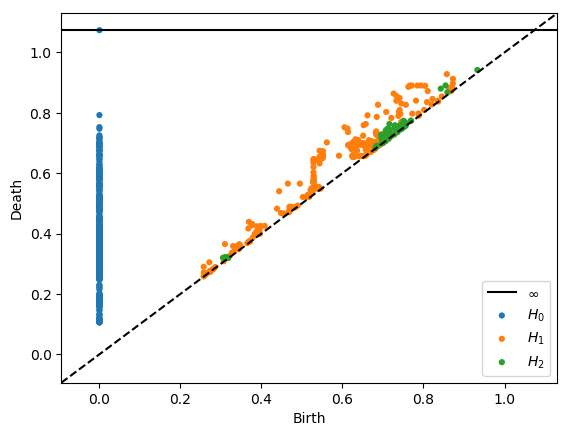

starting
(550, 50)
[[ 0.562  1.02   1.004 ... -0.035 -0.017  0.022]
 [ 1.02   1.004  0.967 ... -0.017  0.022  0.047]
 [ 1.004  0.967  0.939 ...  0.022  0.047  0.072]
 ...
 [-0.057 -0.042 -0.054 ... -0.078 -0.074 -0.025]
 [-0.042 -0.054 -0.057 ... -0.074 -0.025 -0.01 ]
 [-0.054 -0.057 -0.048 ... -0.025 -0.01  -0.05 ]]
starting


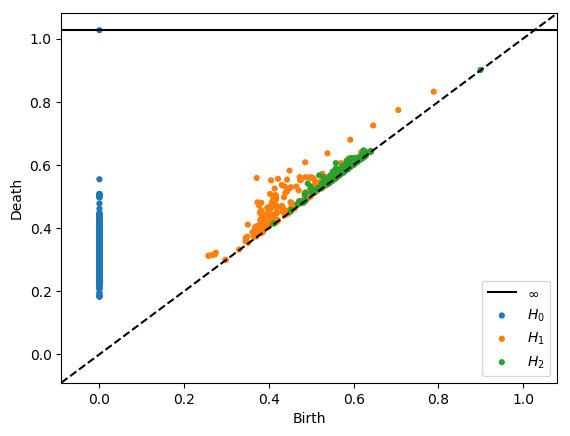

starting
(550, 50)
[[-2.300e-02 -4.600e-02 -7.900e-02 ... -1.800e-02 -1.100e-02  1.000e-03]
 [-4.600e-02 -7.900e-02 -9.400e-02 ... -1.100e-02  1.000e-03  8.000e-03]
 [-7.900e-02 -9.400e-02 -1.210e-01 ...  1.000e-03  8.000e-03  1.100e-02]
 ...
 [ 5.900e-02  5.100e-02 -3.500e-02 ...  2.520e+00  2.939e+00  3.287e+00]
 [ 5.100e-02 -3.500e-02 -1.440e-01 ...  2.939e+00  3.287e+00  3.353e+00]
 [-3.500e-02 -1.440e-01 -2.060e-01 ...  3.287e+00  3.353e+00  3.237e+00]]
starting


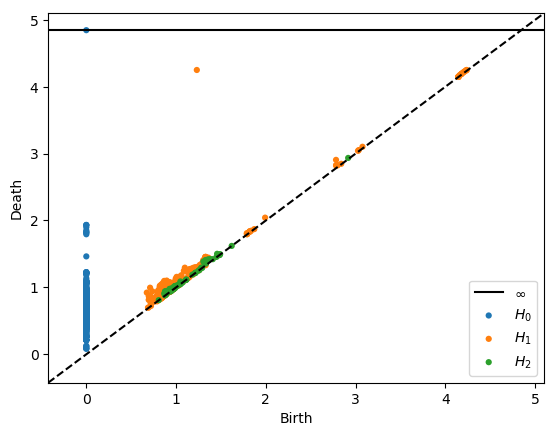

starting
(550, 50)
[[-0.115 -0.121 -0.035 ... -0.085 -0.039  0.317]
 [-0.121 -0.035 -0.009 ... -0.039  0.317  0.4  ]
 [-0.035 -0.009  0.01  ...  0.317  0.4   -0.208]
 ...
 [-0.031 -0.022 -0.012 ... -0.097 -0.068 -0.05 ]
 [-0.022 -0.012  0.002 ... -0.068 -0.05  -0.04 ]
 [-0.012  0.002  0.033 ... -0.05  -0.04  -0.031]]
starting


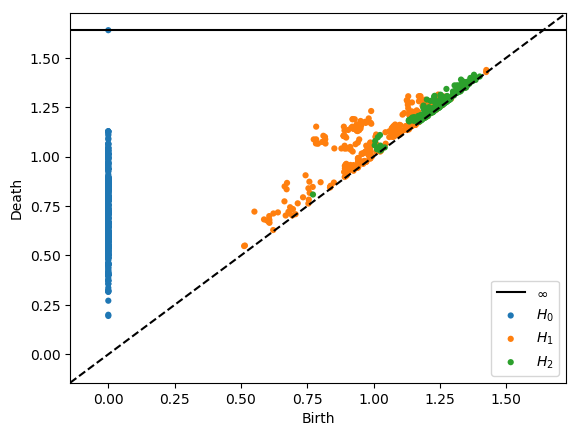

starting
(550, 50)
[[ 0.084  0.1    0.079 ... -0.022 -0.096 -0.074]
 [ 0.1    0.079  0.07  ... -0.096 -0.074  0.078]
 [ 0.079  0.07   0.091 ... -0.074  0.078  0.067]
 ...
 [ 0.018  0.034 -0.003 ... -0.367 -0.406 -0.523]
 [ 0.034 -0.003  0.018 ... -0.406 -0.523 -0.515]
 [-0.003  0.018  0.039 ... -0.523 -0.515 -0.494]]
starting


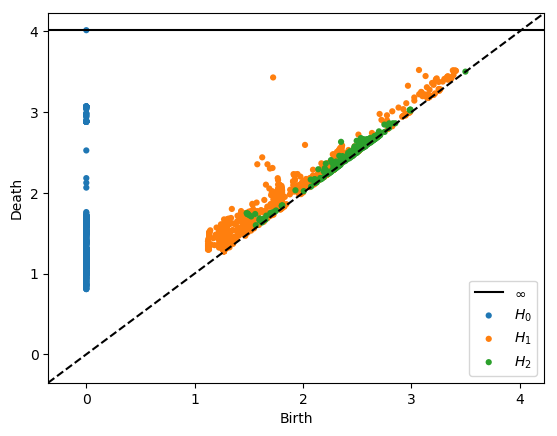

starting
(550, 50)
[[-0.321 -0.363  0.203 ... -0.049 -0.01   0.011]
 [-0.363  0.203  0.132 ... -0.01   0.011  0.062]
 [ 0.203  0.132 -0.309 ...  0.011  0.062  0.1  ]
 ...
 [-0.018 -0.006 -0.029 ... -0.069 -0.074 -0.078]
 [-0.006 -0.029  0.275 ... -0.074 -0.078 -0.089]
 [-0.029  0.275  0.686 ... -0.078 -0.089 -0.086]]
starting


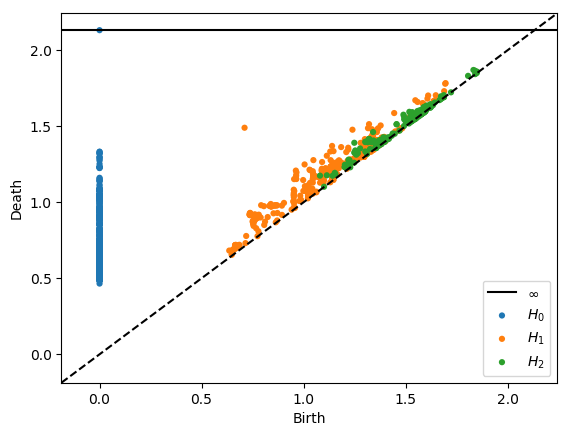

starting
(550, 50)
[[-0.025 -0.046  0.002 ...  0.025 -0.042 -0.077]
 [-0.046  0.002  0.064 ... -0.042 -0.077 -0.107]
 [ 0.002  0.064  0.094 ... -0.077 -0.107 -0.11 ]
 ...
 [ 0.019  0.018  0.008 ...  0.1    0.099  0.056]
 [ 0.018  0.008 -0.008 ...  0.099  0.056 -0.036]
 [ 0.008 -0.008  0.033 ...  0.056 -0.036 -0.124]]
starting


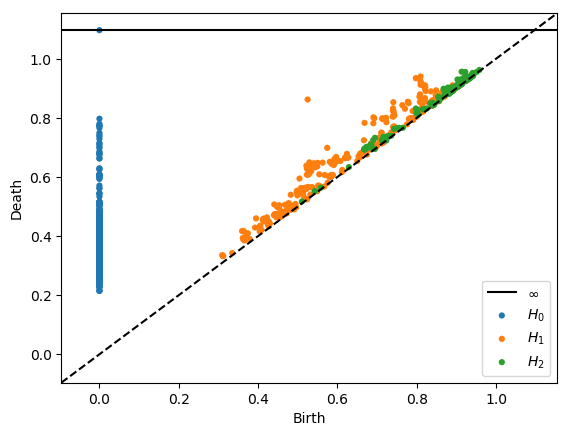

starting
(550, 50)
[[ 0.137  0.298  0.322 ... -0.134 -0.135 -0.132]
 [ 0.298  0.322  0.341 ... -0.135 -0.132 -0.135]
 [ 0.322  0.341  0.369 ... -0.132 -0.135 -0.127]
 ...
 [-0.046 -0.045 -0.042 ... -0.036 -0.026  0.041]
 [-0.045 -0.042 -0.022 ... -0.026  0.041  0.067]
 [-0.042 -0.022  0.028 ...  0.041  0.067  0.055]]
starting


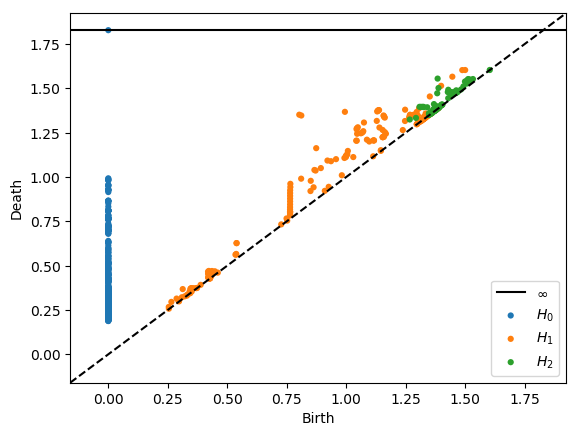

starting
(550, 50)
[[-0.091 -0.214 -0.222 ... -0.028 -0.025 -0.048]
 [-0.214 -0.222 -0.176 ... -0.025 -0.048 -0.069]
 [-0.222 -0.176 -0.133 ... -0.048 -0.069 -0.086]
 ...
 [-0.028 -0.012  0.032 ...  0.043  0.015  0.008]
 [-0.012  0.032  0.042 ...  0.015  0.008  0.005]
 [ 0.032  0.042  0.042 ...  0.008  0.005  0.006]]
starting


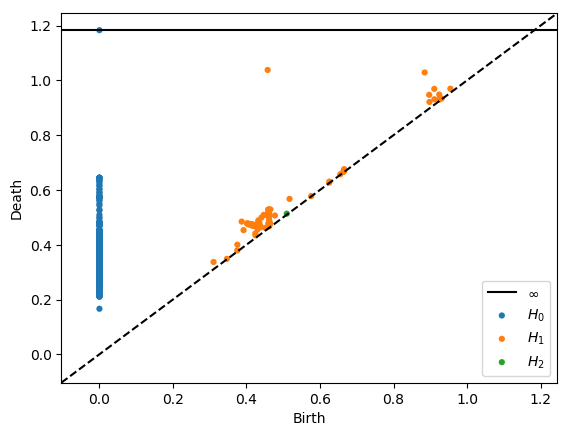

starting
(550, 50)
[[-0.055 -0.075 -0.083 ... -0.01  -0.183 -0.304]
 [-0.075 -0.083 -0.089 ... -0.183 -0.304  0.052]
 [-0.083 -0.089 -0.087 ... -0.304  0.052  0.156]
 ...
 [-0.369  0.194  0.138 ...  0.05   0.076  0.087]
 [ 0.194  0.138  0.041 ...  0.076  0.087  0.087]
 [ 0.138  0.041  0.042 ...  0.087  0.087  0.075]]
starting


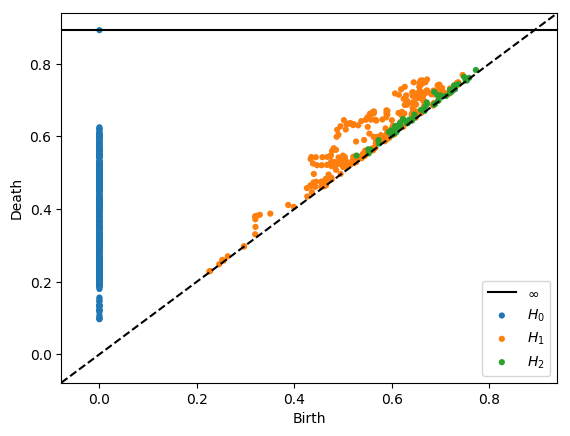

starting
(550, 50)
[[-0.918 -1.581 -1.246 ... -0.022 -0.162 -0.177]
 [-1.581 -1.246 -1.018 ... -0.162 -0.177 -0.093]
 [-1.246 -1.018 -0.92  ... -0.177 -0.093 -0.174]
 ...
 [-0.097 -0.093 -0.068 ... -0.098 -0.096 -0.088]
 [-0.093 -0.068 -0.029 ... -0.096 -0.088 -0.097]
 [-0.068 -0.029 -0.021 ... -0.088 -0.097 -0.106]]
starting


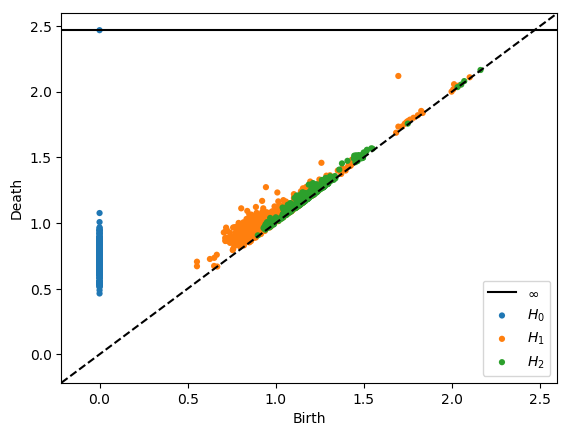

starting
(550, 50)
[[ 0.032  0.097  0.117 ... -0.022 -0.093 -0.206]
 [ 0.097  0.117  0.172 ... -0.093 -0.206 -0.213]
 [ 0.117  0.172  0.615 ... -0.206 -0.213 -0.214]
 ...
 [ 0.051  0.029  0.014 ... -0.195 -0.194 -0.193]
 [ 0.029  0.014  0.013 ... -0.194 -0.193 -0.184]
 [ 0.014  0.013  0.01  ... -0.193 -0.184 -0.163]]
starting


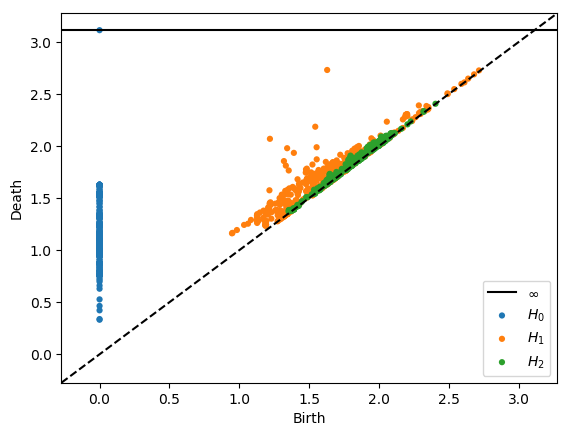

starting
(550, 50)
[[ 0.005  0.015 -0.23  ...  0.122  0.074 -0.012]
 [ 0.015 -0.23  -0.304 ...  0.074 -0.012  0.029]
 [-0.23  -0.304 -0.253 ... -0.012  0.029  0.027]
 ...
 [-0.108 -0.124 -0.089 ... -0.066  0.01   0.295]
 [-0.124 -0.089 -0.05  ...  0.01   0.295 -0.167]
 [-0.089 -0.05  -0.037 ...  0.295 -0.167 -0.117]]
starting


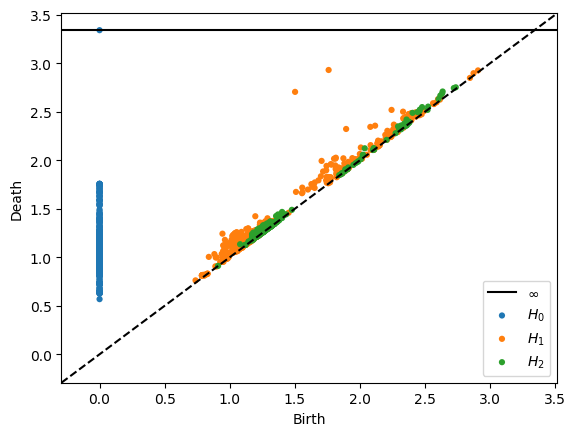

starting
(550, 50)
[[-0.073 -0.015  0.1   ... -0.356 -0.462 -0.666]
 [-0.015  0.1    0.043 ... -0.462 -0.666 -0.776]
 [ 0.1    0.043 -0.01  ... -0.666 -0.776 -0.748]
 ...
 [-0.033 -0.062 -0.048 ... -0.012  0.007  0.037]
 [-0.062 -0.048 -0.027 ...  0.007  0.037 -0.005]
 [-0.048 -0.027 -0.054 ...  0.037 -0.005  0.011]]
starting


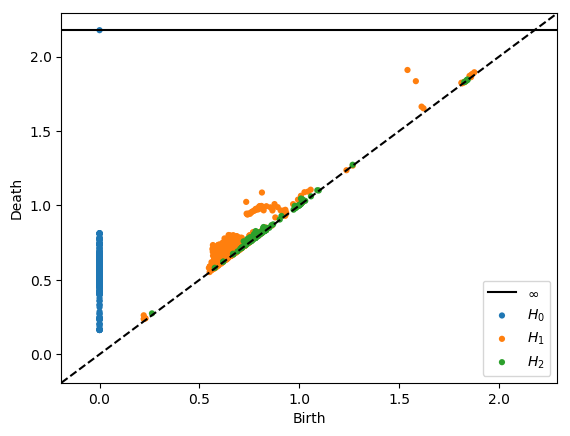

starting
(550, 50)
[[ 0.37   0.695  0.662 ... -0.078 -0.125 -0.149]
 [ 0.695  0.662  0.595 ... -0.125 -0.149 -0.13 ]
 [ 0.662  0.595  0.55  ... -0.149 -0.13  -0.117]
 ...
 [ 0.083  0.086  0.087 ... -0.042 -0.019  0.02 ]
 [ 0.086  0.087  0.076 ... -0.019  0.02   0.033]
 [ 0.087  0.076  0.058 ...  0.02   0.033  0.046]]
starting


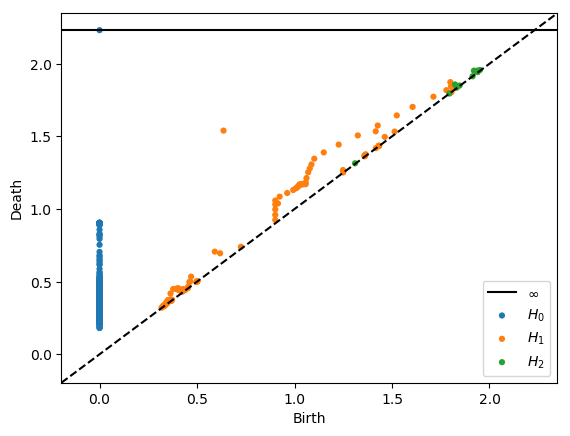

starting
(550, 50)
[[ 0.392  0.743  0.657 ...  0.064  0.077  0.106]
 [ 0.743  0.657  0.553 ...  0.077  0.106  0.145]
 [ 0.657  0.553  0.492 ...  0.106  0.145  0.185]
 ...
 [-0.078 -0.073 -0.07  ... -0.052 -0.048 -0.048]
 [-0.073 -0.07  -0.07  ... -0.048 -0.048 -0.057]
 [-0.07  -0.07  -0.069 ... -0.048 -0.057 -0.069]]
starting


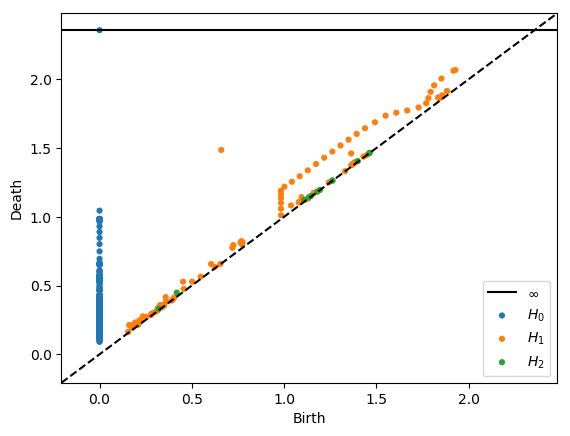

starting
(550, 50)
[[-0.1   -0.096 -0.021 ...  0.002  0.     0.001]
 [-0.096 -0.021 -0.005 ...  0.     0.001 -0.003]
 [-0.021 -0.005  0.005 ...  0.001 -0.003 -0.013]
 ...
 [ 0.643  0.614  0.556 ... -0.171 -0.197 -0.23 ]
 [ 0.614  0.556  0.476 ... -0.197 -0.23  -0.229]
 [ 0.556  0.476  0.368 ... -0.23  -0.229 -0.172]]
starting


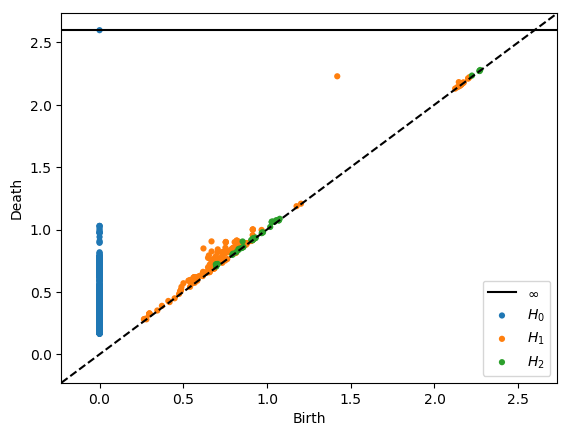

starting
(550, 50)
[[ 0.501  0.952  0.972 ...  0.047  0.059  0.069]
 [ 0.952  0.972  0.964 ...  0.059  0.069  0.086]
 [ 0.972  0.964  0.946 ...  0.069  0.086  0.071]
 ...
 [ 0.022  0.006 -0.005 ... -0.007 -0.002 -0.083]
 [ 0.006 -0.005  0.008 ... -0.002 -0.083 -0.341]
 [-0.005  0.008  0.055 ... -0.083 -0.341 -0.774]]
starting


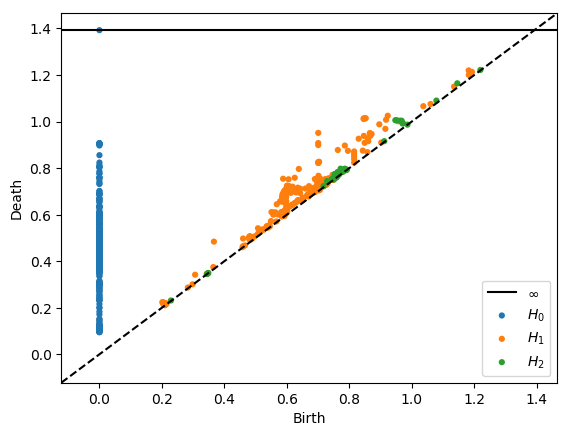

starting
(550, 50)
[[-0.132 -0.213 -0.197 ...  0.098  0.139  0.169]
 [-0.213 -0.197 -0.16  ...  0.139  0.169  0.154]
 [-0.197 -0.16  -0.147 ...  0.169  0.154  0.182]
 ...
 [ 0.138  0.429  0.849 ... -0.048 -0.053 -0.055]
 [ 0.429  0.849  0.169 ... -0.053 -0.055 -0.049]
 [ 0.849  0.169 -0.202 ... -0.055 -0.049 -0.05 ]]
starting


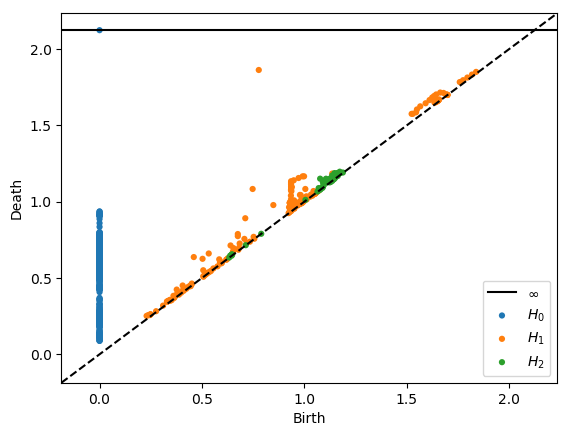

starting
(550, 50)
[[ 0.166  0.289  0.294 ...  0.078  0.103  0.131]
 [ 0.289  0.294  0.309 ...  0.103  0.131  0.155]
 [ 0.294  0.309  0.441 ...  0.131  0.155  0.17 ]
 ...
 [-0.049 -0.038 -0.008 ...  0.02   0.04   0.064]
 [-0.038 -0.008  0.044 ...  0.04   0.064  0.067]
 [-0.008  0.044  0.097 ...  0.064  0.067  0.06 ]]
starting


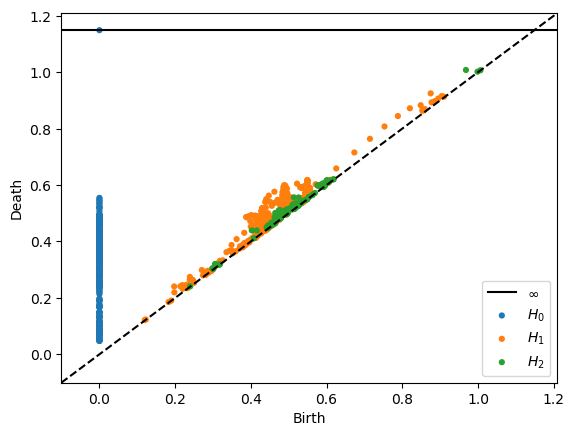

starting
(550, 50)
[[ 8.230e-01  1.420e-01 -5.790e-01 ... -1.230e-01  1.000e-03  7.700e-01]
 [ 1.420e-01 -5.790e-01  1.607e+00 ...  1.000e-03  7.700e-01 -9.910e-01]
 [-5.790e-01  1.607e+00  1.153e+00 ...  7.700e-01 -9.910e-01 -4.470e-01]
 ...
 [ 1.799e+00  1.789e+00  1.040e-01 ... -1.323e+00  7.000e-03  1.659e+00]
 [ 1.789e+00  1.040e-01 -1.950e+00 ...  7.000e-03  1.659e+00 -3.400e-01]
 [ 1.040e-01 -1.950e+00 -2.768e+00 ...  1.659e+00 -3.400e-01  7.060e-01]]
starting


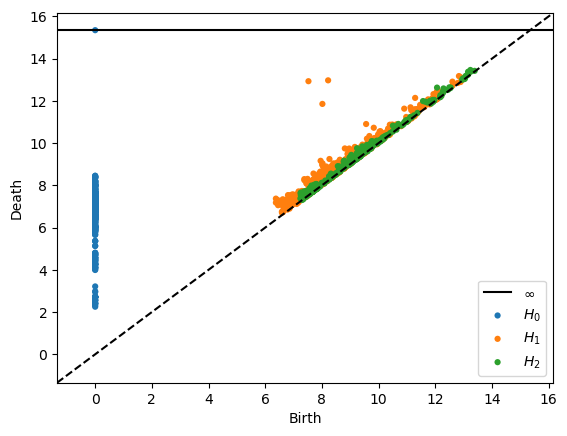

starting
(550, 50)
[[-0.069 -0.122 -0.129 ...  0.843  0.911  0.761]
 [-0.122 -0.129 -0.137 ...  0.911  0.761  0.688]
 [-0.129 -0.137 -0.162 ...  0.761  0.688  0.725]
 ...
 [ 0.004  0.011  0.003 ...  0.043  0.081  0.145]
 [ 0.011  0.003 -0.006 ...  0.081  0.145  0.193]
 [ 0.003 -0.006 -0.023 ...  0.145  0.193  0.19 ]]
starting


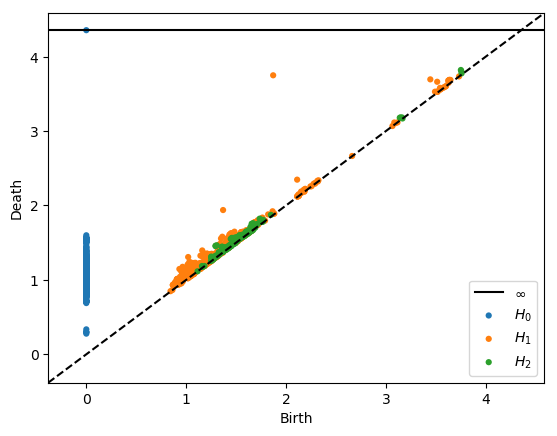

starting
(550, 50)
[[ 0.223  0.417  0.426 ...  0.113  0.109  0.078]
 [ 0.417  0.426  0.433 ...  0.109  0.078  0.025]
 [ 0.426  0.433  0.443 ...  0.078  0.025  0.014]
 ...
 [ 0.276 -0.499 -0.396 ...  0.007 -0.021 -0.026]
 [-0.499 -0.396 -0.033 ... -0.021 -0.026 -0.021]
 [-0.396 -0.033 -0.006 ... -0.026 -0.021  0.128]]
starting


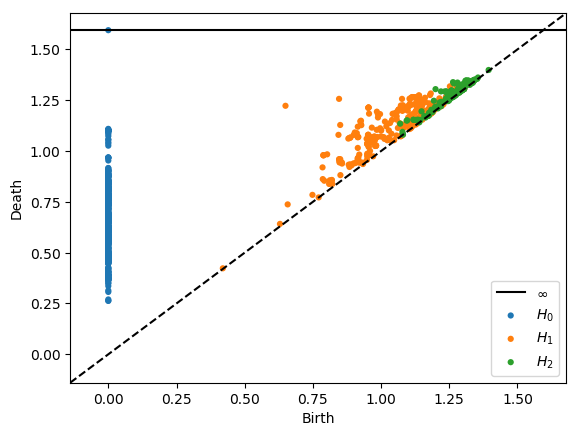

starting
(550, 50)
[[ 0.536  0.982  0.938 ... -0.089 -0.078 -0.079]
 [ 0.982  0.938  0.938 ... -0.078 -0.079 -0.08 ]
 [ 0.938  0.938  0.936 ... -0.079 -0.08  -0.075]
 ...
 [-0.038 -0.027 -0.025 ... -0.053 -0.056 -0.01 ]
 [-0.027 -0.025 -0.026 ... -0.056 -0.01  -0.002]
 [-0.025 -0.026 -0.024 ... -0.01  -0.002 -0.001]]
starting


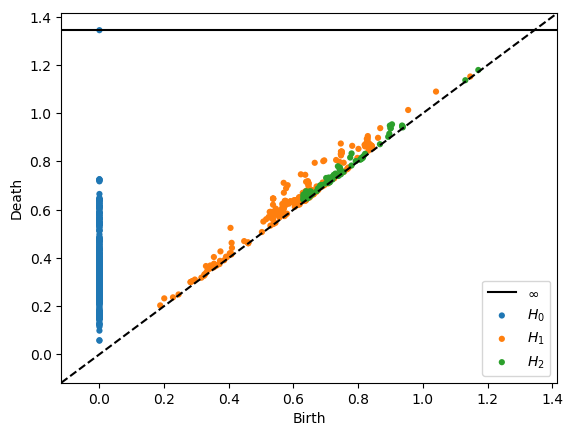

starting
(550, 50)
[[-1.056 -1.907 -1.808 ...  0.216  0.218  0.214]
 [-1.907 -1.808 -1.788 ...  0.218  0.214  0.201]
 [-1.808 -1.788 -1.776 ...  0.214  0.201  0.148]
 ...
 [-0.066 -0.087  0.062 ...  0.102  0.02  -0.013]
 [-0.087  0.062  0.745 ...  0.02  -0.013 -0.031]
 [ 0.062  0.745  0.223 ... -0.013 -0.031 -0.04 ]]
starting


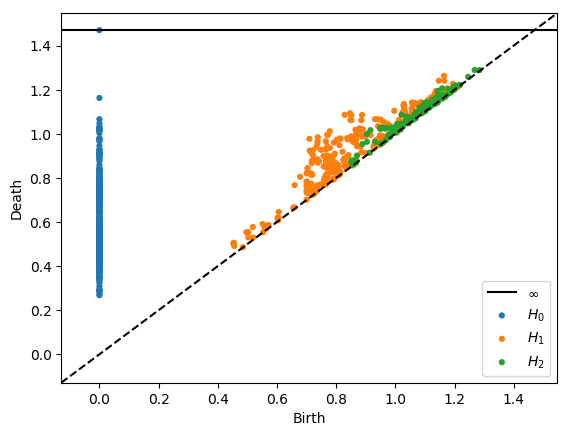

starting
(550, 50)
[[-0.372 -0.687 -0.7   ... -0.009  0.037  0.089]
 [-0.687 -0.7   -0.708 ...  0.037  0.089  0.095]
 [-0.7   -0.708 -0.738 ...  0.089  0.095  0.094]
 ...
 [-0.005  0.022  0.052 ...  0.079  0.493  0.247]
 [ 0.022  0.052  0.067 ...  0.493  0.247 -0.231]
 [ 0.052  0.067  0.078 ...  0.247 -0.231 -0.051]]
starting


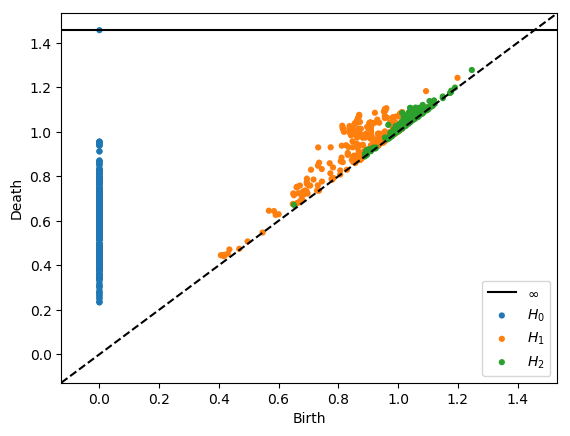

starting
(550, 50)
[[-0.486 -0.877 -0.832 ...  0.224  0.378 -0.203]
 [-0.877 -0.832 -0.848 ...  0.378 -0.203 -0.343]
 [-0.832 -0.848 -0.906 ... -0.203 -0.343 -0.037]
 ...
 [-0.041 -0.056 -0.045 ... -0.031 -0.004 -0.001]
 [-0.056 -0.045  0.006 ... -0.004 -0.001 -0.021]
 [-0.045  0.006  0.077 ... -0.001 -0.021  0.094]]
starting


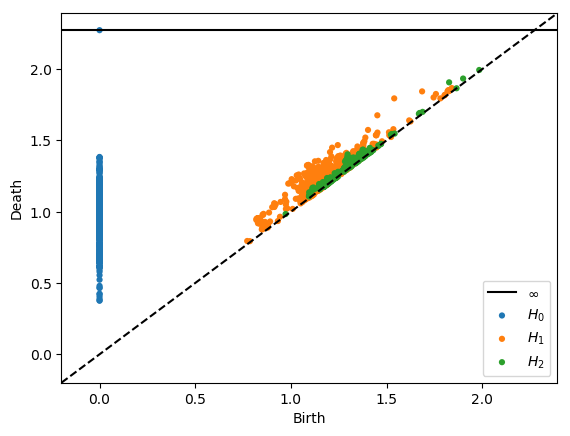

starting
(550, 50)
[[-0.103 -0.156 -0.127 ...  0.534 -0.071 -0.567]
 [-0.156 -0.127  0.06  ... -0.071 -0.567 -0.203]
 [-0.127  0.06   0.372 ... -0.567 -0.203 -0.11 ]
 ...
 [ 0.017  0.006 -0.002 ... -0.08  -0.029  0.019]
 [ 0.006 -0.002 -0.014 ... -0.029  0.019  0.058]
 [-0.002 -0.014 -0.011 ...  0.019  0.058  0.072]]
starting


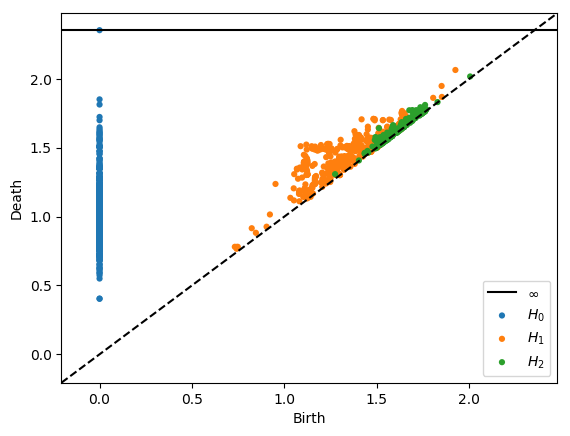

starting
(550, 50)
[[-0.596 -1.104 -1.098 ...  0.027  0.014  0.043]
 [-1.104 -1.098 -1.064 ...  0.014  0.043  0.081]
 [-1.098 -1.064 -1.054 ...  0.043  0.081  0.1  ]
 ...
 [-0.025 -0.03  -0.044 ...  0.112  0.096  0.039]
 [-0.03  -0.044 -0.093 ...  0.096  0.039  0.02 ]
 [-0.044 -0.093 -0.099 ...  0.039  0.02   0.003]]
starting


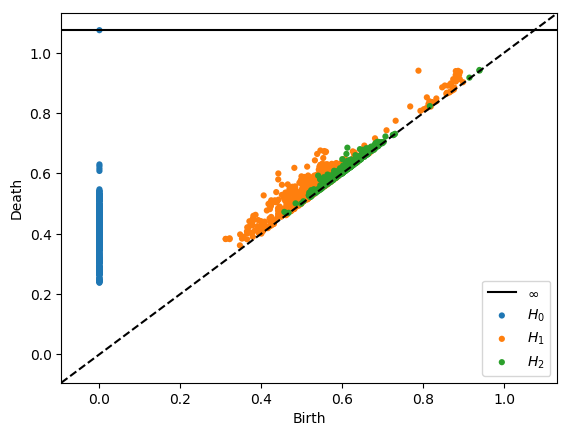

starting
(550, 50)
[[ 0.308  0.544  0.469 ... -0.078 -0.082 -0.091]
 [ 0.544  0.469  0.386 ... -0.082 -0.091 -0.098]
 [ 0.469  0.386  0.359 ... -0.091 -0.098 -0.106]
 ...
 [ 0.055  0.039  0.03  ...  0.357 -0.116 -0.181]
 [ 0.039  0.03   0.023 ... -0.116 -0.181 -0.216]
 [ 0.03   0.023  0.017 ... -0.181 -0.216 -0.237]]
starting


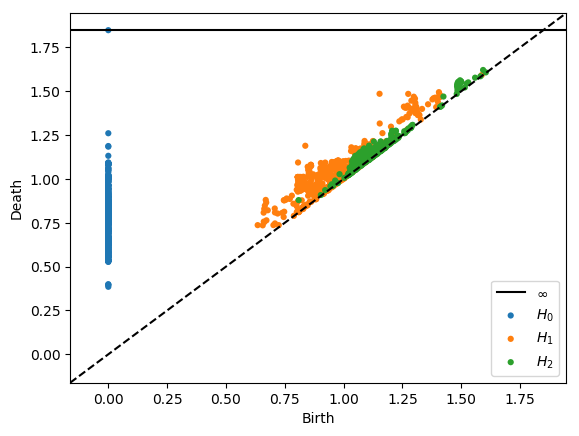

starting
(550, 50)
[[-0.318 -0.544 -0.557 ... -0.059 -0.053 -0.049]
 [-0.544 -0.557 -0.542 ... -0.053 -0.049 -0.045]
 [-0.557 -0.542 -0.517 ... -0.049 -0.045 -0.038]
 ...
 [ 0.098  0.104  0.079 ...  0.008  0.002 -0.004]
 [ 0.104  0.079  0.063 ...  0.002 -0.004 -0.009]
 [ 0.079  0.063  0.056 ... -0.004 -0.009 -0.017]]
starting


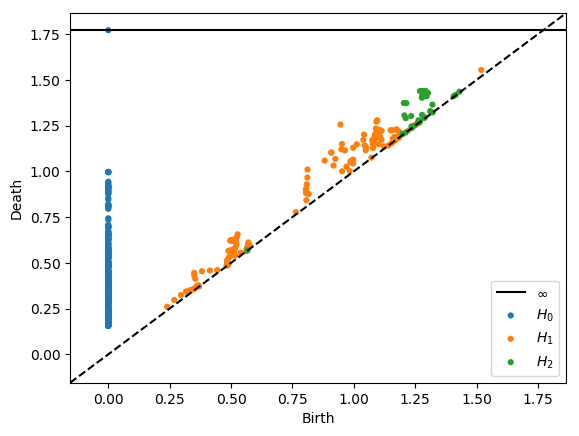

starting
(550, 50)
[[ 0.179  0.271  0.259 ... -0.228 -0.205 -0.182]
 [ 0.271  0.259  0.25  ... -0.205 -0.182 -0.151]
 [ 0.259  0.25   0.244 ... -0.182 -0.151 -0.114]
 ...
 [ 0.022  0.06   0.067 ...  0.138  0.13   0.097]
 [ 0.06   0.067  0.076 ...  0.13   0.097  0.048]
 [ 0.067  0.076  0.106 ...  0.097  0.048  0.014]]
starting


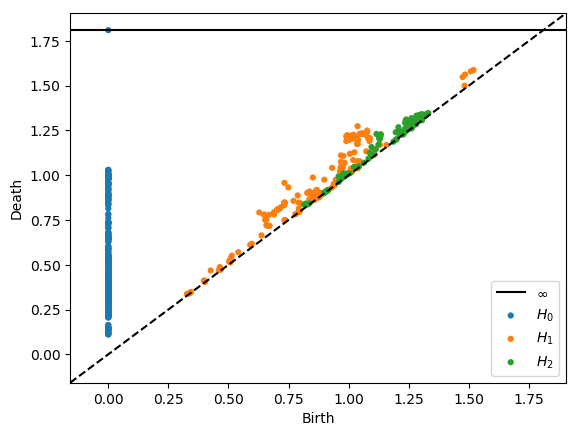

starting
(550, 50)
[[ 0.331  0.576  0.423 ...  0.05   0.141  0.213]
 [ 0.576  0.423  0.279 ...  0.141  0.213  0.284]
 [ 0.423  0.279  0.219 ...  0.213  0.284  0.304]
 ...
 [-0.102 -0.091 -0.047 ...  0.895 -0.01  -0.116]
 [-0.091 -0.047 -0.024 ... -0.01  -0.116 -0.147]
 [-0.047 -0.024 -0.023 ... -0.116 -0.147 -0.093]]
starting


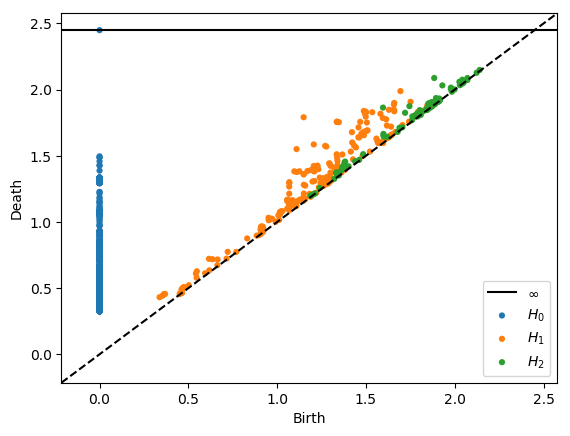

starting
(550, 50)
[[ 0.12   0.275  0.291 ...  0.259  0.315  0.332]
 [ 0.275  0.291  0.292 ...  0.315  0.332  0.273]
 [ 0.291  0.292  0.315 ...  0.332  0.273  0.108]
 ...
 [ 0.118  0.079  0.06  ... -0.607 -0.454 -0.202]
 [ 0.079  0.06   0.048 ... -0.454 -0.202 -0.053]
 [ 0.06   0.048  0.093 ... -0.202 -0.053 -0.026]]
starting


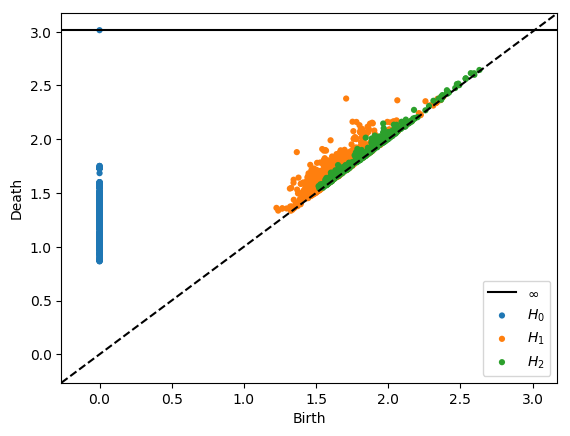

starting
(550, 50)
[[-0.185 -0.315 -0.304 ... -0.014  0.021  0.031]
 [-0.315 -0.304 -0.26  ...  0.021  0.031  0.037]
 [-0.304 -0.26  -0.236 ...  0.031  0.037  0.033]
 ...
 [ 0.026  0.027  0.01  ...  0.089  0.086  0.023]
 [ 0.027  0.01  -0.001 ...  0.086  0.023 -0.04 ]
 [ 0.01  -0.001 -0.009 ...  0.023 -0.04  -0.07 ]]
starting


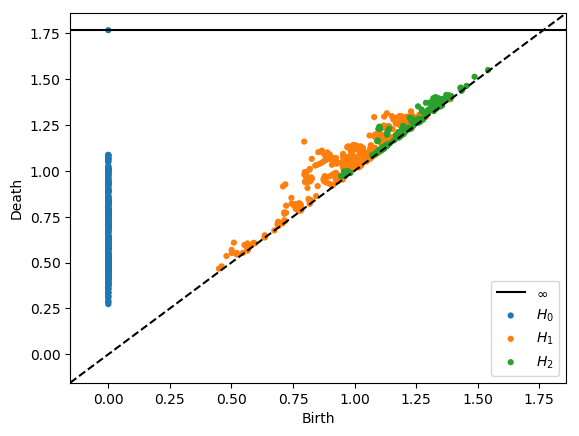

starting
(550, 50)
[[ 0.168  0.382  0.49  ...  0.212  0.18   0.229]
 [ 0.382  0.49   0.535 ...  0.18   0.229  0.311]
 [ 0.49   0.535  0.54  ...  0.229  0.311  0.384]
 ...
 [ 1.269  1.119  1.028 ... -0.205 -0.274 -0.295]
 [ 1.119  1.028  1.01  ... -0.274 -0.295 -0.383]
 [ 1.028  1.01   0.893 ... -0.295 -0.383 -0.344]]
starting


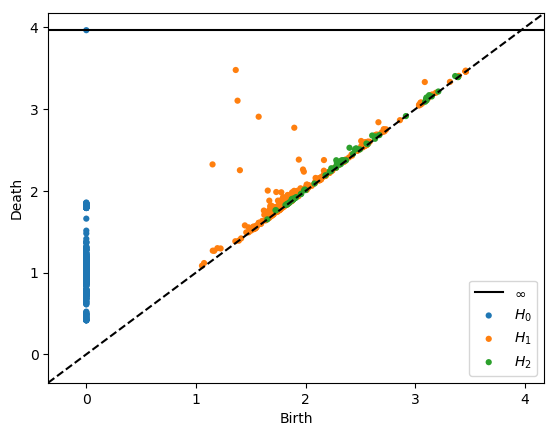

starting
(550, 50)
[[ 0.271  0.557  0.461 ... -0.143 -0.16  -0.168]
 [ 0.557  0.461  0.306 ... -0.16  -0.168 -0.21 ]
 [ 0.461  0.306  0.283 ... -0.168 -0.21  -0.238]
 ...
 [-0.071 -0.078 -0.094 ...  0.419  0.374  0.428]
 [-0.078 -0.094 -0.131 ...  0.374  0.428  0.517]
 [-0.094 -0.131 -0.15  ...  0.428  0.517  0.526]]
starting


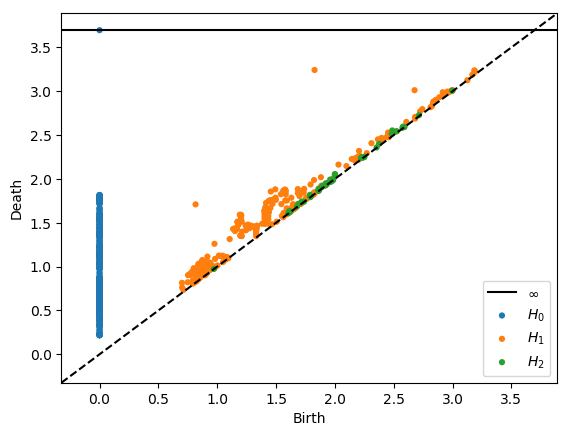

starting
(550, 50)
[[-0.755 -1.401 -1.329 ...  0.329  0.33   0.316]
 [-1.401 -1.329 -1.264 ...  0.33   0.316  0.291]
 [-1.329 -1.264 -1.204 ...  0.316  0.291  0.258]
 ...
 [-0.002 -0.078 -0.143 ...  0.076  0.071  0.064]
 [-0.078 -0.143 -0.21  ...  0.071  0.064  0.052]
 [-0.143 -0.21  -0.297 ...  0.064  0.052  0.037]]
starting


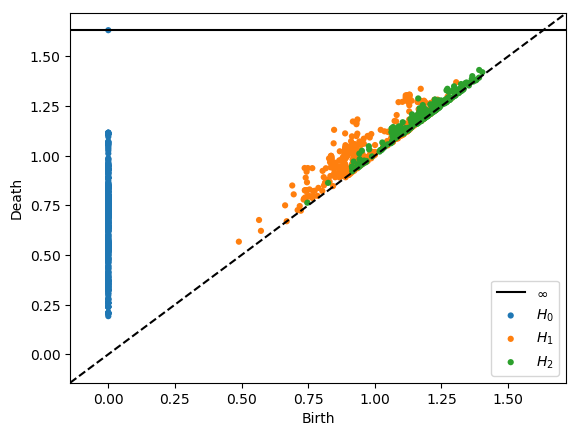

starting
(550, 50)
[[-0.188 -0.332 -0.35  ...  0.076  0.079  0.1  ]
 [-0.332 -0.35  -0.35  ...  0.079  0.1    0.113]
 [-0.35  -0.35  -0.349 ...  0.1    0.113  0.12 ]
 ...
 [ 0.001 -0.003 -0.004 ... -0.03  -0.021 -0.008]
 [-0.003 -0.004 -0.005 ... -0.021 -0.008  0.006]
 [-0.004 -0.005 -0.007 ... -0.008  0.006  0.017]]
starting


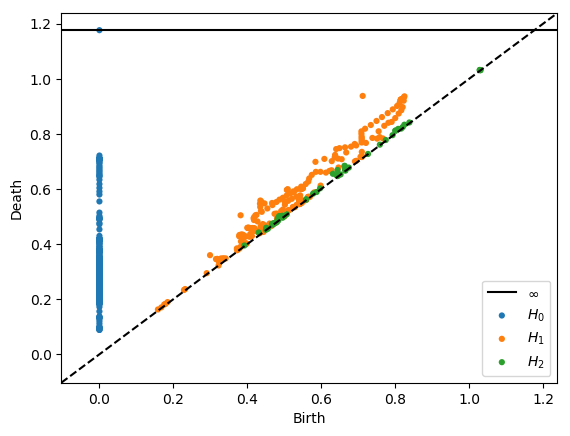

starting
(550, 50)
[[-0.138 -0.291 -0.267 ... -0.099 -0.082 -0.074]
 [-0.291 -0.267 -0.225 ... -0.082 -0.074 -0.074]
 [-0.267 -0.225 -0.215 ... -0.074 -0.074 -0.073]
 ...
 [ 0.03   0.029  0.015 ...  0.459  0.578 -0.013]
 [ 0.029  0.015  0.001 ...  0.578 -0.013 -0.058]
 [ 0.015  0.001 -0.008 ... -0.013 -0.058 -0.078]]
starting


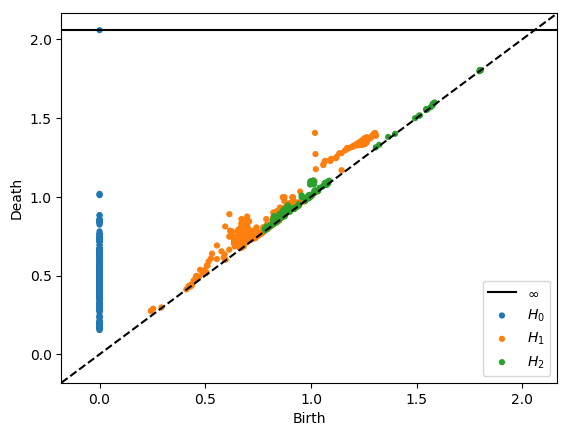

starting
(550, 50)
[[ 0.107  0.179  0.193 ... -0.164 -0.156 -0.166]
 [ 0.179  0.193  0.195 ... -0.156 -0.166 -0.191]
 [ 0.193  0.195  0.196 ... -0.166 -0.191 -0.206]
 ...
 [-0.057 -0.072 -0.073 ... -0.064 -0.089 -0.092]
 [-0.072 -0.073 -0.021 ... -0.089 -0.092 -0.075]
 [-0.073 -0.021  0.005 ... -0.092 -0.075 -0.019]]
starting


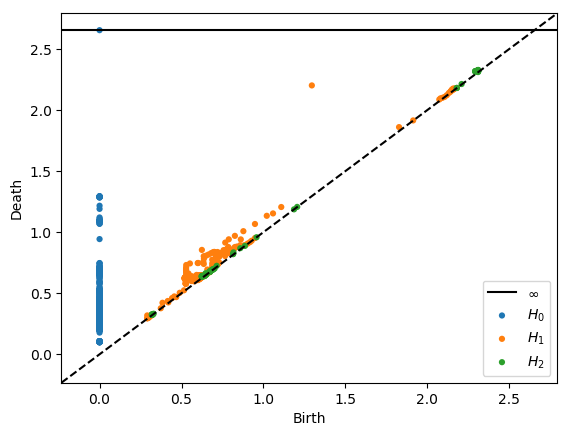

starting
(550, 50)
[[-0.546 -0.898 -0.664 ... -0.273 -0.264 -0.241]
 [-0.898 -0.664 -0.636 ... -0.264 -0.241 -0.262]
 [-0.664 -0.636 -0.592 ... -0.241 -0.262 -0.277]
 ...
 [-0.592 -0.313 -0.138 ...  0.045  0.062  0.066]
 [-0.313 -0.138 -0.075 ...  0.062  0.066  0.066]
 [-0.138 -0.075 -0.1   ...  0.066  0.066  0.025]]
starting


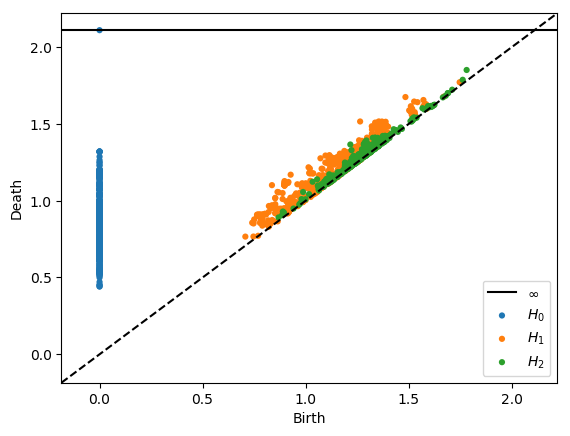

starting
(550, 50)
[[ 0.426  0.821  0.842 ... -0.075 -0.13   0.149]
 [ 0.821  0.842  0.834 ... -0.13   0.149  0.723]
 [ 0.842  0.834  0.797 ...  0.149  0.723  0.345]
 ...
 [-0.328 -0.116 -0.095 ...  0.207  0.212  0.175]
 [-0.116 -0.095 -0.052 ...  0.212  0.175  0.132]
 [-0.095 -0.052 -0.042 ...  0.175  0.132  0.075]]
starting


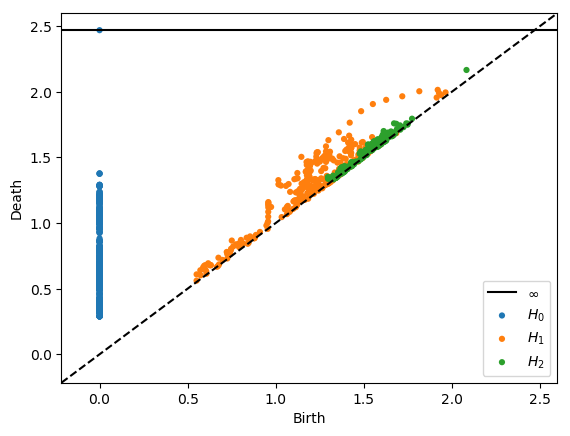

starting
(550, 50)
[[-0.063 -0.075 -0.043 ... -0.048 -0.071 -0.066]
 [-0.075 -0.043 -0.031 ... -0.071 -0.066 -0.046]
 [-0.043 -0.031 -0.024 ... -0.066 -0.046 -0.043]
 ...
 [-0.022 -0.005 -0.009 ...  0.003  0.005 -0.006]
 [-0.005 -0.009 -0.022 ...  0.005 -0.006 -0.022]
 [-0.009 -0.022 -0.03  ... -0.006 -0.022 -0.037]]
starting


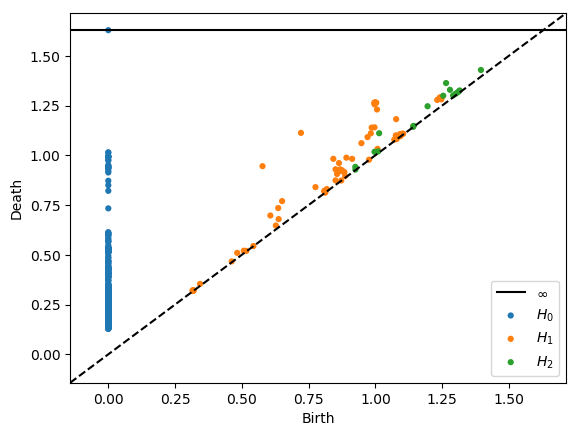

starting
(550, 50)
[[ 3.460e-01  6.470e-01  5.680e-01 ...  7.940e-01  1.043e+00  1.214e+00]
 [ 6.470e-01  5.680e-01  5.050e-01 ...  1.043e+00  1.214e+00  9.980e-01]
 [ 5.680e-01  5.050e-01  6.340e-01 ...  1.214e+00  9.980e-01  7.790e-01]
 ...
 [-6.900e-02 -6.200e-02 -5.100e-02 ...  3.500e-02  2.900e-02  1.500e-02]
 [-6.200e-02 -5.100e-02 -1.000e-03 ...  2.900e-02  1.500e-02 -5.000e-03]
 [-5.100e-02 -1.000e-03  9.000e-03 ...  1.500e-02 -5.000e-03 -2.900e-02]]
starting


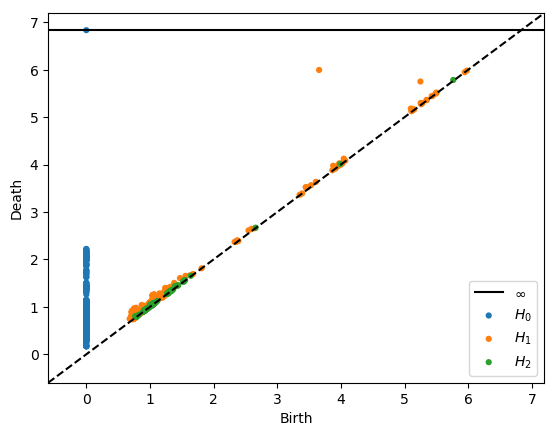

starting
(550, 50)
[[-0.209 -0.34  -0.337 ... -0.075 -0.075 -0.069]
 [-0.34  -0.337 -0.462 ... -0.075 -0.069 -0.07 ]
 [-0.337 -0.462 -0.017 ... -0.069 -0.07  -0.064]
 ...
 [ 0.373  0.129  0.074 ... -0.027  0.002  0.408]
 [ 0.129  0.074 -0.011 ...  0.002  0.408  0.923]
 [ 0.074 -0.011 -0.121 ...  0.408  0.923  0.663]]
starting


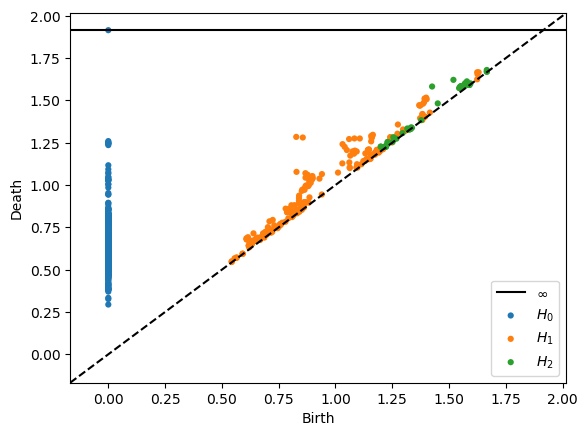

starting
(550, 50)
[[ 0.002  0.01   0.031 ...  0.025  0.03  -0.001]
 [ 0.01   0.031  0.011 ...  0.03  -0.001  0.065]
 [ 0.031  0.011 -0.073 ... -0.001  0.065  0.076]
 ...
 [ 0.068  0.045  0.028 ... -0.607 -0.329  0.433]
 [ 0.045  0.028  0.015 ... -0.329  0.433  0.313]
 [ 0.028  0.015  0.    ...  0.433  0.313  0.097]]
starting


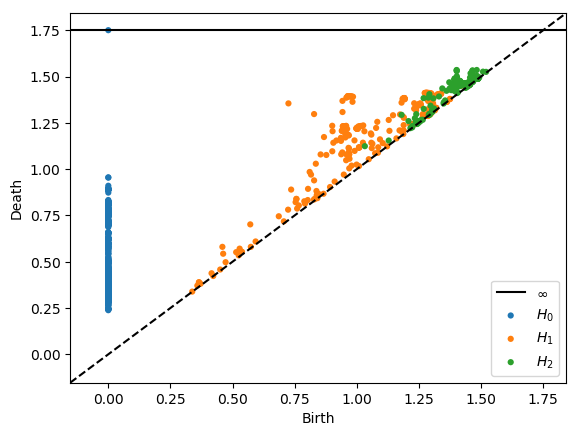

starting
(550, 50)
[[ 0.128  0.257  0.278 ... -0.092 -0.064 -0.036]
 [ 0.257  0.278  0.284 ... -0.064 -0.036 -0.014]
 [ 0.278  0.284  0.288 ... -0.036 -0.014  0.018]
 ...
 [ 0.063  0.055  0.042 ...  0.027  0.011 -0.021]
 [ 0.055  0.042  0.022 ...  0.011 -0.021 -0.033]
 [ 0.042  0.022 -0.005 ... -0.021 -0.033 -0.049]]
starting


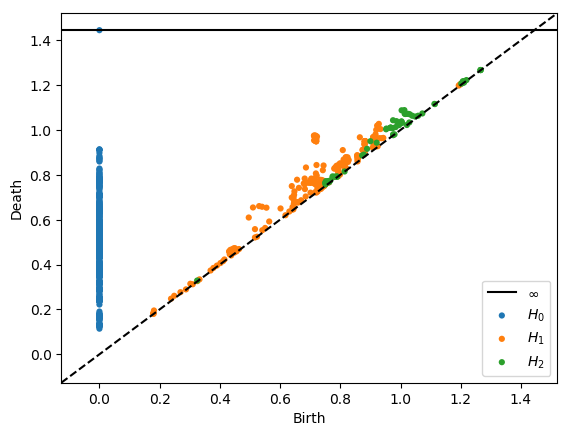

starting
(550, 50)
[[-0.055 -0.107 -0.091 ...  0.074 -0.273 -0.416]
 [-0.107 -0.091 -0.018 ... -0.273 -0.416 -0.138]
 [-0.091 -0.018  0.024 ... -0.416 -0.138 -0.032]
 ...
 [ 0.035  0.073  0.117 ...  0.023 -0.012 -0.019]
 [ 0.073  0.117  0.158 ... -0.012 -0.019 -0.019]
 [ 0.117  0.158  0.189 ... -0.019 -0.019 -0.013]]
starting


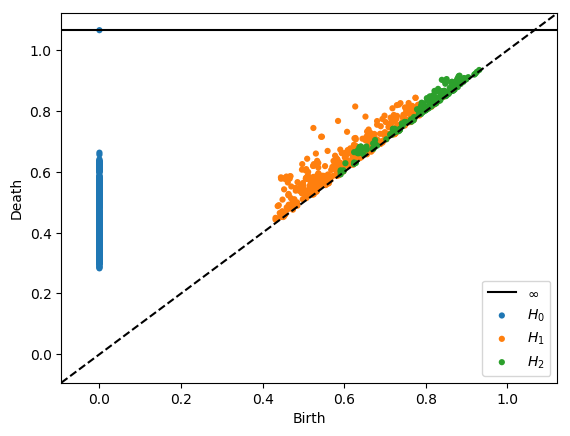

starting
(550, 50)
[[-0.334 -0.626 -0.634 ...  0.045 -0.02   0.032]
 [-0.626 -0.634 -0.622 ... -0.02   0.032  0.044]
 [-0.634 -0.622 -0.613 ...  0.032  0.044  0.053]
 ...
 [-0.063 -0.068 -0.068 ...  0.019  0.071 -0.117]
 [-0.068 -0.068 -0.061 ...  0.071 -0.117 -0.168]
 [-0.068 -0.061 -0.044 ... -0.117 -0.168 -0.042]]
starting


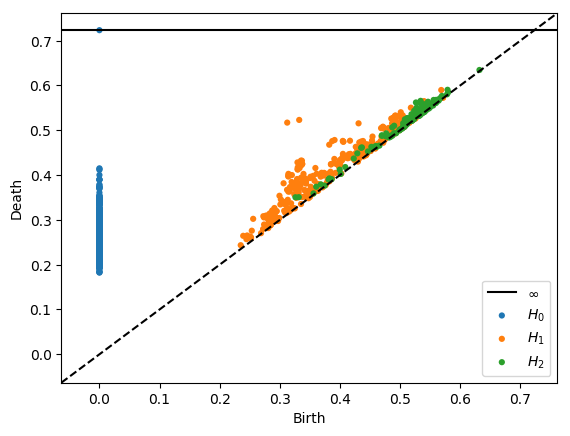

starting
(550, 50)
[[-0.012 -0.018 -0.043 ... -0.015 -0.021 -0.034]
 [-0.018 -0.043  0.026 ... -0.021 -0.034 -0.036]
 [-0.043  0.026  0.207 ... -0.034 -0.036 -0.032]
 ...
 [-0.02  -0.03  -0.023 ... -0.004 -0.036 -0.034]
 [-0.03  -0.023 -0.015 ... -0.036 -0.034 -0.028]
 [-0.023 -0.015 -0.029 ... -0.034 -0.028 -0.02 ]]
starting


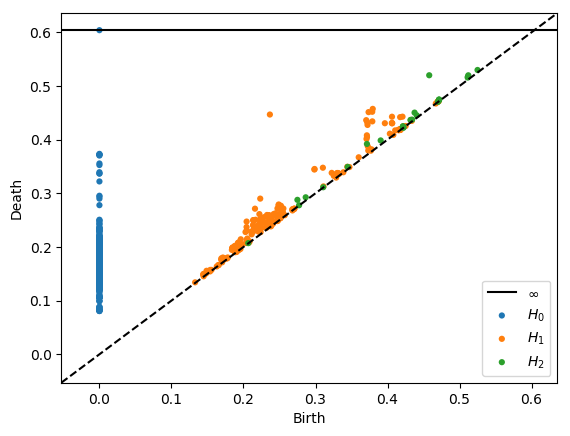

starting
(550, 50)
[[ 0.005  0.012  0.018 ...  0.021 -0.025 -0.053]
 [ 0.012  0.018  0.033 ... -0.025 -0.053 -0.054]
 [ 0.018  0.033  0.031 ... -0.053 -0.054 -0.026]
 ...
 [ 0.023  0.003  0.047 ... -0.002  0.087  0.099]
 [ 0.003  0.047  0.089 ...  0.087  0.099  0.109]
 [ 0.047  0.089  0.078 ...  0.099  0.109  0.115]]
starting


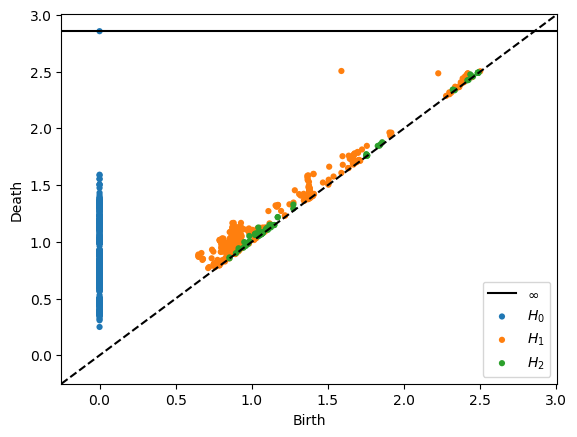

starting
(550, 50)
[[ 0.537  0.963  0.942 ...  0.777  1.277  1.052]
 [ 0.963  0.942  0.931 ...  1.277  1.052  0.308]
 [ 0.942  0.931  0.916 ...  1.052  0.308  0.223]
 ...
 [ 0.378  0.119 -0.216 ...  0.035  0.097  0.163]
 [ 0.119 -0.216 -0.353 ...  0.097  0.163  0.247]
 [-0.216 -0.353 -0.266 ...  0.163  0.247  0.274]]
starting


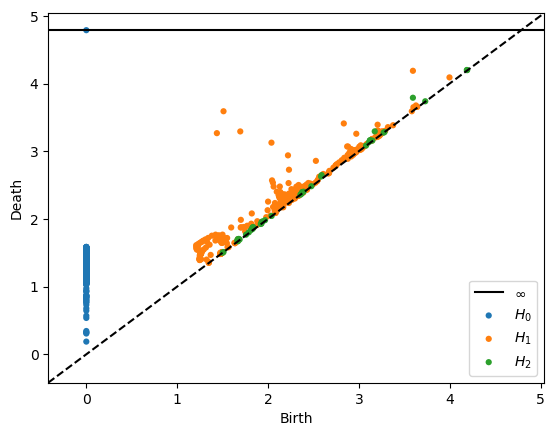

starting
(550, 50)
[[-0.126 -0.234 -0.226 ... -0.334 -0.332 -0.286]
 [-0.234 -0.226 -0.216 ... -0.332 -0.286 -0.247]
 [-0.226 -0.216 -0.204 ... -0.286 -0.247 -0.212]
 ...
 [ 0.049  0.061  0.088 ...  0.034  0.005 -0.007]
 [ 0.061  0.088  0.129 ...  0.005 -0.007 -0.01 ]
 [ 0.088  0.129  0.111 ... -0.007 -0.01  -0.012]]
starting


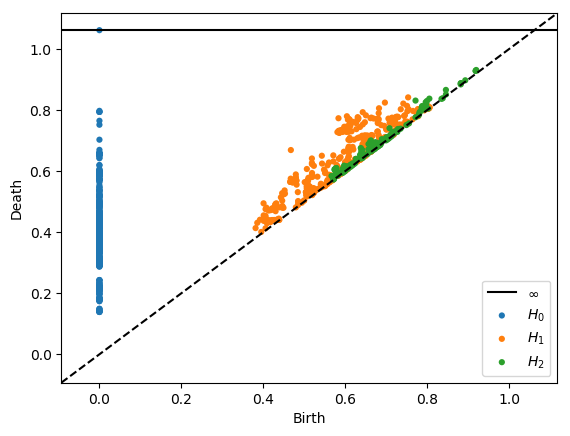

starting
(550, 50)
[[-0.024 -0.096 -0.121 ... -0.088 -0.037 -0.007]
 [-0.096 -0.121 -0.181 ... -0.037 -0.007  0.007]
 [-0.121 -0.181 -0.226 ... -0.007  0.007  0.016]
 ...
 [ 0.044  0.057  0.063 ...  0.001  0.054  0.065]
 [ 0.057  0.063  0.059 ...  0.054  0.065  0.028]
 [ 0.063  0.059  0.054 ...  0.065  0.028 -0.058]]
starting


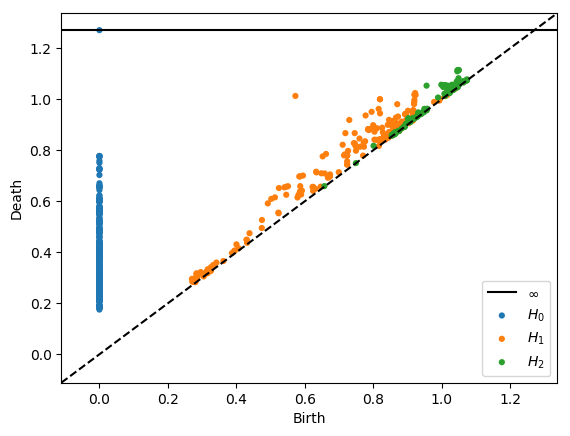

starting
(550, 50)
[[ 0.159  0.28   0.098 ...  0.247  0.26   0.274]
 [ 0.28   0.098 -0.133 ...  0.26   0.274  0.291]
 [ 0.098 -0.133 -0.281 ...  0.274  0.291  0.302]
 ...
 [ 0.215  0.223  0.231 ... -0.115 -0.126 -0.136]
 [ 0.223  0.231  0.234 ... -0.126 -0.136 -0.146]
 [ 0.231  0.234  0.237 ... -0.136 -0.146 -0.148]]
starting


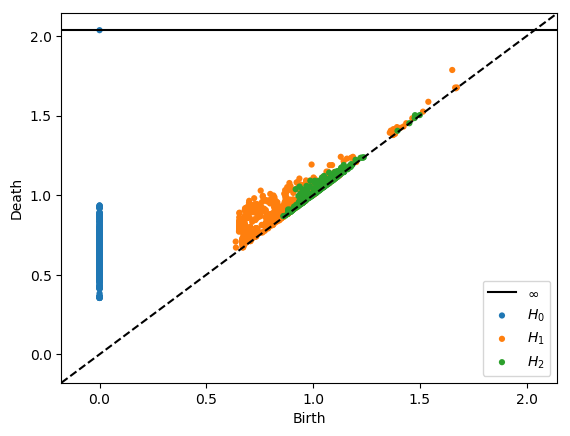

starting
(550, 50)
[[-0.024 -0.071 -0.074 ... -0.008 -0.002  0.001]
 [-0.071 -0.074 -0.043 ... -0.002  0.001 -0.008]
 [-0.074 -0.043 -0.039 ...  0.001 -0.008 -0.022]
 ...
 [-0.068 -0.071 -0.052 ...  0.157  0.08   0.02 ]
 [-0.071 -0.052 -0.02  ...  0.08   0.02  -0.007]
 [-0.052 -0.02  -0.023 ...  0.02  -0.007 -0.046]]
starting


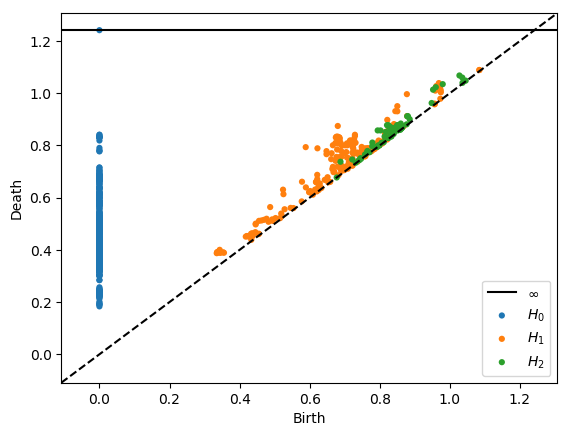

starting
(550, 50)
[[-0.015 -0.019 -0.048 ...  0.082  0.076  0.058]
 [-0.019 -0.048 -0.068 ...  0.076  0.058  0.035]
 [-0.048 -0.068 -0.077 ...  0.058  0.035  0.009]
 ...
 [ 0.063  0.07   0.044 ...  0.027  0.031  0.038]
 [ 0.07   0.044  0.034 ...  0.031  0.038  0.065]
 [ 0.044  0.034  0.032 ...  0.038  0.065  0.054]]
starting


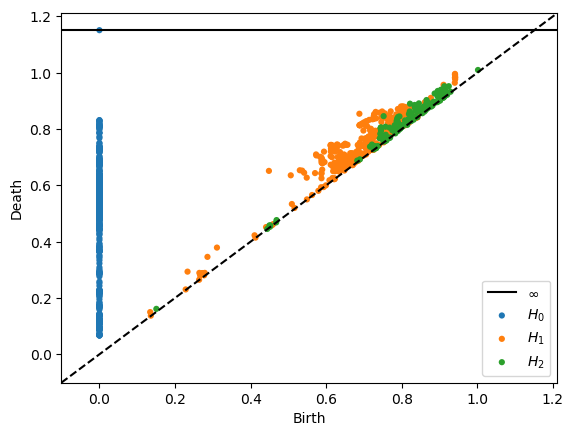

starting
(550, 50)
[[-1.04  -1.85  -1.658 ... -0.486 -0.468 -0.472]
 [-1.85  -1.658 -1.64  ... -0.468 -0.472 -0.803]
 [-1.658 -1.64  -1.629 ... -0.472 -0.803 -1.   ]
 ...
 [-0.004  0.021  0.062 ...  0.     0.008  0.017]
 [ 0.021  0.062  0.108 ...  0.008  0.017 -0.023]
 [ 0.062  0.108  0.099 ...  0.017 -0.023 -0.045]]
starting


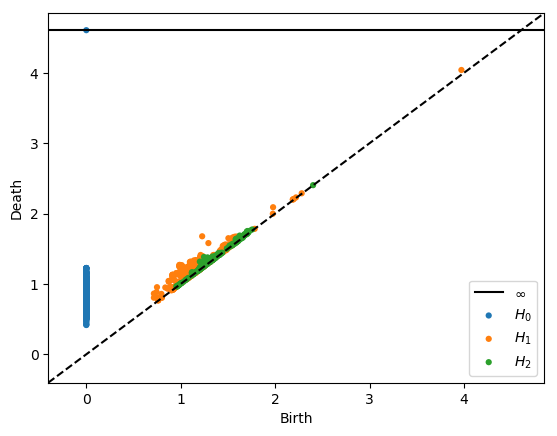

starting
(550, 50)
[[-0.617 -1.097 -1.035 ...  0.236  0.19   0.134]
 [-1.097 -1.035 -0.47  ...  0.19   0.134  0.088]
 [-1.035 -0.47   0.224 ...  0.134  0.088  0.061]
 ...
 [-0.088 -0.135 -0.131 ...  0.411  1.204  0.173]
 [-0.135 -0.131  0.01  ...  1.204  0.173 -0.144]
 [-0.131  0.01   0.158 ...  0.173 -0.144 -0.165]]
starting


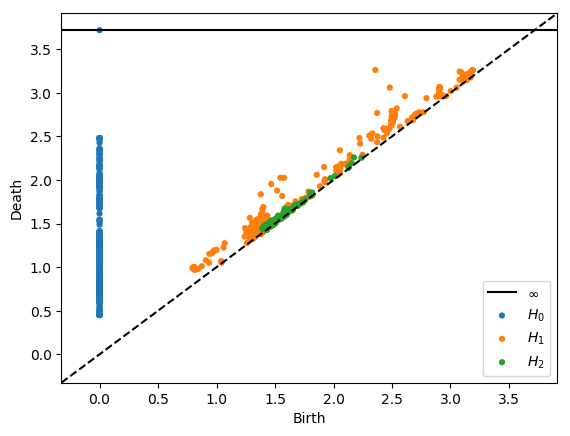

starting
(550, 50)
[[ 0.082  0.183  0.218 ...  0.093  0.097  0.109]
 [ 0.183  0.218  0.265 ...  0.097  0.109  0.085]
 [ 0.218  0.265  0.282 ...  0.109  0.085  0.053]
 ...
 [-0.04  -0.023  0.    ...  0.468  0.631 -0.196]
 [-0.023  0.    -0.007 ...  0.631 -0.196 -0.044]
 [ 0.    -0.007 -0.019 ... -0.196 -0.044 -0.048]]
starting


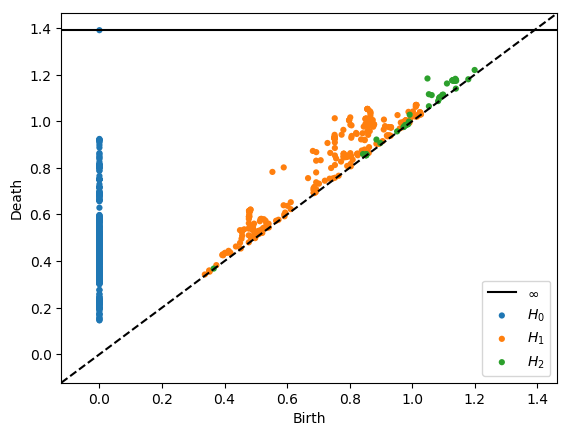

starting
(550, 50)
[[-0.044 -0.133 -0.286 ... -0.046 -0.099 -0.28 ]
 [-0.133 -0.286 -0.52  ... -0.099 -0.28  -0.399]
 [-0.286 -0.52  -0.39  ... -0.28  -0.399 -0.105]
 ...
 [-0.009 -0.051 -0.256 ... -0.049 -0.156 -0.583]
 [-0.051 -0.256 -0.543 ... -0.156 -0.583 -0.229]
 [-0.256 -0.543  0.106 ... -0.583 -0.229  0.14 ]]
starting


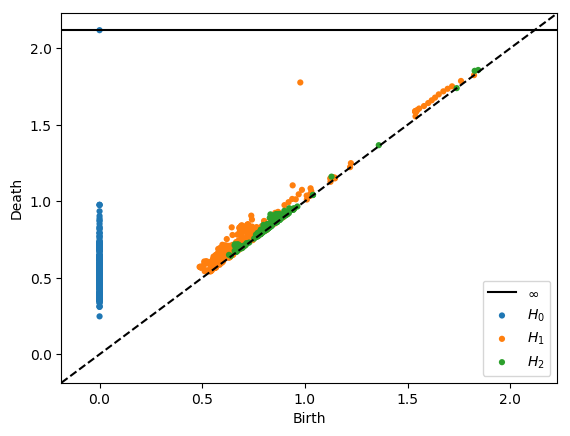

starting
(550, 50)
[[ 0.3    0.277 -0.037 ...  0.005  0.027  0.053]
 [ 0.277 -0.037 -0.117 ...  0.027  0.053  0.079]
 [-0.037 -0.117 -0.124 ...  0.053  0.079  0.118]
 ...
 [-0.021 -0.027 -0.032 ... -0.017 -0.022 -0.029]
 [-0.027 -0.032 -0.045 ... -0.022 -0.029 -0.012]
 [-0.032 -0.045 -0.055 ... -0.029 -0.012 -0.008]]
starting


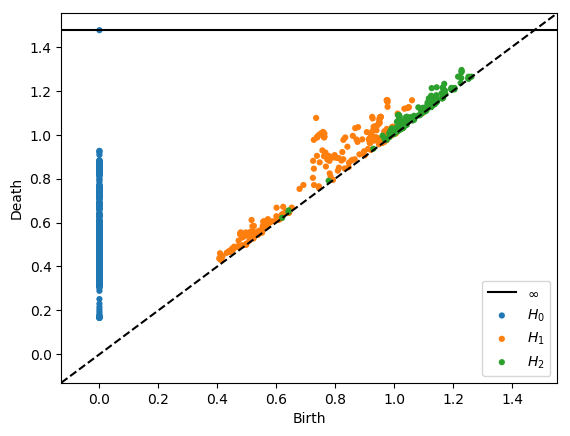

starting
(550, 50)
[[-0.701 -1.296 -1.23  ... -0.178 -0.214 -0.262]
 [-1.296 -1.23  -1.174 ... -0.214 -0.262 -0.266]
 [-1.23  -1.174 -1.069 ... -0.262 -0.266 -0.207]
 ...
 [-0.086 -0.076 -0.069 ...  0.015 -0.026 -0.076]
 [-0.076 -0.069 -0.066 ... -0.026 -0.076 -0.15 ]
 [-0.069 -0.066 -0.064 ... -0.076 -0.15  -0.183]]
starting


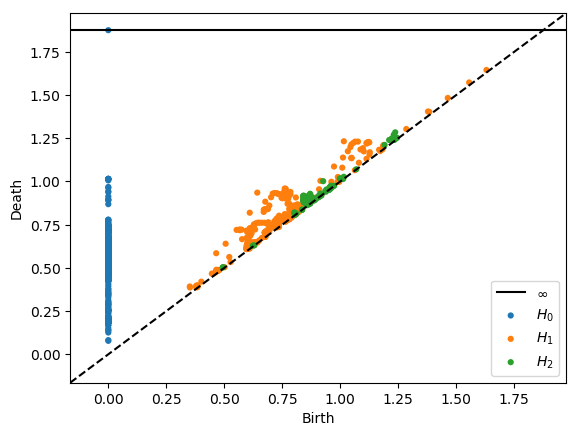

starting
(550, 50)
[[-0.338 -0.643 -0.668 ...  0.005  0.034  0.028]
 [-0.643 -0.668 -0.659 ...  0.034  0.028  0.013]
 [-0.668 -0.659 -0.62  ...  0.028  0.013  0.002]
 ...
 [ 0.012  0.027  0.017 ...  0.009 -0.011 -0.006]
 [ 0.027  0.017  0.006 ... -0.011 -0.006  0.007]
 [ 0.017  0.006  0.012 ... -0.006  0.007  0.036]]
starting


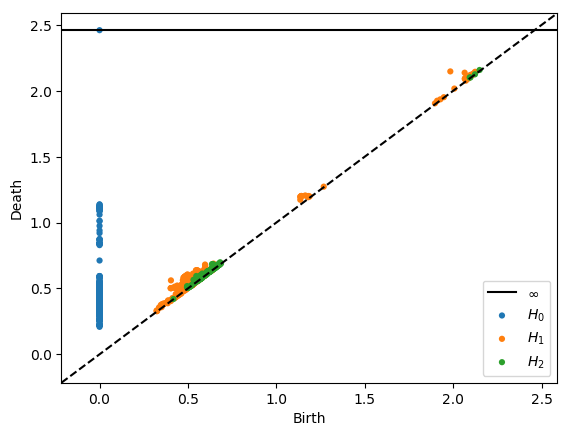

starting
(550, 50)
[[ 0.216  0.534  0.831 ... -0.146 -0.13   0.177]
 [ 0.534  0.831  1.276 ... -0.13   0.177  0.418]
 [ 0.831  1.276  1.643 ...  0.177  0.418 -0.21 ]
 ...
 [-0.184 -0.17  -0.154 ... -0.1   -0.15  -0.171]
 [-0.17  -0.154 -0.037 ... -0.15  -0.171 -0.166]
 [-0.154 -0.037  0.489 ... -0.171 -0.166 -0.156]]
starting


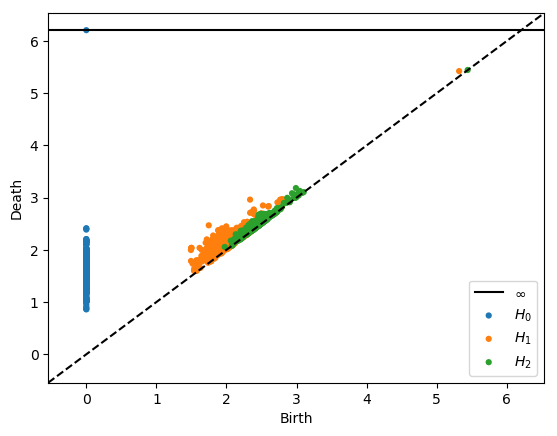

starting
(550, 50)
[[ 0.583  1.111  1.085 ... -0.127 -0.195 -0.226]
 [ 1.111  1.085  1.043 ... -0.195 -0.226 -0.23 ]
 [ 1.085  1.043  1.024 ... -0.226 -0.23  -0.218]
 ...
 [-0.09  -0.089 -0.086 ...  0.067  0.039  0.041]
 [-0.089 -0.086 -0.063 ...  0.039  0.041  0.147]
 [-0.086 -0.063  0.025 ...  0.041  0.147  0.353]]
starting


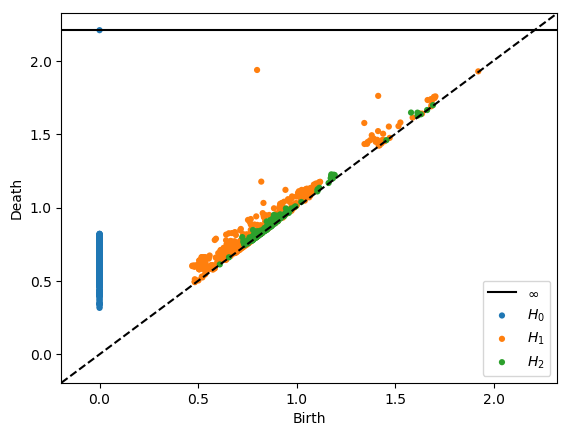

starting
(550, 50)
[[ 0.14   0.124 -0.125 ...  0.564  0.908  0.964]
 [ 0.124 -0.125 -0.379 ...  0.908  0.964  0.861]
 [-0.125 -0.379 -0.534 ...  0.964  0.861  0.426]
 ...
 [ 0.107  0.157  0.167 ... -0.046 -0.009 -0.047]
 [ 0.157  0.167  0.156 ... -0.009 -0.047 -0.253]
 [ 0.167  0.156  0.125 ... -0.047 -0.253 -0.198]]
starting


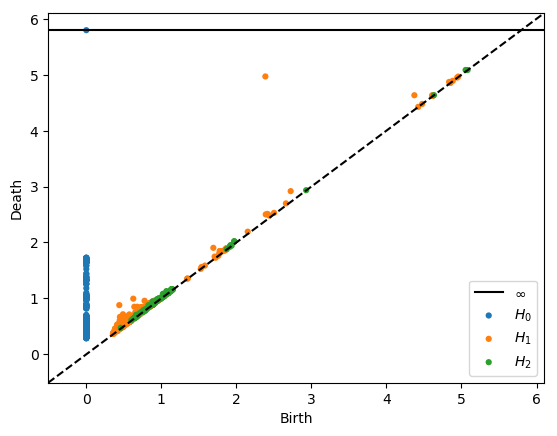

starting
(550, 50)
[[ 0.337  0.572  0.564 ... -0.099 -0.113 -0.133]
 [ 0.572  0.564  0.56  ... -0.113 -0.133 -0.217]
 [ 0.564  0.56   0.552 ... -0.133 -0.217 -0.051]
 ...
 [-0.571 -0.537 -0.526 ... -0.096 -0.082 -0.08 ]
 [-0.537 -0.526 -0.505 ... -0.082 -0.08  -0.108]
 [-0.526 -0.505 -0.463 ... -0.08  -0.108 -0.133]]
starting


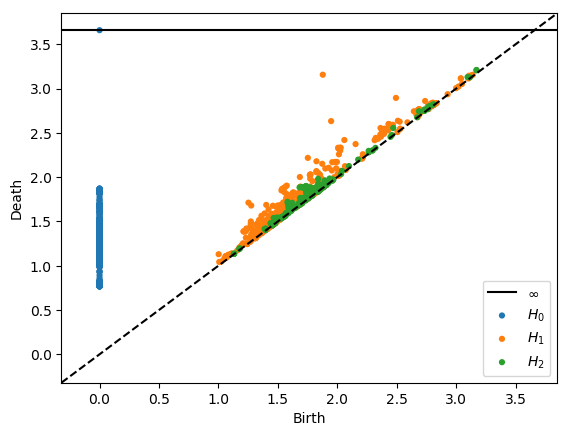

starting
(550, 50)
[[-0.151 -0.372 -0.507 ...  0.3    0.289  0.215]
 [-0.372 -0.507 -0.549 ...  0.289  0.215  0.114]
 [-0.507 -0.549 -0.555 ...  0.215  0.114  0.037]
 ...
 [ 0.353 -0.032  0.052 ... -0.088  0.005  0.287]
 [-0.032  0.052  0.033 ...  0.005  0.287  0.042]
 [ 0.052  0.033  0.019 ...  0.287  0.042 -0.002]]
starting


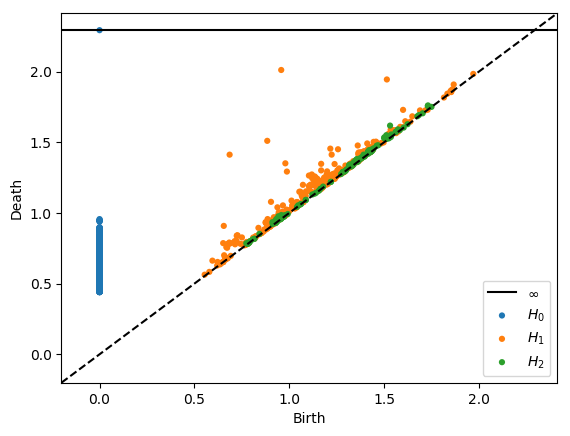

starting
(550, 50)
[[ 0.169  0.299  0.3   ... -0.262 -0.138 -0.12 ]
 [ 0.299  0.3    0.294 ... -0.138 -0.12  -0.116]
 [ 0.3    0.294  0.286 ... -0.12  -0.116 -0.108]
 ...
 [ 0.347  0.897  0.065 ... -0.005 -0.008 -0.007]
 [ 0.897  0.065 -0.203 ... -0.008 -0.007 -0.003]
 [ 0.065 -0.203 -0.053 ... -0.007 -0.003  0.   ]]
starting


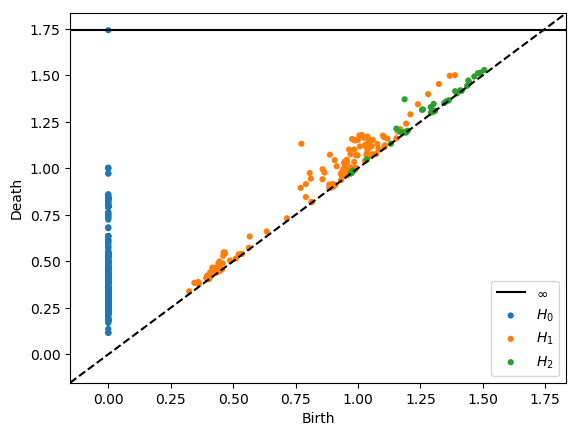

starting
(550, 50)
[[-0.353 -0.715 -0.762 ...  0.035  0.03   0.027]
 [-0.715 -0.762 -0.777 ...  0.03   0.027  0.028]
 [-0.762 -0.777 -0.745 ...  0.027  0.028  0.029]
 ...
 [ 0.013 -0.059 -0.133 ...  0.097  0.09   0.085]
 [-0.059 -0.133 -0.175 ...  0.09   0.085  0.078]
 [-0.133 -0.175 -0.163 ...  0.085  0.078  0.063]]
starting


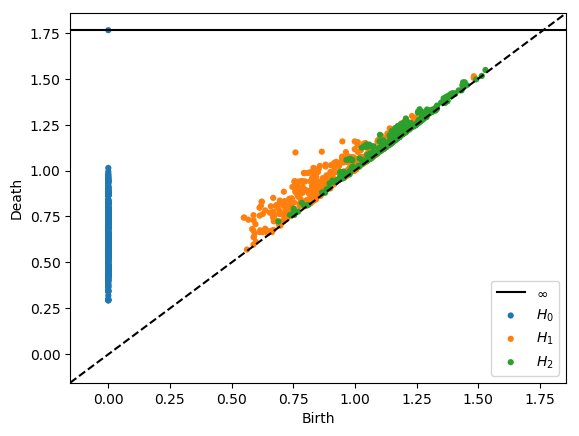

starting
(550, 50)
[[-0.052 -0.05  -0.031 ... -0.081 -0.074 -0.047]
 [-0.05  -0.031 -0.079 ... -0.074 -0.047 -0.045]
 [-0.031 -0.079 -0.056 ... -0.047 -0.045 -0.025]
 ...
 [-0.049 -0.005  0.023 ...  0.042  0.031  0.04 ]
 [-0.005  0.023  0.02  ...  0.031  0.04   0.051]
 [ 0.023  0.02  -0.002 ...  0.04   0.051  0.062]]
starting


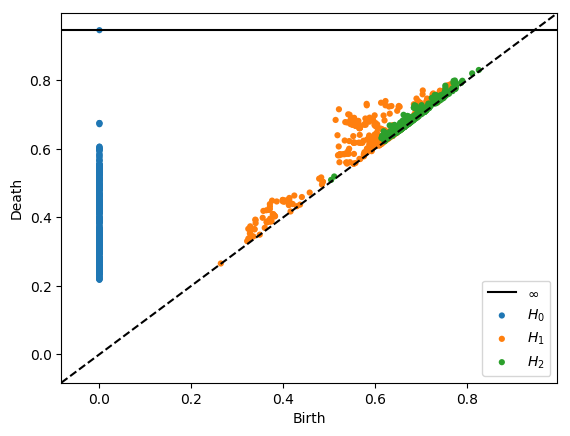

starting
(550, 50)
[[ 0.351  0.481 -0.274 ... -0.977 -0.964 -1.114]
 [ 0.481 -0.274 -0.844 ... -0.964 -1.114 -1.252]
 [-0.274 -0.844 -0.805 ... -1.114 -1.252 -1.328]
 ...
 [-0.197  0.065 -0.153 ...  0.512  0.521  0.48 ]
 [ 0.065 -0.153 -0.504 ...  0.521  0.48   0.27 ]
 [-0.153 -0.504 -0.554 ...  0.48   0.27  -0.173]]
starting


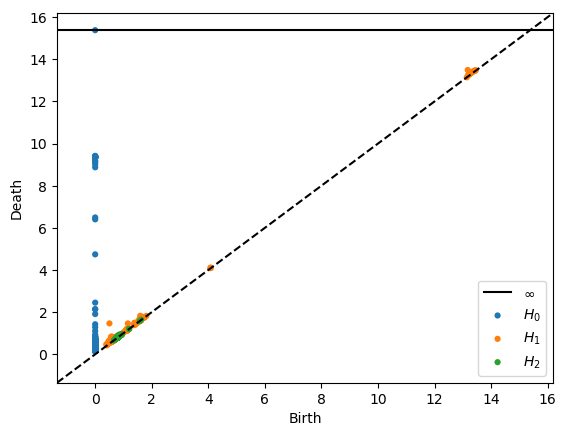

starting
(550, 50)
[[-0.03  -0.047 -0.069 ...  0.013  0.003  0.   ]
 [-0.047 -0.069 -0.076 ...  0.003  0.    -0.001]
 [-0.069 -0.076 -0.08  ...  0.    -0.001 -0.006]
 ...
 [ 0.017  0.028  0.247 ...  0.264  0.273  0.278]
 [ 0.028  0.247  0.703 ...  0.273  0.278  0.284]
 [ 0.247  0.703 -0.255 ...  0.278  0.284  0.287]]
starting


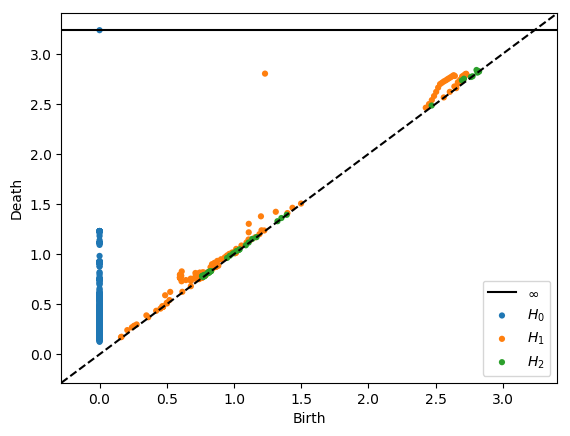

starting
(550, 50)
[[ 2.89   4.262  0.871 ...  0.315  0.27   0.254]
 [ 4.262  0.871 -1.249 ...  0.27   0.254  0.258]
 [ 0.871 -1.249 -1.768 ...  0.254  0.258  0.283]
 ...
 [-0.084 -0.097 -0.087 ... -0.092 -0.079 -0.067]
 [-0.097 -0.087 -0.058 ... -0.079 -0.067 -0.046]
 [-0.087 -0.058 -0.031 ... -0.067 -0.046  0.009]]
starting


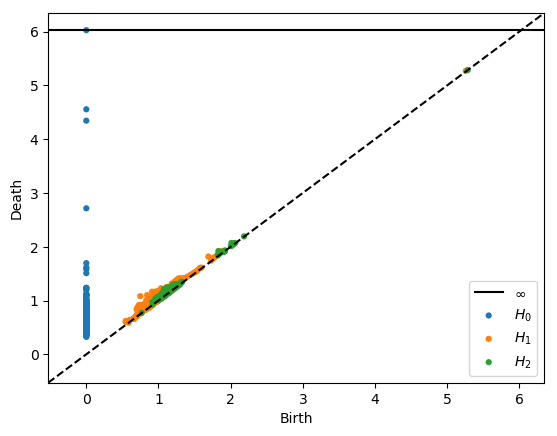

starting
(550, 50)
[[-0.454 -0.813 -0.765 ... -0.165  0.052  0.341]
 [-0.813 -0.765 -0.709 ...  0.052  0.341  0.   ]
 [-0.765 -0.709 -0.643 ...  0.341  0.    -0.269]
 ...
 [ 0.025 -0.008 -0.077 ...  0.653  0.055  0.015]
 [-0.008 -0.077 -0.128 ...  0.055  0.015 -0.001]
 [-0.077 -0.128 -0.151 ...  0.015 -0.001 -0.059]]
starting


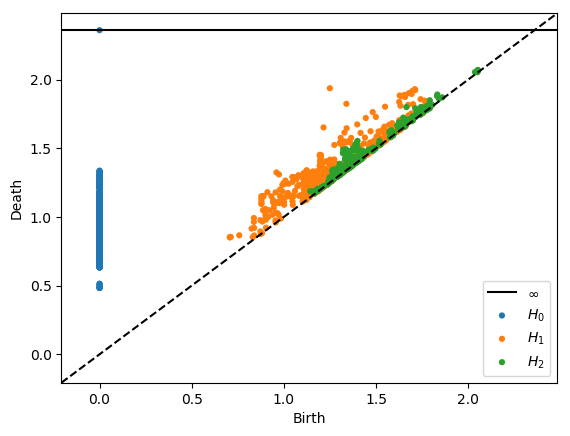

starting
(550, 50)
[[-0.158 -0.272 -0.276 ... -0.041 -0.032 -0.021]
 [-0.272 -0.276 -0.26  ... -0.032 -0.021 -0.018]
 [-0.276 -0.26  -0.253 ... -0.021 -0.018 -0.021]
 ...
 [-0.031 -0.025 -0.008 ...  0.016  0.069  0.112]
 [-0.025 -0.008  0.006 ...  0.069  0.112  0.122]
 [-0.008  0.006  0.015 ...  0.112  0.122  0.111]]
starting


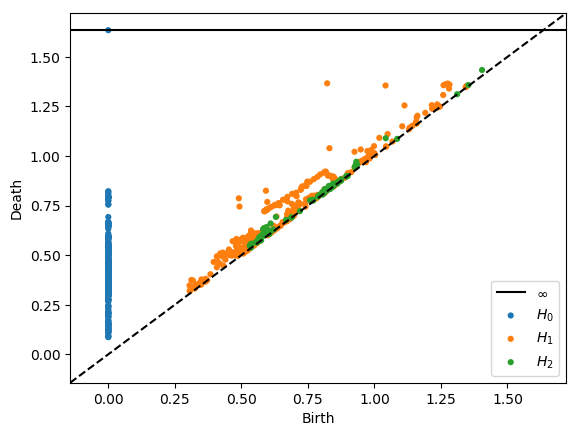

starting
(550, 50)
[[ 0.022  0.127  0.138 ...  0.016 -0.027 -0.04 ]
 [ 0.127  0.138  0.058 ... -0.027 -0.04  -0.045]
 [ 0.138  0.058  0.068 ... -0.04  -0.045 -0.049]
 ...
 [-0.023 -0.034 -0.039 ...  0.056  0.048  0.042]
 [-0.034 -0.039 -0.042 ...  0.048  0.042  0.018]
 [-0.039 -0.042 -0.044 ...  0.042  0.018  0.   ]]
starting


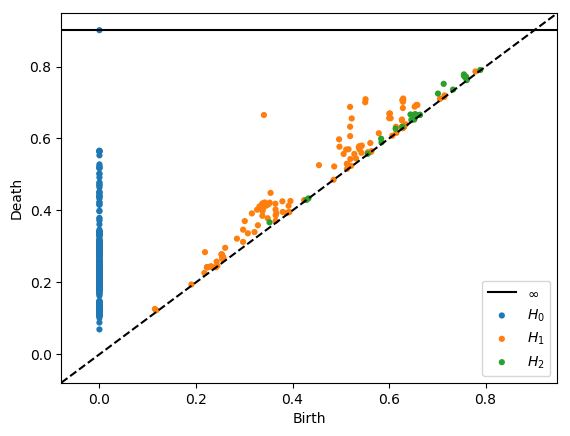

starting
(550, 50)
[[-0.193 -0.342 -0.349 ...  0.035  0.235  0.028]
 [-0.342 -0.349 -0.35  ...  0.235  0.028 -0.282]
 [-0.349 -0.35  -0.341 ...  0.028 -0.282 -0.172]
 ...
 [ 0.022 -0.015 -0.042 ... -0.054 -0.054 -0.054]
 [-0.015 -0.042 -0.045 ... -0.054 -0.054 -0.052]
 [-0.042 -0.045 -0.047 ... -0.054 -0.052 -0.064]]
starting


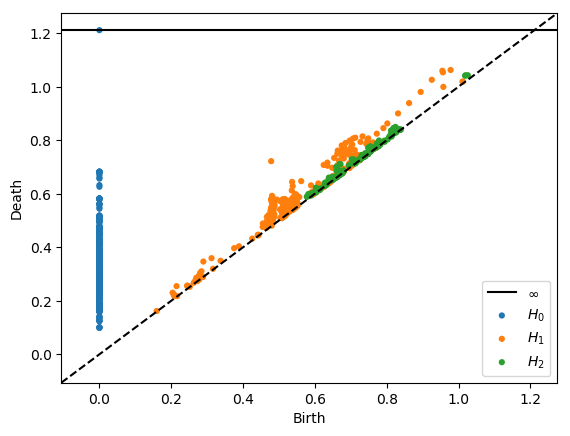

starting
(550, 50)
[[ 0.06   0.171  0.169 ...  0.352  0.376  0.412]
 [ 0.171  0.169  0.133 ...  0.376  0.412  0.427]
 [ 0.169  0.133  0.115 ...  0.412  0.427  0.431]
 ...
 [-0.138 -0.166 -0.173 ...  0.264  0.287  0.303]
 [-0.166 -0.173 -0.177 ...  0.287  0.303  0.26 ]
 [-0.173 -0.177 -0.179 ...  0.303  0.26   0.219]]
starting


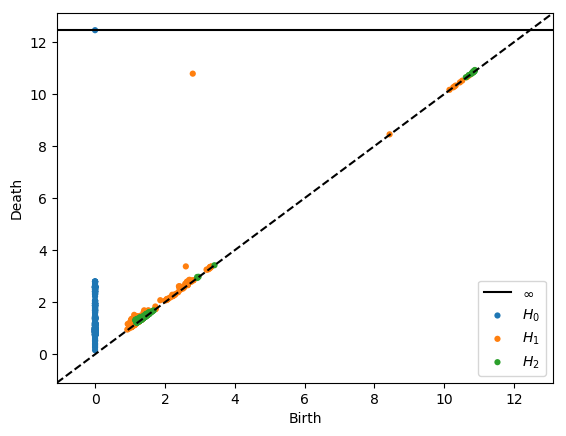

starting
(550, 50)
[[ 0.023  0.055  0.047 ... -0.11  -0.092 -0.078]
 [ 0.055  0.047 -0.037 ... -0.092 -0.078 -0.112]
 [ 0.047 -0.037 -0.065 ... -0.078 -0.112 -0.195]
 ...
 [-0.012 -0.014 -0.016 ... -0.019  0.002 -0.025]
 [-0.014 -0.016 -0.025 ...  0.002 -0.025 -0.004]
 [-0.016 -0.025 -0.029 ... -0.025 -0.004 -0.001]]
starting


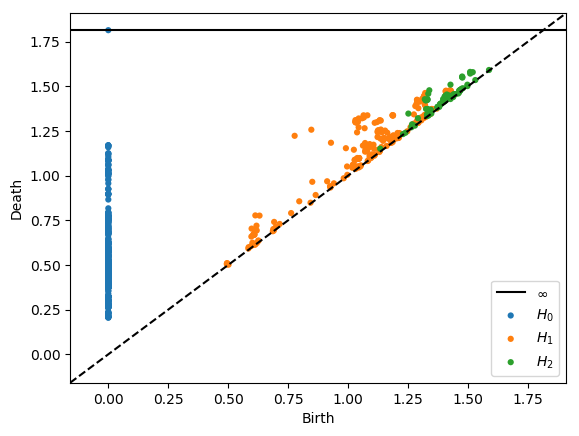

starting
(550, 50)
[[ 0.555  0.702  0.057 ...  0.013 -0.031 -0.027]
 [ 0.702  0.057 -0.028 ... -0.031 -0.027  0.581]
 [ 0.057 -0.028 -0.085 ... -0.027  0.581  0.478]
 ...
 [-0.079 -0.065 -0.002 ...  0.016  0.035  0.033]
 [-0.065 -0.002 -0.092 ...  0.035  0.033  0.023]
 [-0.002 -0.092 -0.108 ...  0.033  0.023  0.019]]
starting


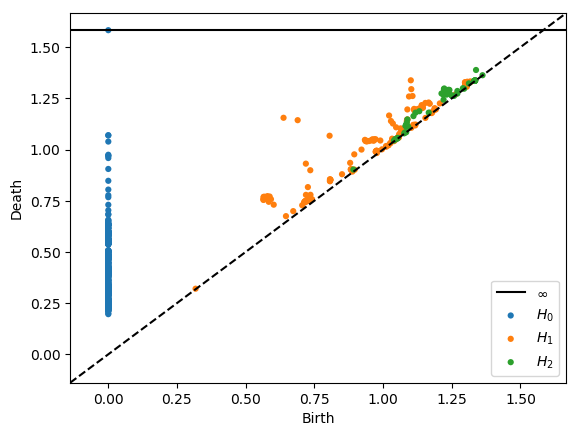

starting
(550, 50)
[[ 0.085  0.2    0.041 ...  0.188  0.031 -0.119]
 [ 0.2    0.041 -0.142 ...  0.031 -0.119 -0.134]
 [ 0.041 -0.142 -0.143 ... -0.119 -0.134 -0.047]
 ...
 [-0.033 -0.033  0.065 ... -0.075 -0.003  0.084]
 [-0.033  0.065  0.142 ... -0.003  0.084  0.184]
 [ 0.065  0.142  0.203 ...  0.084  0.184  0.228]]
starting


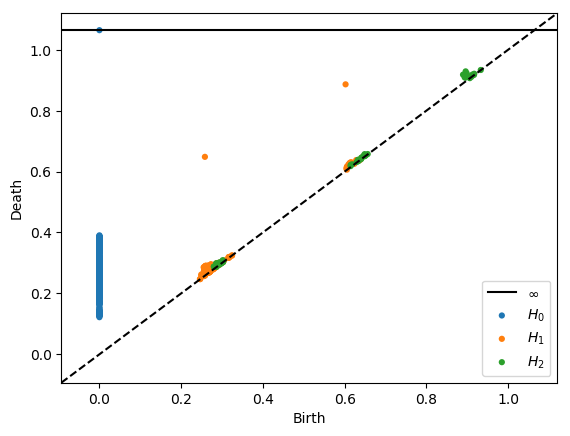

starting
(550, 50)
[[-0.632 -1.196 -1.133 ...  0.11   0.119  0.111]
 [-1.196 -1.133 -1.018 ...  0.119  0.111  0.075]
 [-1.133 -1.018 -0.88  ...  0.111  0.075 -0.035]
 ...
 [ 0.151  0.158  0.146 ... -0.019  0.054  0.768]
 [ 0.158  0.146  0.03  ...  0.054  0.768  0.082]
 [ 0.146  0.03  -0.048 ...  0.768  0.082 -0.297]]
starting


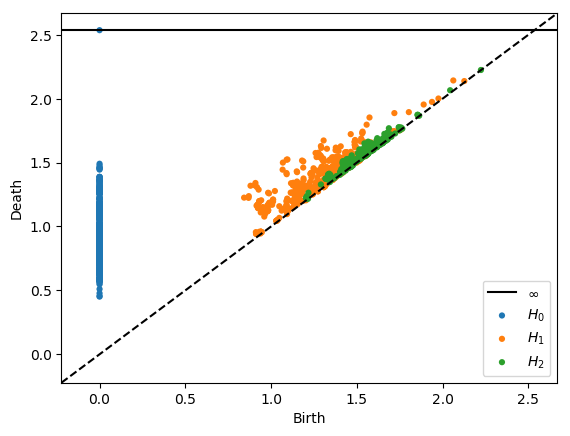

starting
(550, 50)
[[-0.017  0.027  0.011 ...  0.009  0.029 -0.041]
 [ 0.027  0.011  0.042 ...  0.029 -0.041 -0.113]
 [ 0.011  0.042  0.039 ... -0.041 -0.113 -0.125]
 ...
 [-0.009  0.009  0.42  ... -0.01   0.018 -0.006]
 [ 0.009  0.42   0.791 ...  0.018 -0.006 -0.023]
 [ 0.42   0.791 -0.31  ... -0.006 -0.023 -0.03 ]]
starting


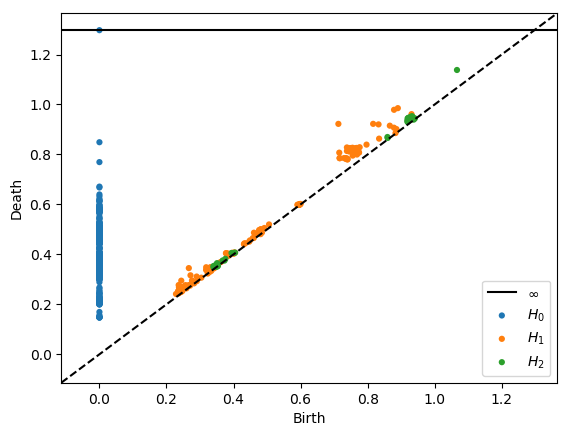

starting
(550, 50)
[[-0.175 -0.123  0.276 ...  0.08   0.078  0.079]
 [-0.123  0.276  0.071 ...  0.078  0.079  0.072]
 [ 0.276  0.071 -0.267 ...  0.079  0.072  0.087]
 ...
 [ 0.402 -0.303 -0.396 ... -0.058 -0.061  0.042]
 [-0.303 -0.396 -0.37  ... -0.061  0.042  0.662]
 [-0.396 -0.37  -0.297 ...  0.042  0.662  0.224]]
starting


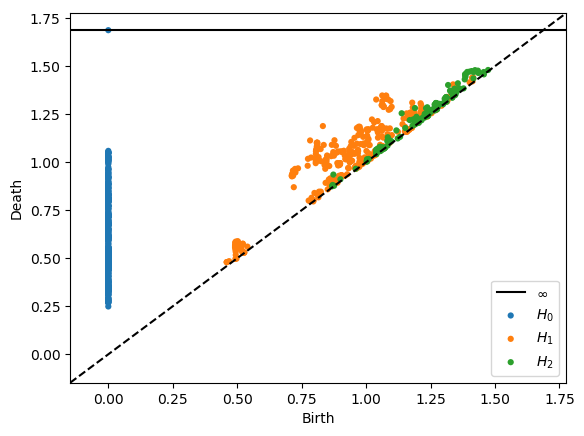

starting
(550, 50)
[[-0.023 -0.084 -0.153 ...  0.565  0.069 -0.315]
 [-0.084 -0.153 -0.196 ...  0.069 -0.315 -0.333]
 [-0.153 -0.196 -0.203 ... -0.315 -0.333 -0.314]
 ...
 [-0.104 -0.058 -0.027 ... -0.236 -0.15  -0.098]
 [-0.058 -0.027  0.137 ... -0.15  -0.098 -0.034]
 [-0.027  0.137  0.694 ... -0.098 -0.034  0.015]]
starting


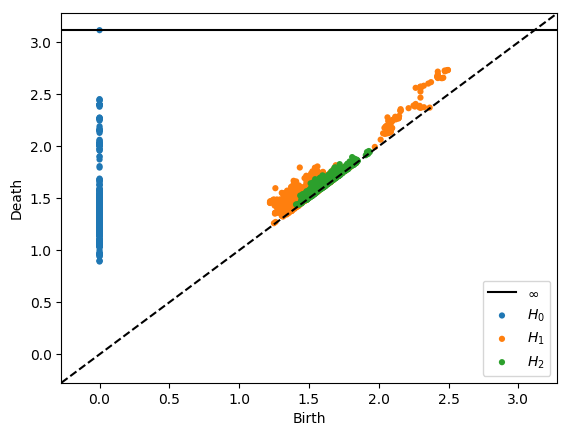

starting
(550, 50)
[[ 0.109  0.305  0.357 ... -0.153 -0.152 -0.143]
 [ 0.305  0.357  0.367 ... -0.152 -0.143 -0.104]
 [ 0.357  0.367  0.356 ... -0.143 -0.104 -0.041]
 ...
 [ 0.048  0.04   0.029 ...  0.084  0.071  0.059]
 [ 0.04   0.029  0.021 ...  0.071  0.059  0.04 ]
 [ 0.029  0.021  0.011 ...  0.059  0.04   0.023]]
starting


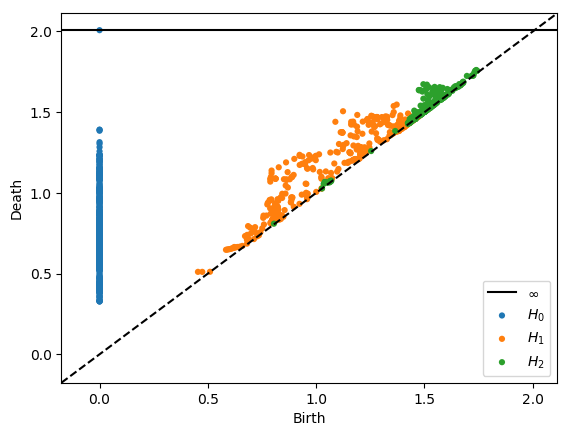

starting
(550, 50)
[[ 1.119e+00  1.771e+00  1.094e+00 ... -8.380e-01 -9.380e-01 -9.600e-01]
 [ 1.771e+00  1.094e+00  3.800e-01 ... -9.380e-01 -9.600e-01 -9.500e-01]
 [ 1.094e+00  3.800e-01 -3.890e-01 ... -9.600e-01 -9.500e-01 -8.470e-01]
 ...
 [ 0.000e+00  0.000e+00  1.000e-03 ...  1.720e-01  1.030e-01  2.300e-02]
 [ 0.000e+00  1.000e-03  6.000e-03 ...  1.030e-01  2.300e-02 -4.200e-02]
 [ 1.000e-03  6.000e-03  3.080e-01 ...  2.300e-02 -4.200e-02 -3.600e-02]]
starting


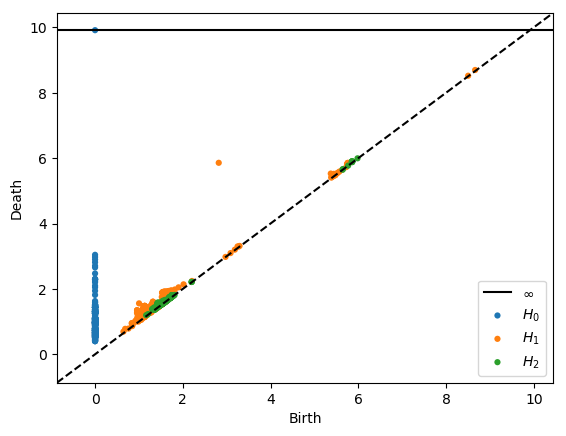

starting
(550, 50)
[[ 0.227  0.396  0.378 ... -0.024 -0.366 -0.567]
 [ 0.396  0.378  0.352 ... -0.366 -0.567 -0.101]
 [ 0.378  0.352  0.323 ... -0.567 -0.101 -0.006]
 ...
 [ 0.026  0.014  0.014 ...  0.115  0.083  0.062]
 [ 0.014  0.014  0.02  ...  0.083  0.062  0.053]
 [ 0.014  0.02   0.025 ...  0.062  0.053  0.049]]
starting


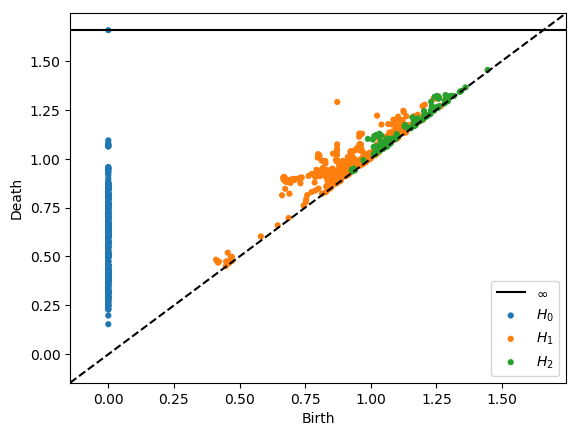

starting
(550, 50)
[[ 0.22   0.666  0.86  ...  0.098  0.119  0.127]
 [ 0.666  0.86   0.896 ...  0.119  0.127  0.129]
 [ 0.86   0.896  0.907 ...  0.127  0.129  0.128]
 ...
 [-0.025 -0.058 -0.112 ...  0.093  0.082  0.063]
 [-0.058 -0.112 -0.123 ...  0.082  0.063  0.082]
 [-0.112 -0.123 -0.129 ...  0.063  0.082  0.123]]
starting


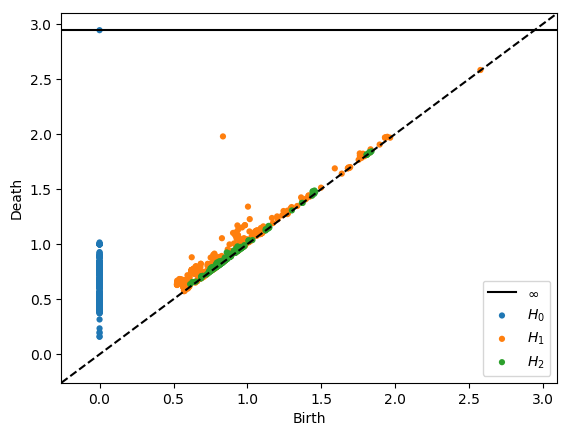

starting
(550, 50)
[[ 0.607  0.592  0.227 ...  0.673  0.204 -0.282]
 [ 0.592  0.227  0.298 ...  0.204 -0.282 -0.214]
 [ 0.227  0.298  0.326 ... -0.282 -0.214 -0.139]
 ...
 [ 0.055  0.174  0.248 ... -0.044 -0.033 -0.024]
 [ 0.174  0.248  0.242 ... -0.033 -0.024 -0.012]
 [ 0.248  0.242  0.192 ... -0.024 -0.012 -0.019]]
starting


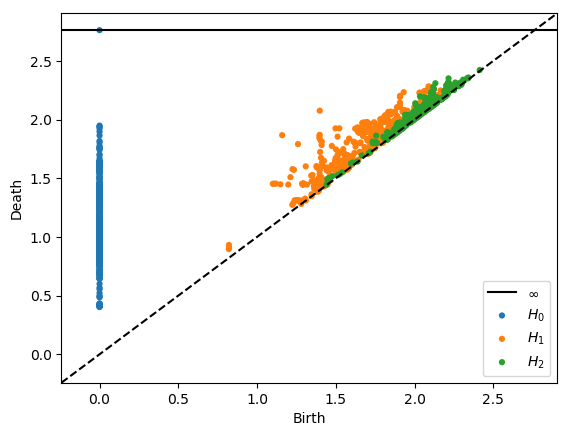

starting
(550, 50)
[[ 0.115  0.264  0.296 ...  0.154  0.191  0.227]
 [ 0.264  0.296  0.307 ...  0.191  0.227  0.244]
 [ 0.296  0.307  0.254 ...  0.227  0.244  0.222]
 ...
 [-0.051 -0.048 -0.042 ... -0.076  0.193  0.886]
 [-0.048 -0.042  0.225 ...  0.193  0.886  0.218]
 [-0.042  0.225  0.859 ...  0.886  0.218  0.082]]
starting


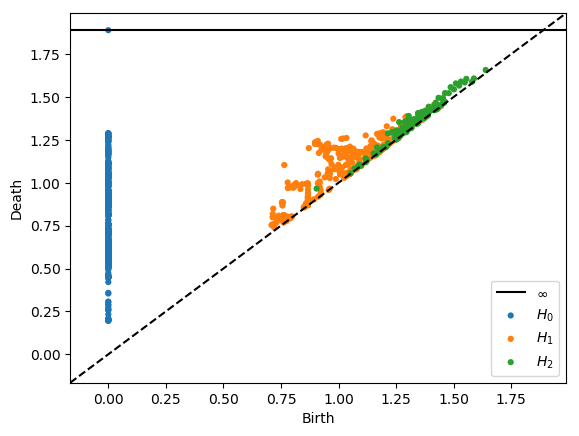

starting
(550, 50)
[[ 0.072  0.209  0.332 ... -0.051 -0.059 -0.057]
 [ 0.209  0.332  0.394 ... -0.059 -0.057 -0.051]
 [ 0.332  0.394  0.375 ... -0.057 -0.051 -0.055]
 ...
 [ 0.095  0.098  0.079 ... -0.029 -0.041 -0.042]
 [ 0.098  0.079  0.045 ... -0.041 -0.042 -0.026]
 [ 0.079  0.045  0.046 ... -0.042 -0.026 -0.001]]
starting


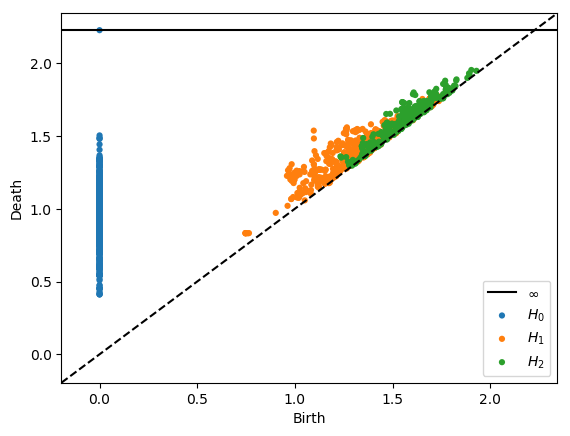

starting
(550, 50)
[[ 0.546  0.975  0.923 ... -0.126 -0.188 -0.195]
 [ 0.975  0.923  0.892 ... -0.188 -0.195 -0.2  ]
 [ 0.923  0.892  0.848 ... -0.195 -0.2   -0.198]
 ...
 [-0.032 -0.025  0.019 ...  0.105  0.074  0.06 ]
 [-0.025  0.019  0.08  ...  0.074  0.06   0.034]
 [ 0.019  0.08   0.081 ...  0.06   0.034  0.001]]
starting


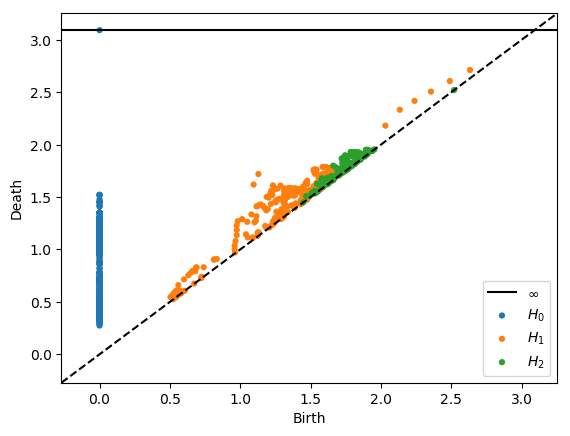

starting
(550, 50)
[[ 0.433  0.789  0.769 ...  0.376 -0.021 -0.05 ]
 [ 0.789  0.769  0.754 ... -0.021 -0.05  -0.059]
 [ 0.769  0.754  0.738 ... -0.05  -0.059 -0.061]
 ...
 [-0.027 -0.023 -0.013 ... -0.094 -0.115 -0.119]
 [-0.023 -0.013  0.013 ... -0.115 -0.119 -0.119]
 [-0.013  0.013  0.045 ... -0.119 -0.119 -0.115]]
starting


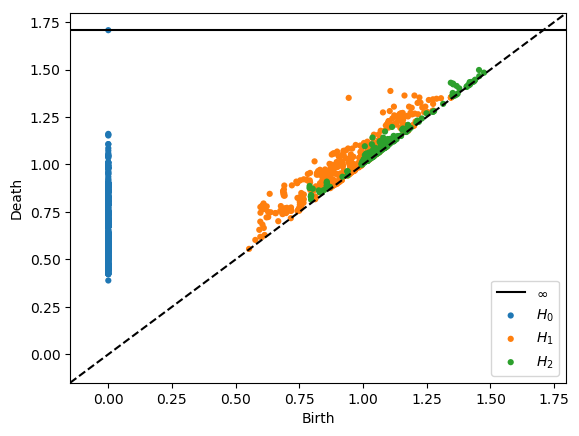

starting
(550, 50)
[[ 0.456  0.871  0.888 ... -0.022 -0.024 -0.036]
 [ 0.871  0.888  0.855 ... -0.024 -0.036 -0.042]
 [ 0.888  0.855  0.756 ... -0.036 -0.042 -0.044]
 ...
 [-0.029 -0.064 -0.084 ... -0.023 -0.014 -0.005]
 [-0.064 -0.084 -0.089 ... -0.014 -0.005  0.006]
 [-0.084 -0.089 -0.07  ... -0.005  0.006  0.021]]
starting


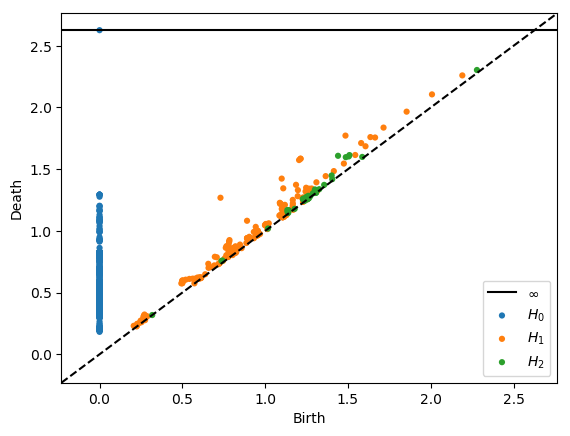

starting
(550, 50)
[[-0.149 -0.251 -0.235 ...  0.079  0.056 -0.009]
 [-0.251 -0.235 -0.161 ...  0.056 -0.009 -0.024]
 [-0.235 -0.161 -0.133 ... -0.009 -0.024 -0.03 ]
 ...
 [ 0.111  0.143  0.134 ... -0.085 -0.115 -0.08 ]
 [ 0.143  0.134  0.125 ... -0.115 -0.08  -0.06 ]
 [ 0.134  0.125  0.115 ... -0.08  -0.06  -0.038]]
starting


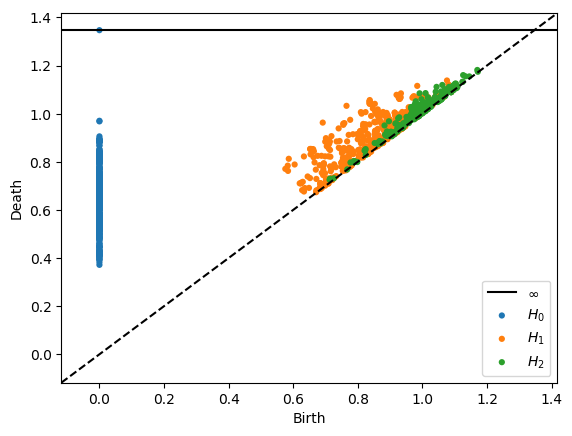

starting
(550, 50)
[[ 0.659  1.205  1.129 ... -0.194 -0.17  -0.138]
 [ 1.205  1.129  1.047 ... -0.17  -0.138 -0.123]
 [ 1.129  1.047  0.945 ... -0.138 -0.123 -0.116]
 ...
 [-0.057 -0.06  -0.065 ... -0.054 -0.058 -0.066]
 [-0.06  -0.065 -0.048 ... -0.058 -0.066 -0.074]
 [-0.065 -0.048  0.005 ... -0.066 -0.074 -0.084]]
starting


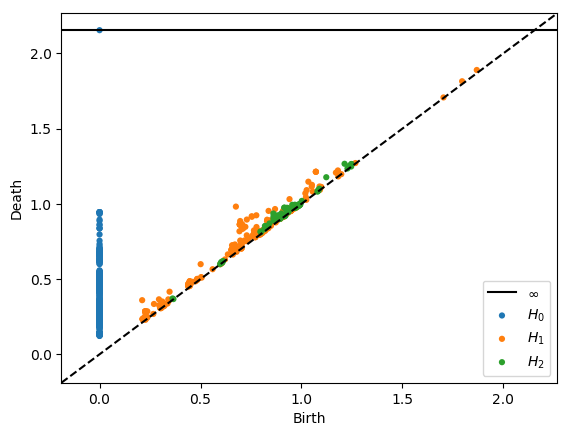

starting
(550, 50)
[[-0.121 -0.101 -0.041 ...  0.106  0.147  0.162]
 [-0.101 -0.041 -0.085 ...  0.147  0.162  0.167]
 [-0.041 -0.085 -0.329 ...  0.162  0.167  0.173]
 ...
 [-0.117 -0.155 -0.291 ... -0.13  -0.121 -0.103]
 [-0.155 -0.291 -0.109 ... -0.121 -0.103 -0.088]
 [-0.291 -0.109  0.193 ... -0.103 -0.088 -0.08 ]]
starting


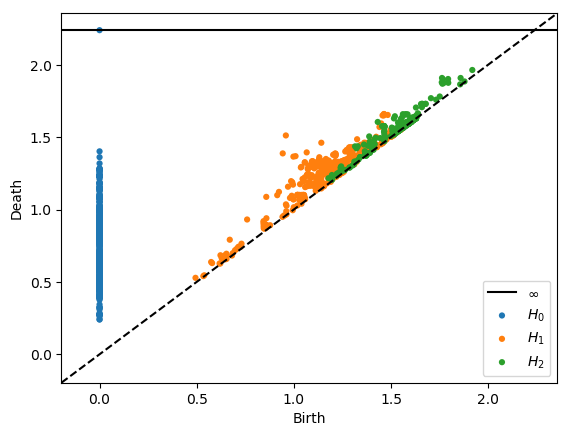

starting
(550, 50)
[[-0.099 -0.191 -0.226 ...  0.092  0.117  0.15 ]
 [-0.191 -0.226 -0.245 ...  0.117  0.15   0.157]
 [-0.226 -0.245 -0.264 ...  0.15   0.157  0.157]
 ...
 [ 0.033  0.025  0.02  ...  0.093  0.08   0.071]
 [ 0.025  0.02   0.012 ...  0.08   0.071  0.07 ]
 [ 0.02   0.012  0.003 ...  0.071  0.07   0.076]]
starting


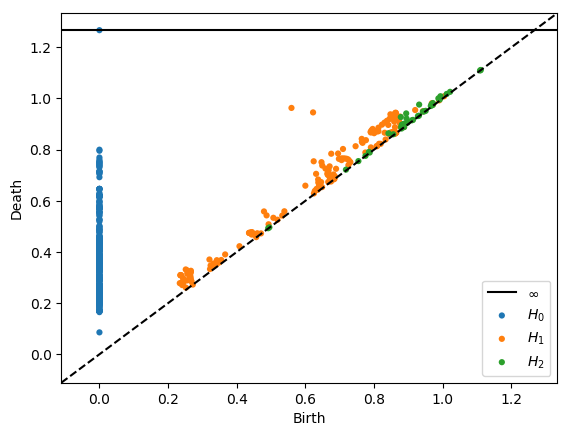

starting
(550, 50)
[[-0.846 -1.497 -1.408 ... -0.016 -0.392 -0.407]
 [-1.497 -1.408 -1.365 ... -0.392 -0.407 -0.375]
 [-1.408 -1.365 -1.281 ... -0.407 -0.375 -0.356]
 ...
 [-0.058 -0.054 -0.056 ...  0.028 -0.029 -0.085]
 [-0.054 -0.056 -0.061 ... -0.029 -0.085 -0.094]
 [-0.056 -0.061 -0.055 ... -0.085 -0.094 -0.098]]
starting


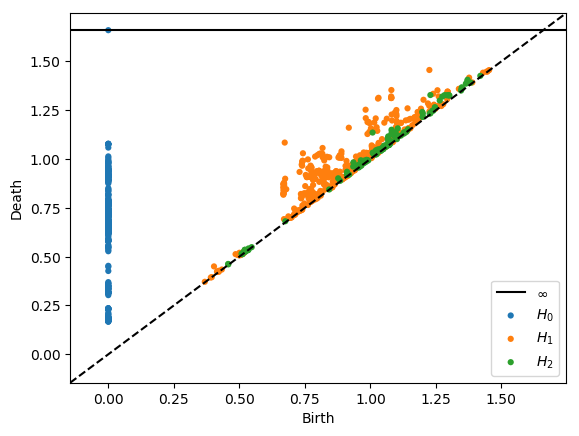

starting
(550, 50)
[[ 0.027  0.039  0.03  ... -0.023 -0.018 -0.05 ]
 [ 0.039  0.03   0.02  ... -0.018 -0.05  -0.061]
 [ 0.03   0.02   0.015 ... -0.05  -0.061 -0.057]
 ...
 [-0.016 -0.001 -0.01  ... -0.015 -0.009 -0.014]
 [-0.001 -0.01  -0.023 ... -0.009 -0.014 -0.009]
 [-0.01  -0.023 -0.003 ... -0.014 -0.009  0.004]]
starting


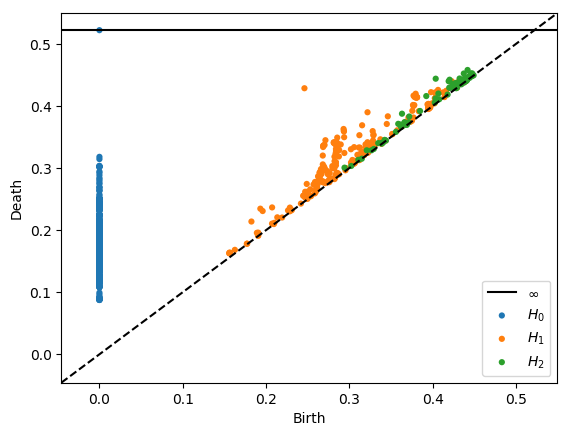

starting
(550, 50)
[[-0.075 -0.062  0.076 ...  0.073  0.156  0.152]
 [-0.062  0.076  0.789 ...  0.156  0.152  0.105]
 [ 0.076  0.789  0.476 ...  0.152  0.105  0.05 ]
 ...
 [-0.139 -0.132 -0.099 ...  0.321 -0.096 -0.145]
 [-0.132 -0.099 -0.081 ... -0.096 -0.145 -0.114]
 [-0.099 -0.081 -0.099 ... -0.145 -0.114 -0.078]]
starting


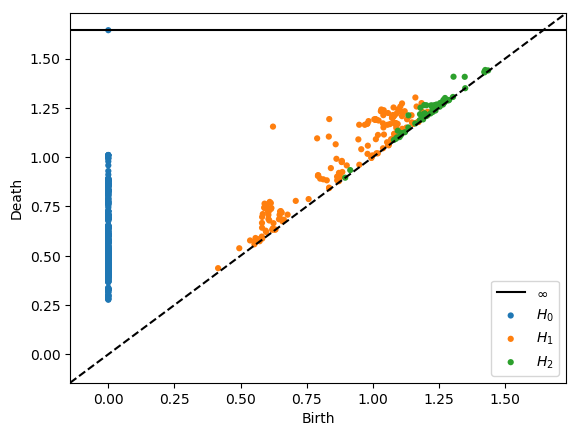

starting
(550, 50)
[[ 0.109  0.212  0.257 ...  0.274  0.286  0.311]
 [ 0.212  0.257  0.271 ...  0.286  0.311  0.332]
 [ 0.257  0.271  0.242 ...  0.311  0.332  0.347]
 ...
 [ 1.388  0.027 -0.211 ... -0.1   -0.108 -0.1  ]
 [ 0.027 -0.211 -0.105 ... -0.108 -0.1   -0.069]
 [-0.211 -0.105 -0.134 ... -0.1   -0.069 -0.036]]
starting


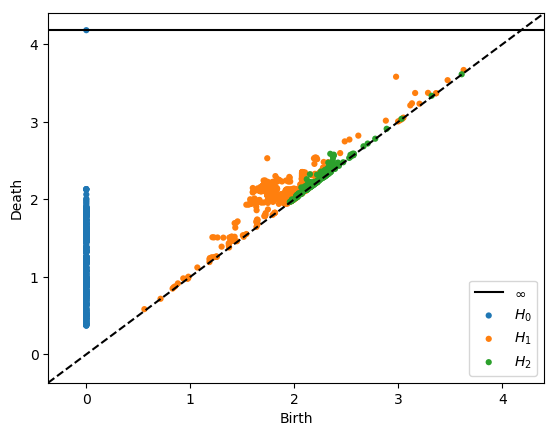

starting
(550, 50)
[[ 1.073  2.033  1.334 ...  1.764  1.667  1.529]
 [ 2.033  1.334  0.949 ...  1.667  1.529  1.343]
 [ 1.334  0.949  0.275 ...  1.529  1.343  1.356]
 ...
 [ 0.117  0.087  0.078 ...  0.825  0.129 -0.029]
 [ 0.087  0.078  0.086 ...  0.129 -0.029 -0.079]
 [ 0.078  0.086  0.099 ... -0.029 -0.079 -0.097]]
starting


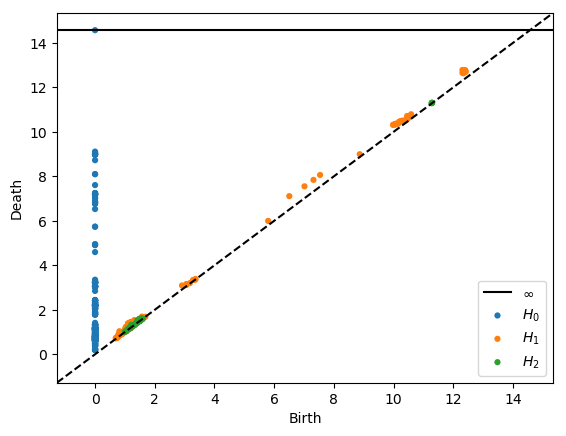

starting
(550, 50)
[[ 0.491  0.96   1.153 ... -0.112 -0.118 -0.113]
 [ 0.96   1.153  1.172 ... -0.118 -0.113 -0.117]
 [ 1.153  1.172  0.831 ... -0.113 -0.117 -0.119]
 ...
 [-0.047 -0.023 -0.008 ...  0.085  0.079  0.08 ]
 [-0.023 -0.008 -0.002 ...  0.079  0.08   0.086]
 [-0.008 -0.002  0.004 ...  0.08   0.086  0.062]]
starting


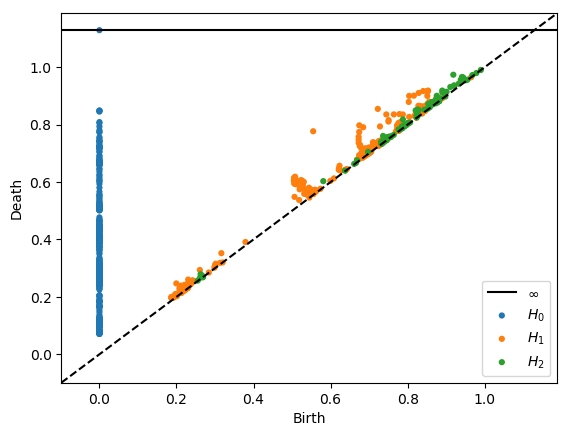

starting
(550, 50)
[[ 0.16   0.232  0.103 ...  0.019 -0.178 -0.136]
 [ 0.232  0.103  0.087 ... -0.178 -0.136  0.162]
 [ 0.103  0.087  0.071 ... -0.136  0.162  0.193]
 ...
 [-0.044 -0.067  0.007 ...  0.064  0.08   0.075]
 [-0.067  0.007  0.029 ...  0.08   0.075  0.078]
 [ 0.007  0.029  0.063 ...  0.075  0.078  0.038]]
starting


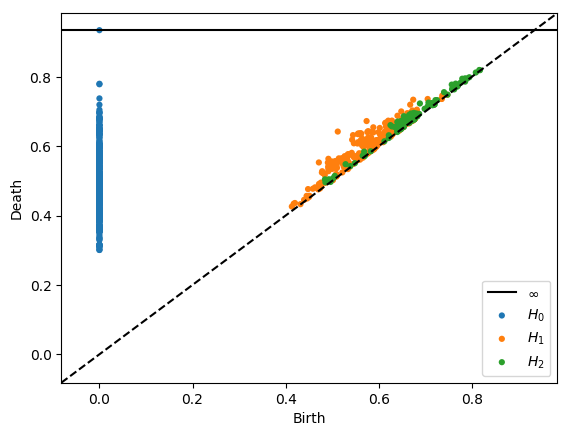

starting
(550, 50)
[[-0.102 -0.141 -0.152 ...  0.017  0.014  0.014]
 [-0.141 -0.152 -0.16  ...  0.014  0.014  0.018]
 [-0.152 -0.16  -0.187 ...  0.014  0.018  0.022]
 ...
 [-0.092 -0.082 -0.075 ... -0.71  -0.218 -0.05 ]
 [-0.082 -0.075 -0.07  ... -0.218 -0.05  -0.039]
 [-0.075 -0.07  -0.065 ... -0.05  -0.039 -0.032]]
starting


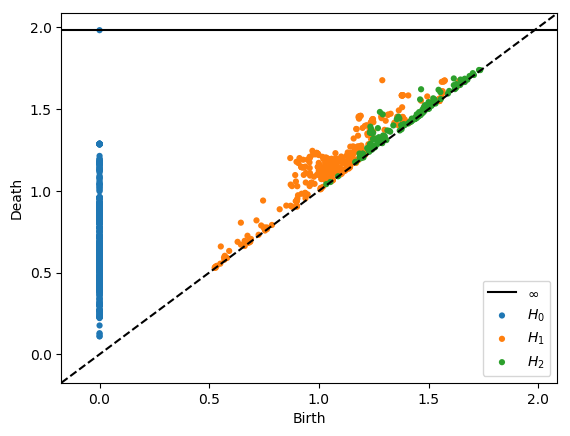

starting
(550, 50)
[[ 0.203  0.423  0.431 ... -0.062 -0.047 -0.02 ]
 [ 0.423  0.431  0.409 ... -0.047 -0.02   0.016]
 [ 0.431  0.409  0.391 ... -0.02   0.016  0.029]
 ...
 [ 0.019  0.023  0.026 ... -0.009  0.017  0.011]
 [ 0.023  0.026  0.013 ...  0.017  0.011 -0.018]
 [ 0.026  0.013  0.005 ...  0.011 -0.018 -0.041]]
starting


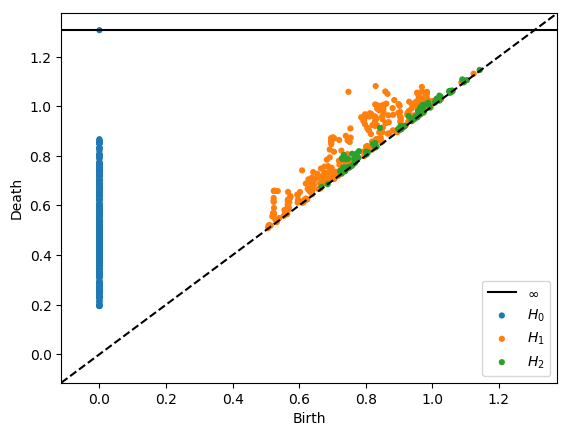

starting
(550, 50)
[[ 0.146  0.244  0.231 ...  0.025 -0.062 -0.101]
 [ 0.244  0.231  0.173 ... -0.062 -0.101 -0.081]
 [ 0.231  0.173  0.175 ... -0.101 -0.081 -0.052]
 ...
 [-0.049 -0.016 -0.051 ... -0.018  0.054  0.046]
 [-0.016 -0.051  0.367 ...  0.054  0.046 -0.039]
 [-0.051  0.367  0.118 ...  0.046 -0.039 -0.06 ]]
starting


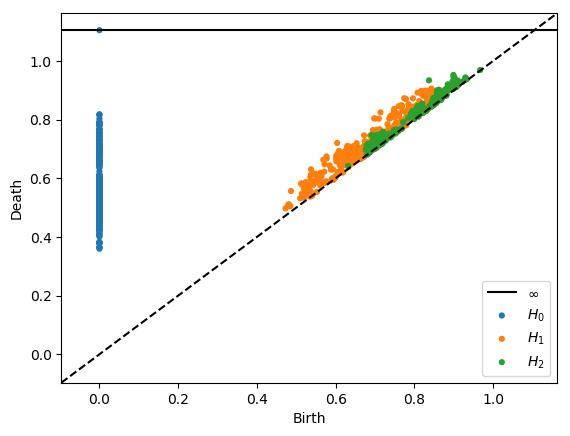

starting
(550, 50)
[[ 0.207  0.098 -0.172 ... -0.007  0.091  0.108]
 [ 0.098 -0.172 -0.135 ...  0.091  0.108  0.123]
 [-0.172 -0.135 -0.132 ...  0.108  0.123  0.13 ]
 ...
 [-0.041 -0.033 -0.016 ... -0.015 -0.042 -0.059]
 [-0.033 -0.016 -0.083 ... -0.042 -0.059 -0.075]
 [-0.016 -0.083  0.092 ... -0.059 -0.075  0.002]]
starting


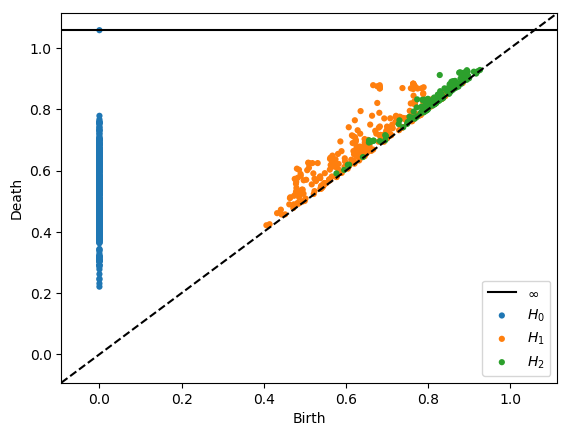

starting
(550, 50)
[[-0.237 -0.396 -0.364 ...  0.31   0.401  0.422]
 [-0.396 -0.364 -0.379 ...  0.401  0.422  0.647]
 [-0.364 -0.379 -0.387 ...  0.422  0.647  1.101]
 ...
 [ 0.011  0.177  0.241 ...  0.022 -0.033 -0.034]
 [ 0.177  0.241  0.103 ... -0.033 -0.034 -0.019]
 [ 0.241  0.103  0.    ... -0.034 -0.019 -0.013]]
starting


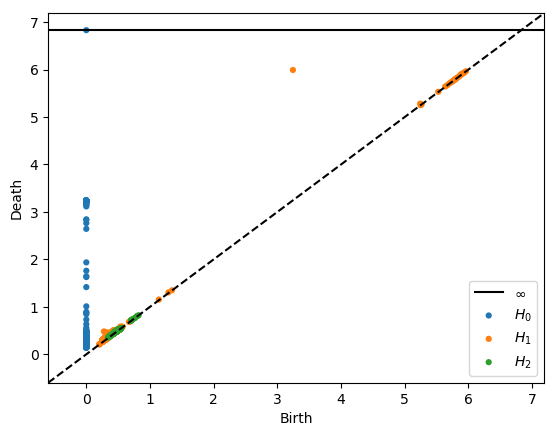

starting
(550, 50)
[[ 0.254  0.394 -0.35  ...  0.408  0.352  0.286]
 [ 0.394 -0.35  -0.935 ...  0.352  0.286  0.273]
 [-0.35  -0.935 -0.982 ...  0.286  0.273  0.314]
 ...
 [-0.209 -0.233 -0.279 ...  0.175  0.19   0.183]
 [-0.233 -0.279 -0.278 ...  0.19   0.183  0.16 ]
 [-0.279 -0.278  0.015 ...  0.183  0.16   0.149]]
starting


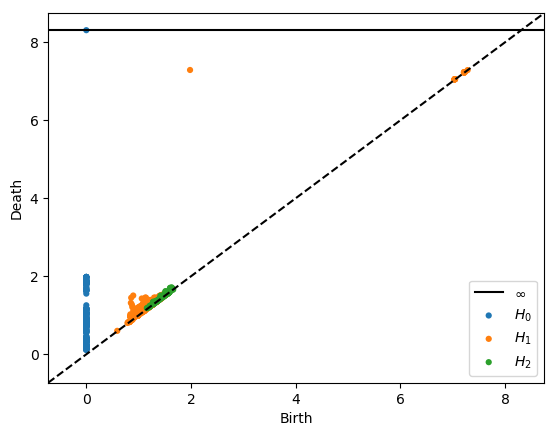

starting
(550, 50)
[[ 0.391  0.685  0.586 ... -0.281 -0.214 -0.181]
 [ 0.685  0.586  0.536 ... -0.214 -0.181 -0.152]
 [ 0.586  0.536  0.503 ... -0.181 -0.152 -0.077]
 ...
 [-0.009  0.035  0.029 ... -0.164 -0.132 -0.101]
 [ 0.035  0.029  0.009 ... -0.132 -0.101 -0.079]
 [ 0.029  0.009  0.01  ... -0.101 -0.079 -0.021]]
starting


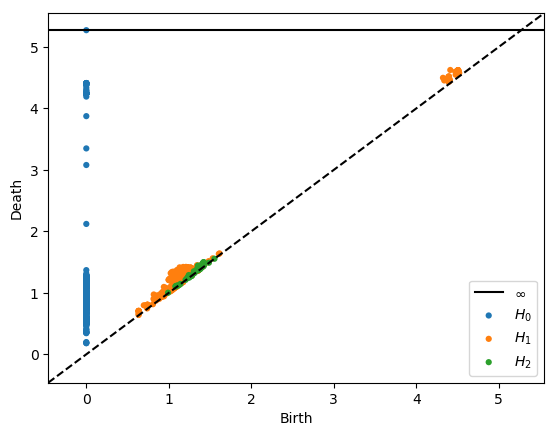

starting
(550, 50)
[[ 0.153  0.25   0.224 ... -0.152 -0.157 -0.17 ]
 [ 0.25   0.224  0.202 ... -0.157 -0.17  -0.142]
 [ 0.224  0.202  0.181 ... -0.17  -0.142 -0.217]
 ...
 [-0.008 -0.008 -0.003 ... -0.317  0.072  0.049]
 [-0.008 -0.003  0.003 ...  0.072  0.049  0.043]
 [-0.003  0.003  0.011 ...  0.049  0.043  0.039]]
starting


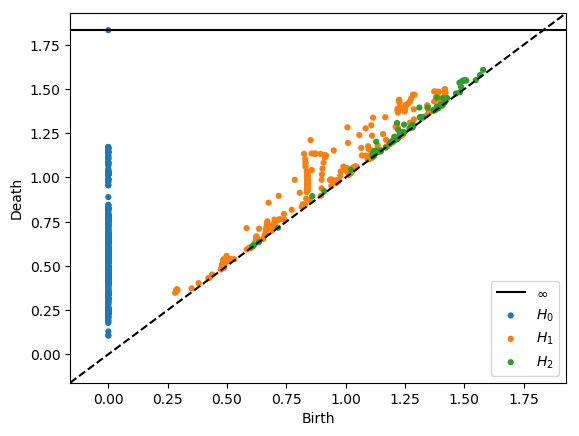

starting
(550, 50)
[[ 0.024  0.039  0.063 ... -0.02  -0.025 -0.028]
 [ 0.039  0.063  0.062 ... -0.025 -0.028 -0.028]
 [ 0.063  0.062  0.057 ... -0.028 -0.028 -0.031]
 ...
 [ 0.09   0.107  0.106 ...  0.147  0.095  0.018]
 [ 0.107  0.106  0.1   ...  0.095  0.018 -0.045]
 [ 0.106  0.1    0.095 ...  0.018 -0.045 -0.059]]
starting


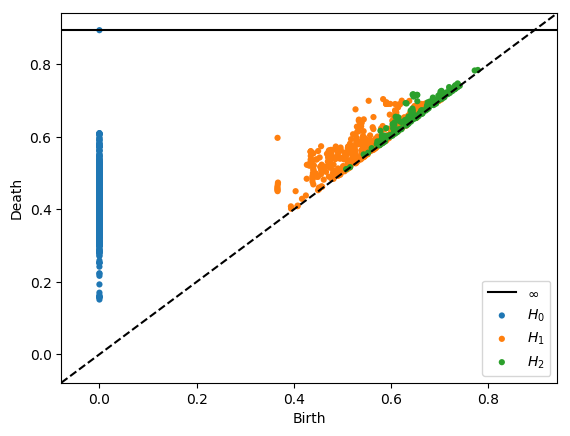

starting
(550, 50)
[[ 0.124  0.388  0.916 ...  0.152  0.133  0.423]
 [ 0.388  0.916  0.633 ...  0.133  0.423  0.702]
 [ 0.916  0.633 -0.167 ...  0.423  0.702  0.017]
 ...
 [-0.344 -0.082 -0.164 ... -0.041  0.031  0.632]
 [-0.082 -0.164 -0.152 ...  0.031  0.632  0.68 ]
 [-0.164 -0.152 -0.165 ...  0.632  0.68  -0.552]]
starting


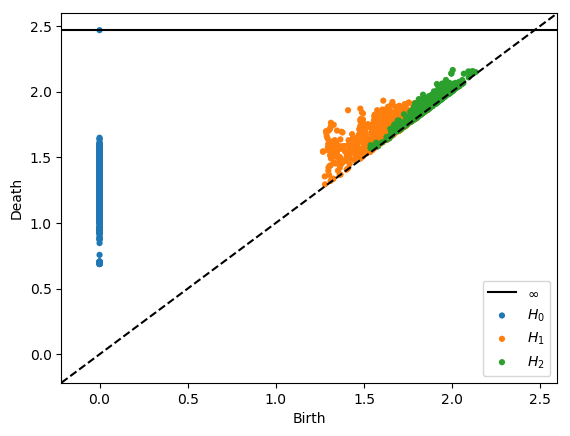

starting
(550, 50)
[[ 0.082  0.142  0.158 ... -0.11  -0.12  -0.122]
 [ 0.142  0.158  0.161 ... -0.12  -0.122 -0.115]
 [ 0.158  0.161  0.15  ... -0.122 -0.115 -0.1  ]
 ...
 [-0.021 -0.019 -0.009 ... -0.025  0.     0.018]
 [-0.019 -0.009  0.035 ...  0.     0.018  0.018]
 [-0.009  0.035  0.089 ...  0.018  0.018  0.016]]
starting


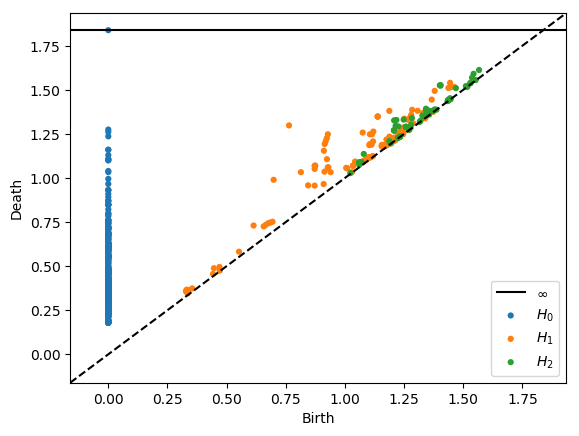

starting
(550, 50)
[[-0.246 -0.437 -0.45  ... -0.003 -0.02   0.016]
 [-0.437 -0.45  -0.437 ... -0.02   0.016  0.056]
 [-0.45  -0.437 -0.398 ...  0.016  0.056  0.122]
 ...
 [ 0.085 -0.025 -0.1   ... -0.015 -0.022 -0.04 ]
 [-0.025 -0.1   -0.132 ... -0.022 -0.04  -0.054]
 [-0.1   -0.132 -0.19  ... -0.04  -0.054 -0.063]]
starting


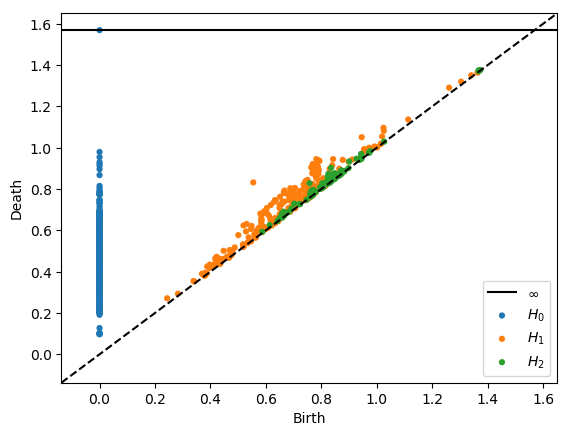

starting
(550, 50)
[[-0.505 -1.152 -1.211 ...  0.333  0.331  0.327]
 [-1.152 -1.211 -1.203 ...  0.331  0.327  0.322]
 [-1.211 -1.203 -1.174 ...  0.327  0.322  0.315]
 ...
 [-0.034 -0.045 -0.051 ... -0.053 -0.045 -0.04 ]
 [-0.045 -0.051 -0.054 ... -0.045 -0.04  -0.048]
 [-0.051 -0.054 -0.044 ... -0.04  -0.048 -0.065]]
starting


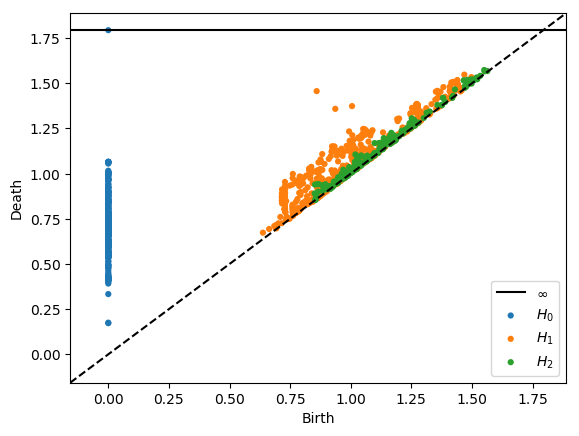

starting
(550, 50)
[[ 0.227  0.376  0.348 ... -0.004  0.006  0.016]
 [ 0.376  0.348  0.307 ...  0.006  0.016 -0.002]
 [ 0.348  0.307  0.293 ...  0.016 -0.002 -0.011]
 ...
 [-0.165 -0.181 -0.173 ... -0.209 -0.147 -0.109]
 [-0.181 -0.173 -0.173 ... -0.147 -0.109 -0.04 ]
 [-0.173 -0.173 -0.167 ... -0.109 -0.04   0.031]]
starting


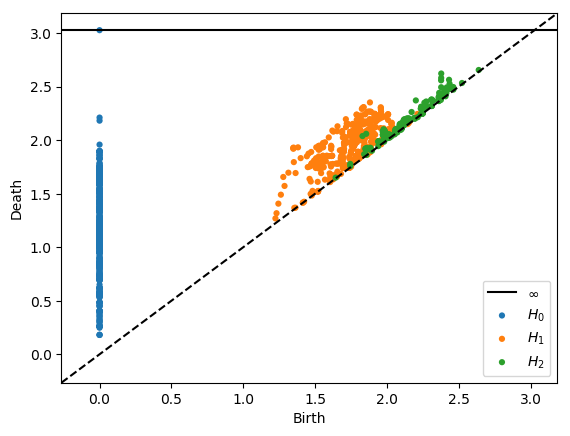

starting
(550, 50)
[[ 0.018  0.028  0.036 ... -0.017 -0.031 -0.034]
 [ 0.028  0.036  0.047 ... -0.031 -0.034 -0.036]
 [ 0.036  0.047  0.048 ... -0.034 -0.036 -0.032]
 ...
 [ 0.088  0.078  0.065 ... -0.046 -0.044 -0.055]
 [ 0.078  0.065  0.045 ... -0.044 -0.055 -0.087]
 [ 0.065  0.045  0.027 ... -0.055 -0.087  0.224]]
starting


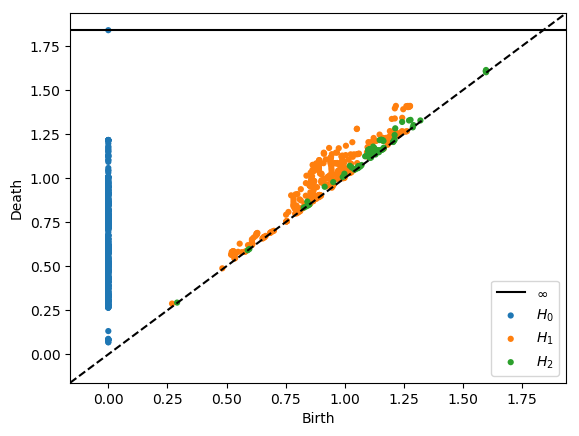

starting
(550, 50)
[[ 0.4    0.73   0.731 ... -0.053 -0.05  -0.047]
 [ 0.73   0.731  0.723 ... -0.05  -0.047 -0.042]
 [ 0.731  0.723  0.714 ... -0.047 -0.042 -0.007]
 ...
 [ 0.001 -0.001  0.007 ...  0.01   0.008  0.005]
 [-0.001  0.007 -0.006 ...  0.008  0.005  0.001]
 [ 0.007 -0.006 -0.003 ...  0.005  0.001 -0.006]]
starting


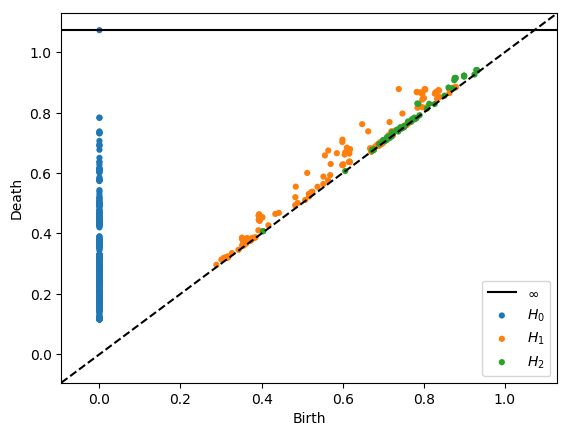

starting
(550, 50)
[[ 6.370e-01  1.126e+00  1.072e+00 ... -2.200e-02  2.800e-02  3.800e-02]
 [ 1.126e+00  1.072e+00  9.700e-01 ...  2.800e-02  3.800e-02  2.600e-02]
 [ 1.072e+00  9.700e-01  9.200e-01 ...  3.800e-02  2.600e-02  3.000e-03]
 ...
 [ 1.000e-03  3.400e-02  4.700e-02 ... -1.550e-01 -1.220e-01 -5.000e-02]
 [ 3.400e-02  4.700e-02  6.900e-02 ... -1.220e-01 -5.000e-02  5.000e-03]
 [ 4.700e-02  6.900e-02  4.800e-02 ... -5.000e-02  5.000e-03  2.700e-02]]
starting


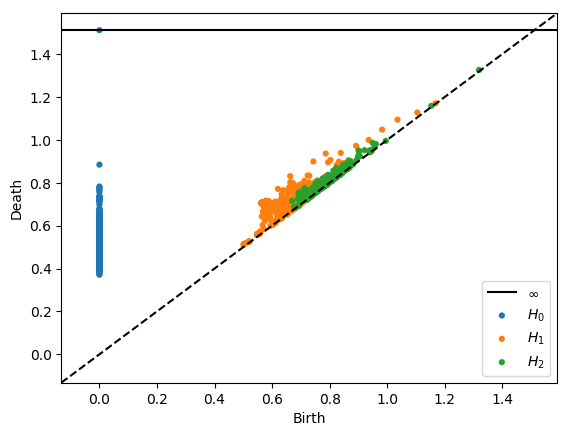

starting
(550, 50)
[[ 0.3    0.545  0.571 ... -0.098 -0.44  -0.409]
 [ 0.545  0.571  0.596 ... -0.44  -0.409 -0.186]
 [ 0.571  0.596  0.608 ... -0.409 -0.186 -0.055]
 ...
 [-0.061 -0.038 -0.028 ... -0.161 -0.117 -0.125]
 [-0.038 -0.028 -0.021 ... -0.117 -0.125 -0.157]
 [-0.028 -0.021 -0.015 ... -0.125 -0.157 -0.174]]
starting


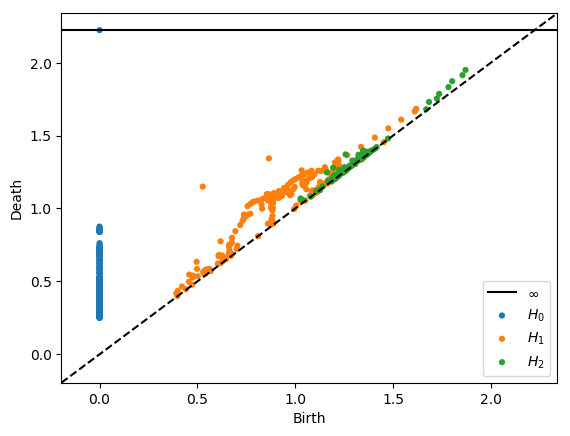

starting
(550, 50)
[[-0.02  -0.025 -0.041 ... -0.035 -0.02   0.341]
 [-0.025 -0.041 -0.033 ... -0.02   0.341  0.594]
 [-0.041 -0.033  0.048 ...  0.341  0.594  0.052]
 ...
 [-0.017 -0.006 -0.008 ... -0.19  -0.155 -0.105]
 [-0.006 -0.008 -0.014 ... -0.155 -0.105 -0.073]
 [-0.008 -0.014 -0.022 ... -0.105 -0.073 -0.062]]
starting


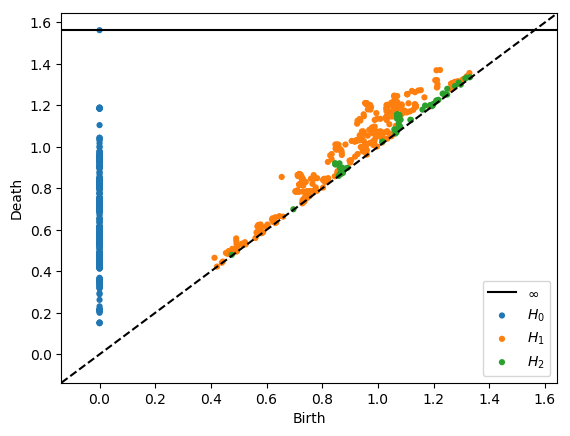

starting
(550, 50)
[[ 0.587  1.046  0.906 ... -0.158 -0.36  -0.303]
 [ 1.046  0.906  0.84  ... -0.36  -0.303 -0.028]
 [ 0.906  0.84   0.786 ... -0.303 -0.028 -0.105]
 ...
 [ 0.108  0.127  0.124 ...  0.054  0.021 -0.005]
 [ 0.127  0.124  0.096 ...  0.021 -0.005  0.018]
 [ 0.124  0.096  0.127 ... -0.005  0.018 -0.028]]
starting


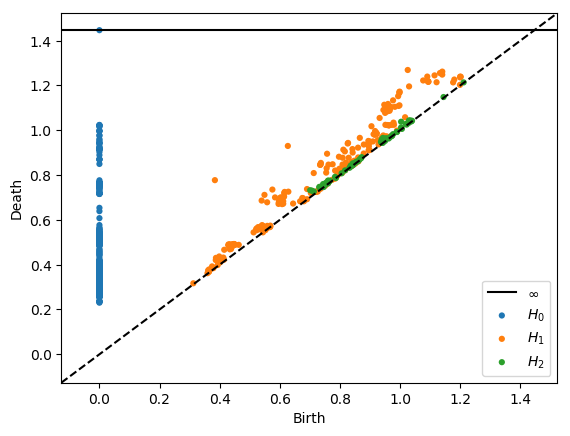

starting
(550, 50)
[[-0.12  -0.207 -0.225 ...  0.146  0.156  0.162]
 [-0.207 -0.225 -0.223 ...  0.156  0.162  0.172]
 [-0.225 -0.223 -0.209 ...  0.162  0.172  0.165]
 ...
 [-0.035 -0.031 -0.028 ... -0.011 -0.012 -0.011]
 [-0.031 -0.028 -0.018 ... -0.012 -0.011 -0.01 ]
 [-0.028 -0.018 -0.01  ... -0.011 -0.01  -0.006]]
starting


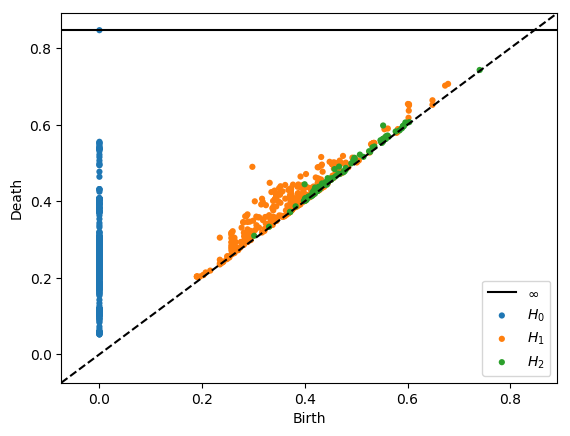

starting
(550, 50)
[[ 0.594  1.039  0.89  ...  0.195  0.158  0.117]
 [ 1.039  0.89   0.767 ...  0.158  0.117  0.082]
 [ 0.89   0.767  0.635 ...  0.117  0.082  0.098]
 ...
 [-0.08  -0.078 -0.074 ...  0.137  0.134  0.106]
 [-0.078 -0.074 -0.062 ...  0.134  0.106  0.074]
 [-0.074 -0.062 -0.028 ...  0.106  0.074  0.052]]
starting


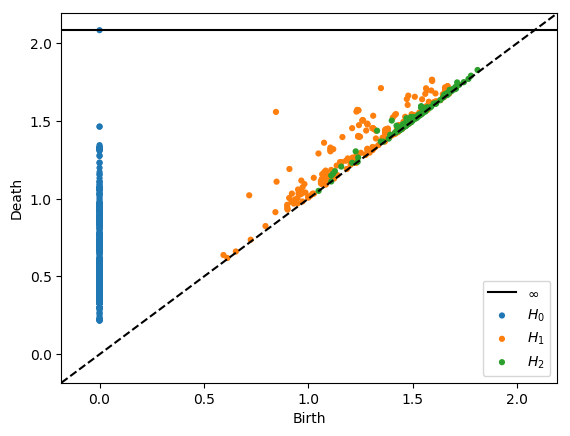

starting
(550, 50)
[[-0.021 -0.083 -0.097 ...  0.007 -0.003 -0.023]
 [-0.083 -0.097 -0.079 ... -0.003 -0.023 -0.029]
 [-0.097 -0.079 -0.002 ... -0.023 -0.029 -0.012]
 ...
 [-0.1   -0.106 -0.175 ... -0.069 -0.059 -0.067]
 [-0.106 -0.175  0.132 ... -0.059 -0.067 -0.064]
 [-0.175  0.132  0.569 ... -0.067 -0.064  0.409]]
starting


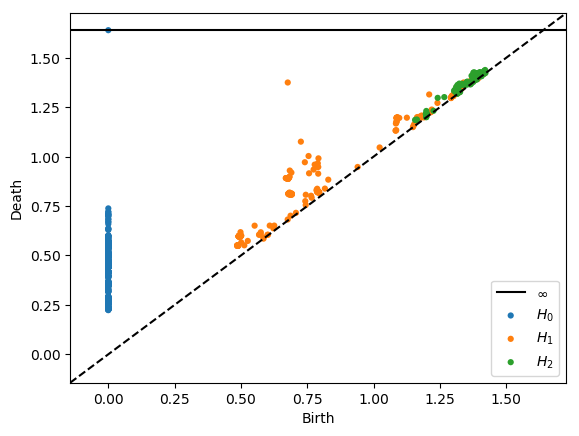

starting
(550, 50)
[[-0.16  -0.276 -0.271 ...  0.053  0.056  0.048]
 [-0.276 -0.271 -0.241 ...  0.056  0.048  0.032]
 [-0.271 -0.241 -0.206 ...  0.048  0.032  0.022]
 ...
 [-0.085 -0.085 -0.081 ...  0.022  0.025  0.026]
 [-0.085 -0.081 -0.083 ...  0.025  0.026  0.031]
 [-0.081 -0.083 -0.079 ...  0.026  0.031  0.036]]
starting


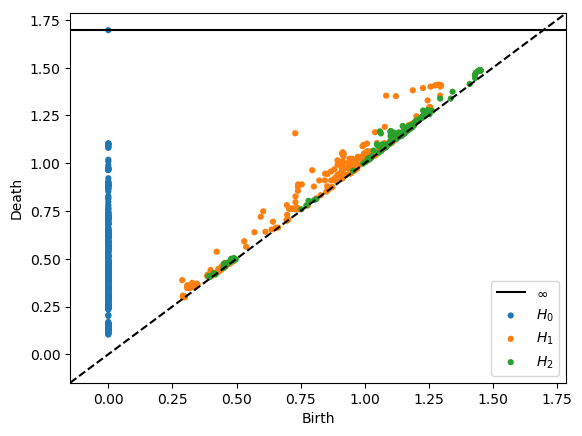

starting
(550, 50)
[[ 0.326  0.576  0.527 ...  0.785  0.747  0.646]
 [ 0.576  0.527  0.454 ...  0.747  0.646  0.571]
 [ 0.527  0.454  0.381 ...  0.646  0.571  0.531]
 ...
 [ 0.008  0.019  0.009 ...  0.003  0.022  0.033]
 [ 0.019  0.009 -0.008 ...  0.022  0.033  0.043]
 [ 0.009 -0.008  0.    ...  0.033  0.043  0.033]]
starting


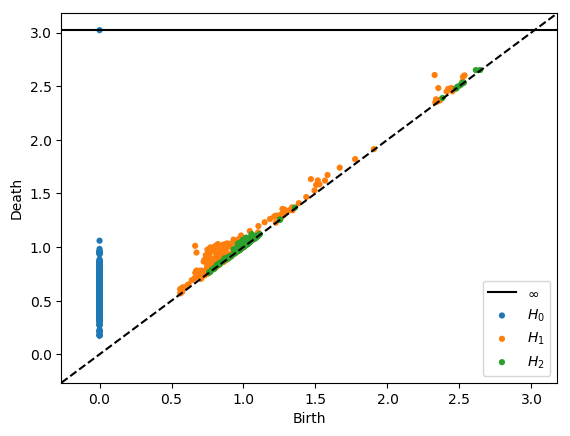

starting
(550, 50)
[[ 0.111  0.533  0.317 ...  0.206  0.282  0.335]
 [ 0.533  0.317  0.024 ...  0.282  0.335  0.346]
 [ 0.317  0.024  0.187 ...  0.335  0.346  0.335]
 ...
 [-0.244 -0.246 -0.23  ...  0.165  0.187  0.181]
 [-0.246 -0.23  -0.209 ...  0.187  0.181  0.175]
 [-0.23  -0.209 -0.197 ...  0.181  0.175  0.187]]
starting


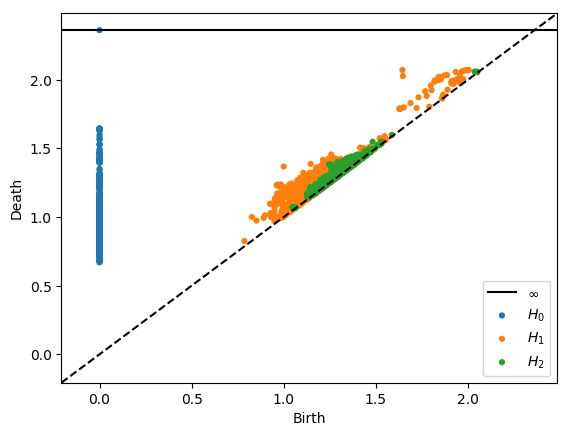

starting
(550, 50)
[[ 0.704  1.279  1.18  ...  0.214  0.207  0.218]
 [ 1.279  1.18   1.121 ...  0.207  0.218  0.243]
 [ 1.18   1.121  1.098 ...  0.218  0.243  0.273]
 ...
 [-0.143 -0.135 -0.085 ... -0.091 -0.087 -0.086]
 [-0.135 -0.085 -0.043 ... -0.087 -0.086 -0.087]
 [-0.085 -0.043 -0.023 ... -0.086 -0.087 -0.09 ]]
starting


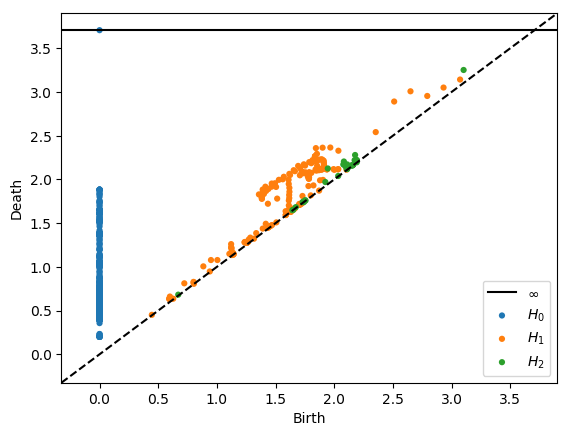

starting
(550, 50)
[[ 0.019  0.013  0.007 ...  0.134  0.132  0.122]
 [ 0.013  0.007  0.005 ...  0.132  0.122  0.115]
 [ 0.007  0.005 -0.002 ...  0.122  0.115  0.11 ]
 ...
 [ 0.081  0.091  0.1   ... -0.072 -0.039 -0.036]
 [ 0.091  0.1    0.109 ... -0.039 -0.036 -0.028]
 [ 0.1    0.109  0.112 ... -0.036 -0.028 -0.018]]
starting


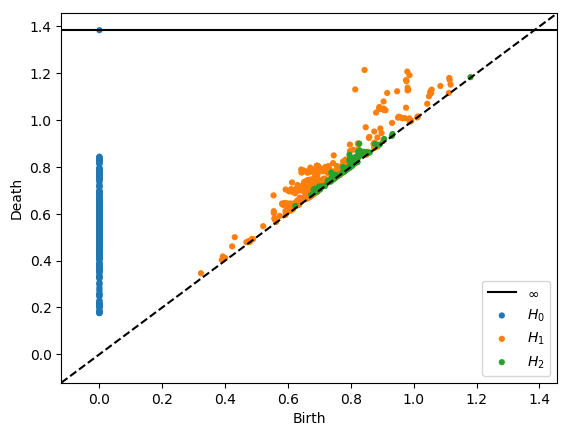

starting
(550, 50)
[[-0.181 -0.358 -0.368 ... -0.096 -0.084 -0.01 ]
 [-0.358 -0.368 -0.373 ... -0.084 -0.01   0.   ]
 [-0.368 -0.373 -0.372 ... -0.01   0.    -0.042]
 ...
 [ 0.123  0.098  0.114 ... -0.206 -0.195 -0.182]
 [ 0.098  0.114  0.14  ... -0.195 -0.182 -0.171]
 [ 0.114  0.14   0.151 ... -0.182 -0.171 -0.135]]
starting


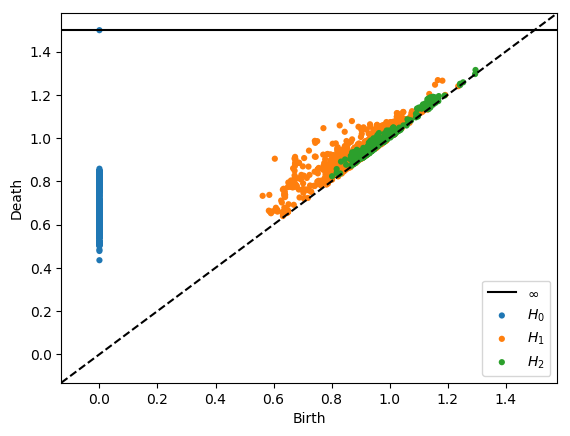

starting
(550, 50)
[[-0.011 -0.018 -0.052 ... -0.082 -0.079 -0.076]
 [-0.018 -0.052 -0.068 ... -0.079 -0.076 -0.075]
 [-0.052 -0.068 -0.074 ... -0.076 -0.075 -0.078]
 ...
 [ 0.016  0.021  0.017 ... -0.043 -0.063 -0.067]
 [ 0.021  0.017  0.016 ... -0.063 -0.067 -0.062]
 [ 0.017  0.016  0.021 ... -0.067 -0.062 -0.041]]
starting


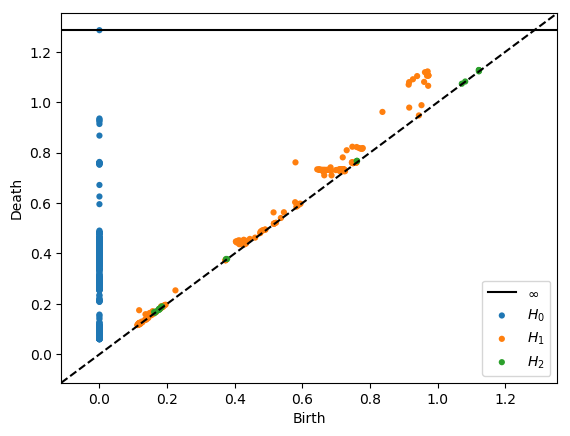

starting
(550, 50)
[[ 0.776  1.484  1.422 ... -0.104 -0.148 -0.208]
 [ 1.484  1.422  1.407 ... -0.148 -0.208 -0.248]
 [ 1.422  1.407  1.371 ... -0.208 -0.248 -0.259]
 ...
 [ 0.307  0.829  1.081 ... -0.01  -0.011 -0.014]
 [ 0.829  1.081  0.438 ... -0.011 -0.014 -0.011]
 [ 1.081  0.438  0.219 ... -0.014 -0.011 -0.007]]
starting


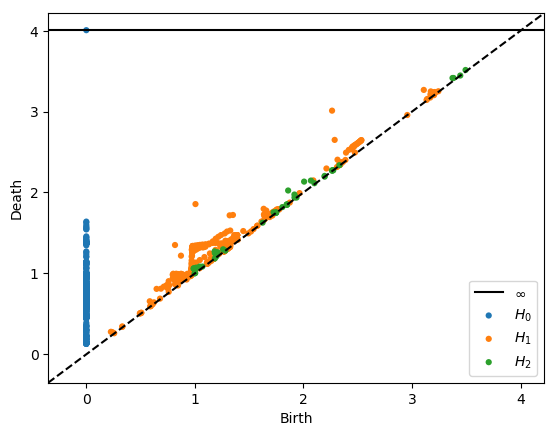

starting
(550, 50)
[[-0.495 -0.911 -0.814 ...  0.022 -0.002 -0.017]
 [-0.911 -0.814 -0.789 ... -0.002 -0.017 -0.011]
 [-0.814 -0.789 -0.756 ... -0.017 -0.011  0.136]
 ...
 [-0.066 -0.07   0.052 ...  0.109  0.089  0.055]
 [-0.07   0.052  0.784 ...  0.089  0.055 -0.029]
 [ 0.052  0.784  0.611 ...  0.055 -0.029 -0.072]]
starting


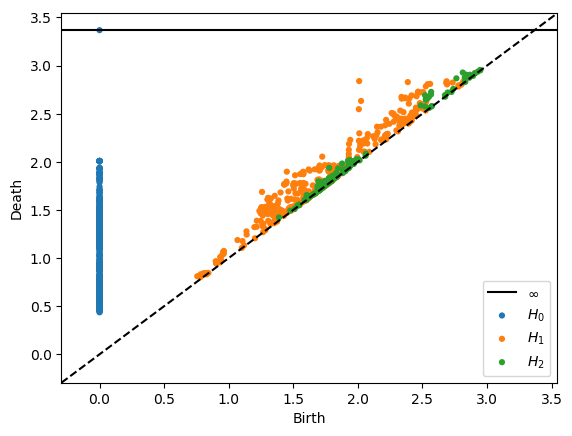

starting
(550, 50)
[[-0.098 -0.096  0.476 ... -0.079 -0.069 -0.022]
 [-0.096  0.476  0.532 ... -0.069 -0.022  0.086]
 [ 0.476  0.532 -0.005 ... -0.022  0.086  0.158]
 ...
 [ 0.009  0.02   0.333 ... -0.126 -0.088 -0.122]
 [ 0.02   0.333  0.984 ... -0.088 -0.122 -0.13 ]
 [ 0.333  0.984  0.195 ... -0.122 -0.13  -0.135]]
starting


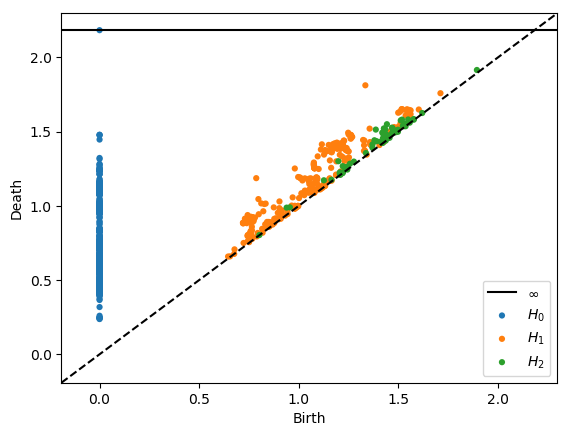

starting
(550, 50)
[[-0.905 -1.716 -1.657 ... -1.655 -1.706 -1.81 ]
 [-1.716 -1.657 -1.628 ... -1.706 -1.81  -1.915]
 [-1.657 -1.628 -1.47  ... -1.81  -1.915 -1.937]
 ...
 [-0.18  -0.174 -0.172 ... -0.217 -0.204 -0.171]
 [-0.174 -0.172 -0.145 ... -0.204 -0.171 -0.161]
 [-0.172 -0.145 -0.083 ... -0.171 -0.161 -0.17 ]]
starting


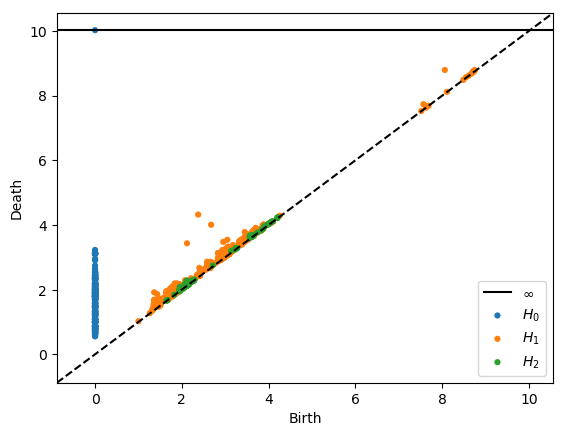

starting
(550, 50)
[[-0.225 -0.413 -0.421 ... -0.156 -0.177 -0.183]
 [-0.413 -0.421 -0.406 ... -0.177 -0.183 -0.143]
 [-0.421 -0.406 -0.391 ... -0.183 -0.143 -0.085]
 ...
 [-0.181 -0.111 -0.058 ...  0.697  0.348 -0.046]
 [-0.111 -0.058 -0.024 ...  0.348 -0.046 -0.125]
 [-0.058 -0.024 -0.023 ... -0.046 -0.125 -0.132]]
starting


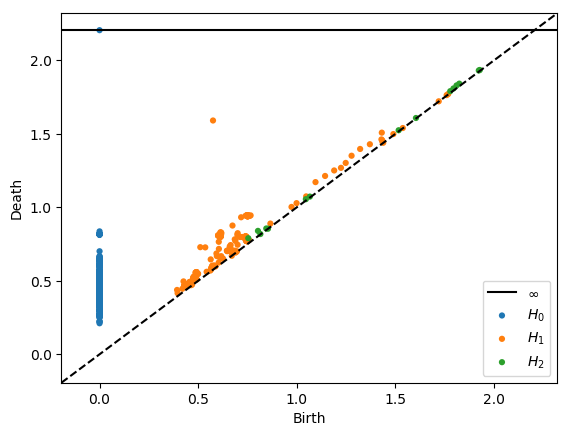

starting
(550, 50)
[[ 0.592  1.105  1.089 ... -0.51  -0.529 -0.595]
 [ 1.105  1.089  1.087 ... -0.529 -0.595 -0.54 ]
 [ 1.089  1.087  1.055 ... -0.595 -0.54  -0.69 ]
 ...
 [ 0.005 -0.082 -0.123 ...  0.08   0.298  0.36 ]
 [-0.082 -0.123 -0.096 ...  0.298  0.36   0.104]
 [-0.123 -0.096 -0.069 ...  0.36   0.104 -0.089]]
starting


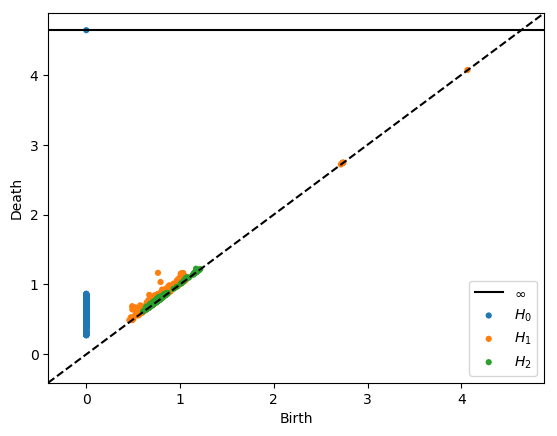

starting
(550, 50)
[[-0.023 -0.054 -0.027 ... -0.042 -0.157 -0.05 ]
 [-0.054 -0.027  0.077 ... -0.157 -0.05  -0.004]
 [-0.027  0.077  0.092 ... -0.05  -0.004 -0.001]
 ...
 [ 0.048  0.06   0.079 ...  0.025  0.031  0.058]
 [ 0.06   0.079  0.107 ...  0.031  0.058  0.079]
 [ 0.079  0.107  0.146 ...  0.058  0.079  0.102]]
starting


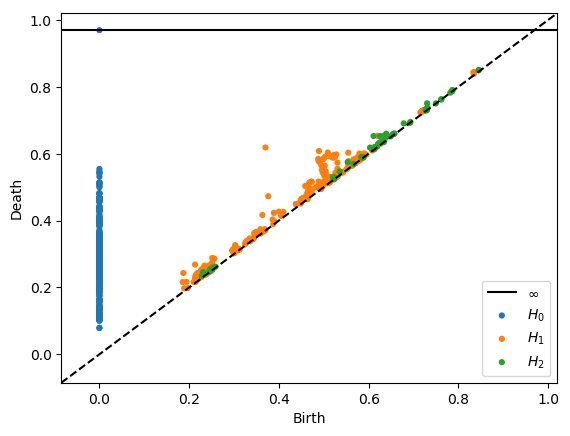

starting
(550, 50)
[[-4.280e-01 -7.980e-01 -8.280e-01 ... -3.200e-02 -2.300e-02 -1.200e-02]
 [-7.980e-01 -8.280e-01 -9.960e-01 ... -2.300e-02 -1.200e-02 -1.000e-03]
 [-8.280e-01 -9.960e-01 -1.104e+00 ... -1.200e-02 -1.000e-03  6.000e-03]
 ...
 [-1.200e-02  3.000e-02  9.000e-02 ... -1.000e-01 -1.370e-01 -1.420e-01]
 [ 3.000e-02  9.000e-02  1.150e-01 ... -1.370e-01 -1.420e-01 -1.660e-01]
 [ 9.000e-02  1.150e-01  7.900e-02 ... -1.420e-01 -1.660e-01 -1.520e-01]]
starting


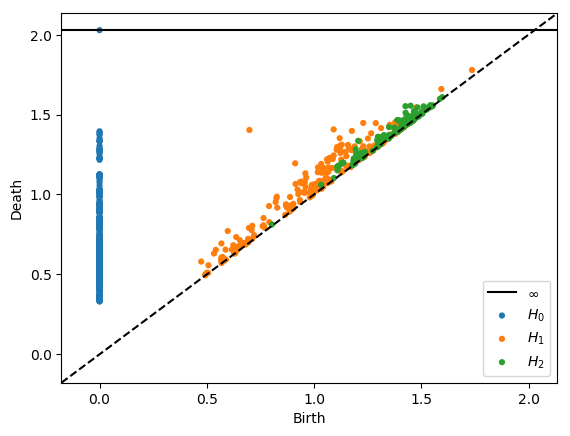

starting
(550, 50)
[[-0.012 -0.021 -0.117 ... -0.143 -0.121  0.395]
 [-0.021 -0.117 -0.005 ... -0.121  0.395  0.372]
 [-0.117 -0.005  0.502 ...  0.395  0.372 -0.236]
 ...
 [-0.067 -0.061 -0.08  ... -0.011 -0.007 -0.004]
 [-0.061 -0.08  -0.1   ... -0.007 -0.004  0.   ]
 [-0.08  -0.1   -0.116 ... -0.004  0.     0.001]]
starting


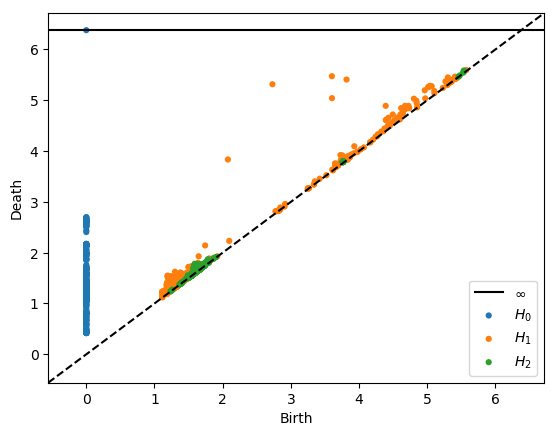

starting
(550, 50)
[[ 0.174  0.405  0.427 ...  1.238  1.393  1.473]
 [ 0.405  0.427  0.439 ...  1.393  1.473  1.448]
 [ 0.427  0.439  0.449 ...  1.473  1.448  1.889]
 ...
 [ 1.275  0.507  0.312 ... -0.126  0.368  0.715]
 [ 0.507  0.312  0.261 ...  0.368  0.715  0.042]
 [ 0.312  0.261  0.14  ...  0.715  0.042 -0.054]]
starting


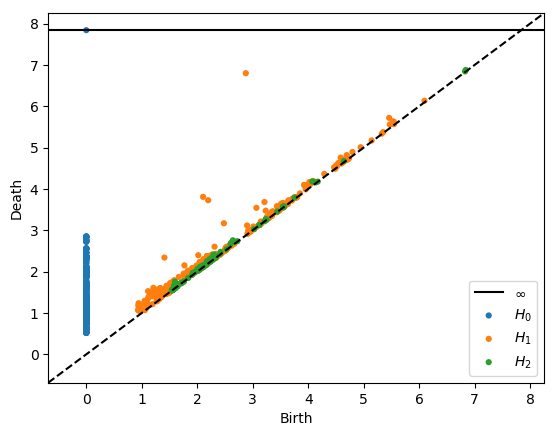

In [5]:
makeDiaFromCSV("AF")